<!-- 2DO: -->
<!-- _undamped -> _simple everywhere -->
<!-- Long time integration by adaptive RK: will that improve the -->
<!-- phase error? Do experiments where we measure the wavelength -->
<!-- and plot it as function of time. Can we vectorize the -->
<!-- max/min pt computation? -->

Vibration problems lead to differential equations with solutions that
oscillate in time, typically in a damped or undamped sinusoidal
fashion.  Such solutions put certain demands on the numerical methods
compared to other phenomena whose solutions are monotone or very smooth.
Both the frequency and amplitude of the oscillations need to be
accurately handled by the numerical schemes. The forthcoming text
presents a range of different methods, from classical ones
(Runge-Kutta and midpoint/Crank-Nicolson methods), to more
modern and popular symplectic (geometric) integration schemes (Leapfrog,
Euler-Cromer, and
Stoermer-Verlet
methods), but with a clear emphasis on the latter. Vibration problems
occur throughout mechanics and physics, but the methods discussed
in this text are also fundamental for constructing successful algorithms
for partial differential equations
of wave nature in multiple spatial dimensions.


# Finite difference discretization
<div id="vib:model1"></div>

Many of the numerical challenges faced when computing oscillatory
solutions to ODEs and PDEs can be captured by the very simple ODE
$u^{\prime\prime} + u =0$. This ODE is thus chosen as our starting
point for method development, implementation, and analysis.

## A basic model for vibrations


The simplest model of a vibrating mechanical system has the following form:

<!-- Equation labels as ordinary links -->
<div id="vib:ode1"></div>

$$
\begin{equation}
u^{\prime\prime} + \omega^2u = 0,\quad u(0)=I,\ u^{\prime}(0)=0,\ t\in (0,T\rbrack
% \thinspace .
\label{vib:ode1} \tag{1}
\end{equation}
$$

Here, $\omega$ and $I$ are given constants.
The section [Applications of vibration models](vib_app.ipynb#vib:app:mass_spring) derives ([1](#vib:ode1)) from physical
principles and explains what the constants mean.


The exact solution of ([1](#vib:ode1)) is

<!-- Equation labels as ordinary links -->
<div id="vib:ode1:uex"></div>

$$
\begin{equation}
u(t) = I\cos (\omega t)
\thinspace .
\label{vib:ode1:uex} \tag{2}
\end{equation}
$$

That is, $u$ oscillates with constant amplitude $I$ and
angular frequency $\omega$.
The corresponding period of oscillations (i.e., the time between two
neighboring peaks in the cosine function) is $P=2\pi/\omega$.
The number of periods per second
is $f=\omega/(2\pi)$ and measured in the unit Hz.
Both $f$ and $\omega$ are referred to as frequency, but $\omega$
is more precisely named *angular frequency*, measured in rad/s.

In vibrating mechanical systems modeled by ([1](#vib:ode1)), $u(t)$
very often represents a position or a displacement of a particular
point in the system. The derivative $u^{\prime}(t)$ then has the
interpretation of velocity, and $u^{\prime\prime}(t)$ is the associated
acceleration.  The model ([1](#vib:ode1)) is not only
applicable to vibrating mechanical systems, but also to oscillations
in electrical circuits.

## A centered finite difference scheme
<div id="vib:ode1:fdm"></div>

To formulate a finite difference method for the model
problem  ([1](#vib:ode1)), we follow the four steps explained in Section 1.1.2
in [[Langtangen_decay]](#Langtangen_decay).


### Step 1: Discretizing the domain

The domain is discretized by
introducing a uniformly partitioned time mesh.
The points in the mesh are $t_n=n\Delta t$, $n=0,1,\ldots,N_t$,
where $\Delta t = T/N_t$ is the constant length of the time steps.
We introduce a mesh function $u^n$ for $n=0,1,\ldots,N_t$, which
approximates the exact solution at the mesh points. (Note that
$n=0$ is the known initial condition, so $u^n$ is identical to the mathematical
$u$ at this point.) The mesh
function $u^n$ will be computed from algebraic equations derived from
the differential equation problem.


### Step 2: Fulfilling the equation at discrete time points

The ODE is to be satisfied at each mesh point where the solution
must be found:

<!-- Equation labels as ordinary links -->
<div id="vib:ode1:step2"></div>

$$
\begin{equation}
u^{\prime\prime}(t_n) + \omega^2u(t_n) = 0,\quad n=1,\ldots,N_t
\thinspace .
\label{vib:ode1:step2} \tag{3}
\end{equation}
$$

### Step 3: Replacing derivatives by finite differences

The derivative $u^{\prime\prime}(t_n)$ is to be replaced by a finite
difference approximation. A common second-order accurate approximation
to the second-order derivative is

<!-- Equation labels as ordinary links -->
<div id="vib:ode1:step3"></div>

$$
\begin{equation}
u^{\prime\prime}(t_n) \approx \frac{u^{n+1}-2u^n + u^{n-1}}{\Delta t^2}
\thinspace .
\label{vib:ode1:step3} \tag{4}
\end{equation}
$$

Inserting ([4](#vib:ode1:step3)) in ([3](#vib:ode1:step2))
yields

<!-- Equation labels as ordinary links -->
<div id="vib:ode1:step3b"></div>

$$
\begin{equation}
\frac{u^{n+1}-2u^n + u^{n-1}}{\Delta t^2} = -\omega^2 u^n
\thinspace .
\label{vib:ode1:step3b} \tag{5}
\end{equation}
$$

We also need to replace the derivative in the initial condition by
a finite difference. Here we choose a centered difference, whose
accuracy is similar to the centered difference we used for $u^{\prime\prime}$:

<!-- Equation labels as ordinary links -->
<div id="vib:ode1:step3c"></div>

$$
\begin{equation}
\frac{u^1-u^{-1}}{2\Delta t} = 0
\label{vib:ode1:step3c} \tag{6}
\thinspace .
\end{equation}
$$

### Step 4: Formulating a recursive algorithm

To formulate the computational algorithm, we assume that we
have already computed $u^{n-1}$ and $u^n$, such that $u^{n+1}$ is the
unknown value to be solved for:

<!-- Equation labels as ordinary links -->
<div id="vib:ode1:step4"></div>

$$
\begin{equation}
u^{n+1} = 2u^n - u^{n-1} - \Delta t^2\omega^2 u^n
\thinspace .
\label{vib:ode1:step4} \tag{7}
\end{equation}
$$

The computational algorithm is simply to apply ([7](#vib:ode1:step4))
successively for $n=1,2,\ldots,N_t-1$. This numerical scheme sometimes
goes under the name
Stoermer's
method, [Verlet integration](http://en.wikipedia.org/wiki/Verlet_integration), or the Leapfrog method
(one should note
that Leapfrog is used for many quite different methods for quite
different differential equations!).


### Computing the first step

We observe that ([7](#vib:ode1:step4)) cannot be used for $n=0$ since
the computation of $u^1$ then involves the undefined value $u^{-1}$
at $t=-\Delta t$. The discretization of the initial condition
then comes to our rescue: ([6](#vib:ode1:step3c)) implies $u^{-1} = u^1$
and this relation can be combined with ([7](#vib:ode1:step4))
for $n=0$ to yield a value for $u^1$:

$$
u^1 = 2u^0 - u^{1} - \Delta t^2 \omega^2 u^0,
$$

which reduces to

<!-- Equation labels as ordinary links -->
<div id="vib:ode1:step4b"></div>

$$
\begin{equation}
u^1 = u^0 - \frac{1}{2} \Delta t^2 \omega^2 u^0
\thinspace .
\label{vib:ode1:step4b} \tag{8}
\end{equation}
$$

[Exercise 5: Use a Taylor polynomial to compute $u^1$](#vib:exer:step4b:alt) asks you to perform an alternative derivation
and also to generalize the initial condition to $u^{\prime}(0)=V\neq 0$.

### The computational algorithm

The steps for solving ([1](#vib:ode1)) become

1. $u^0=I$

2. compute $u^1$ from ([8](#vib:ode1:step4b))

3. for $n=1,2,\ldots,N_t-1$: compute $u^{n+1}$ from ([7](#vib:ode1:step4))

The algorithm is more precisely expressed directly in Python:

```python
t = linspace(0, T, Nt+1)  # mesh points in time
dt = t[1] - t[0]          # constant time step
u = zeros(Nt+1)           # solution

u[0] = I
u[1] = u[0] - 0.5*dt**2*w**2*u[0]
for n in range(1, Nt):
    u[n+1] = 2*u[n] - u[n-1] - dt**2*w**2*u[n]
```

**Remark on using `w` for $\omega$ in computer code.**

In the code, we use `w` as the symbol for $\omega$.
The reason is that the authors prefer `w` for readability
and comparison with the mathematical $\omega$ instead of
the full word `omega` as variable name.




### Operator notation

We may write the scheme using a compact difference notation
listed in the [Finite difference operator notation](../A_formulas/formulas.ipynb#sec:form:fdop) section
(see also Section 1.1.8 in [[Langtangen_decay]](#Langtangen_decay)).
The difference ([4](#vib:ode1:step3)) has the operator
notation $[D_tD_t u]^n$ such that we can write:

<!-- Equation labels as ordinary links -->
<div id="vib:ode1:step4:op"></div>

$$
\begin{equation}
[D_tD_t u  + \omega^2 u = 0]^n
\thinspace .
\label{vib:ode1:step4:op} \tag{9}
\end{equation}
$$

Note that $[D_tD_t u]^n$ means applying a central difference with step $\Delta t/2$ twice:

$$
[D_t(D_t u)]^n = \frac{[D_t u]^{n+\frac{1}{2}} - [D_t u]^{n-\frac{1}{2}}}{\Delta t}
$$

which is written out as

$$
\frac{1}{\Delta t}\left(\frac{u^{n+1}-u^n}{\Delta t} - \frac{u^{n}-u^{n-1}}{\Delta t}\right) = \frac{u^{n+1}-2u^n + u^{n-1}}{\Delta t^2}
\thinspace .
$$

The discretization of initial conditions can in the operator notation
be expressed as

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
[u = I]^0,\quad [D_{2t} u = 0]^0,
\label{_auto1} \tag{10}
\end{equation}
$$

where the operator $[D_{2t} u]^n$ is defined as

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation}
[D_{2t} u]^n = \frac{u^{n+1} - u^{n-1}}{2\Delta t}
\thinspace .
\label{_auto2} \tag{11}
\end{equation}
$$

# Implementation
<div id="vib:impl1"></div>

## Making a solver function
<div id="vib:impl1:solver"></div>


The algorithm from the previous section is readily translated to
a complete Python function for computing and returning
$u^0,u^1,\ldots,u^{N_t}$ and $t_0,t_1,\ldots,t_{N_t}$, given the
input $I$, $\omega$, $\Delta t$, and $T$:

In [1]:
# NBVAL_IGNORE_OUTPUT
import numpy as np
import matplotlib.pyplot as plt
from devito import Dimension, Constant, TimeFunction, Eq, solve, Operator

In [2]:
# %load -s solver, src-vib/vib_undamped.py
def solver(I, w, dt, T):
    """
    Solve u'' + w**2*u = 0 for t in (0,T], u(0)=I and u'(0)=0,
    by a central finite difference method with time step dt.
    """
    dt = float(dt)
    Nt = int(round(T/dt))
    t = Dimension('t', spacing=Constant('h_t'))

    u = TimeFunction(name='u', dimensions=(t,),
                     shape=(Nt+1,), space_order=2)

    u.data[:] = I
    eqn = u.dt2 + (w**2)*u
    stencil = Eq(u.forward, solve(eqn.evaluate, u.forward))
    op = Operator(stencil)
    summary = op.apply(h_t=dt, t_M=Nt-1)
    return u.data, np.linspace(0, Nt*dt, Nt+1)


We have imported `numpy` and `matplotlib` under the names `np` and `plt`, as this is very common in the Python scientific computing community and a good programming habit (since we explicitly
see where the different functions come from).

A function for plotting the numerical and the exact solution is also
convenient to have:

In [3]:
# %load -s u_exact, src-vib/vib_undamped.py
def u_exact(t, I, w):
    return I*np.cos(w*t)


In [4]:
# %load -s visualize, src-vib/vib_undamped.py
def visualize(u, t, I, w):
    plt.plot(t, u, 'r--o')
    t_fine = np.linspace(0, t[-1], 1001)  # very fine mesh for u_e
    u_e = u_exact(t_fine, I, w)
    plt.plot(t_fine, u_e, 'b-')
    plt.legend(['numerical', 'exact'], loc='upper left')
    plt.xlabel('t')
    plt.ylabel('u')
    dt = t[1] - t[0]
    plt.title('dt=%g' % dt)
    umin = 1.2*u.min();  umax = -umin
    plt.axis([t[0], t[-1], umin, umax])
    plt.savefig('tmp1.png');  plt.savefig('tmp1.pdf')


A corresponding main program calling these functions to simulate
a given number of periods (`num_periods`) may take the form

Operator `Kernel` ran in 0.01 s
/mnt/c/Users/ASUS/Desktop/devito/Devito/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/c/Users/ASUS/Desktop/devito/Devito/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


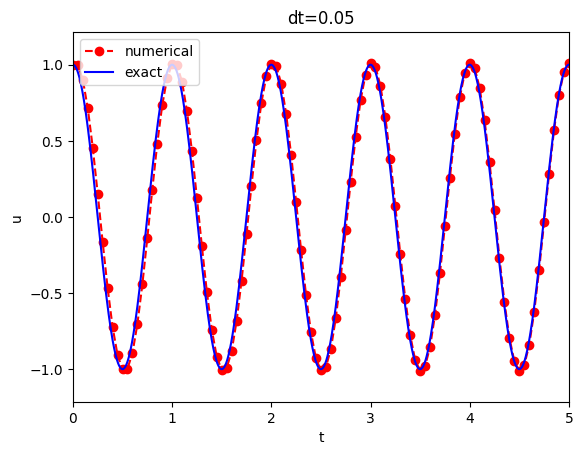

In [5]:
I = 1
w = 2*np.pi
dt = 0.05
num_periods = 5
P = 2*np.pi/w    #  one period
T = P*num_periods
u, t = solver(I, w, dt, T)
visualize(u, t, I, w)

Adjusting some of the input parameters via the command line can be
handy. Here is a code segment using the `ArgumentParser` tool in
the `argparse` module to define option value (`--option value`)
pairs on the command line:

```python
import argparse
parser = argparse.ArgumentParser()
parser.add_argument('--I', type=float, default=1.0)
parser.add_argument('--w', type=float, default=2*np.pi)
parser.add_argument('--dt', type=float, default=0.05)
parser.add_argument('--num_periods', type=int, default=5)
a = parser.parse_args()
I, w, dt, num_periods = a.I, a.w, a.dt, a.num_periods
```

Such parsing of the command line is explained in more detail in Section 5.2.3 in 
[[Langtangen_decay]](#Langtangen_decay).

A typical execution goes like

        Terminal> python vib_undamped.py --num_periods 20 --dt 0.1


## Verification
<div id="vib:ode1:verify"></div>


### Manual calculation

The simplest type of verification, which is also instructive for understanding
the algorithm, is to compute $u^1$, $u^2$, and $u^3$
with the aid of a calculator
and make a function for comparing these results with those from the `solver`
function. The `test_three_steps` function in
the file [`vib_undamped.py`](https://github.com/devitocodes/devito_book/blob/master/fdm-devito-notebooks/01_vib/src-vib/vib_undamped.py)
shows the details of how we use the hand calculations to test the code:

In [30]:
# %load -s test_three_steps, src-vib/vib_undamped.py
def test_three_steps():
    from math import pi
    I = 1;  w = 2*pi;  dt = 0.1;  T = 1
    u_by_hand = np.array([1.000000000000000,
                          0.802607911978213,
                          0.288358920740053])
    u, t = solver(I, w, dt, T)
    diff = np.abs(u_by_hand - u[:3]).max()
    tol = 1E-14
    assert diff < tol


This function is a proper *test function*,
compliant with the pytest and nose testing
framework for Python code, because

 * the function name begins with `test_`

 * the function takes no arguments

 * the test is formulated as a boolean condition and executed by `assert`

We shall in this book implement all software verification via such
proper test functions, also known as unit testing.

See Section 5.3.2 in [[Langtangen_decay]](#Langtangen_decay)
for more details on how to construct test functions and utilize nose
or pytest for automatic execution of tests. Our recommendation is to
use pytest. With this choice, you can
run all test functions in `vib_undamped.py` by

        Terminal> py.test -s -v vib_undamped.py
        ============================= test session starts ======...
        platform linux2 -- Python 2.7.9 -- ...
        collected 2 items
        
        vib_undamped.py::test_three_steps PASSED
        vib_undamped.py::test_convergence_rates PASSED
        
        =========================== 2 passed in 0.19 seconds ===...


### Testing very simple polynomial solutions

Constructing test problems where the exact solution is constant or
linear helps initial debugging and verification as one expects any
reasonable numerical method to reproduce such solutions to machine
precision.  Second-order accurate methods will often also reproduce a
quadratic solution.  Here $[D_tD_tt^2]^n=2$, which is the exact
result. A solution $u=t^2$ leads to $u^{\prime\prime}+\omega^2 u=2 + (\omega
t)^2\neq 0$.  We must therefore add a source in the equation: $u^{\prime\prime} +
\omega^2 u = f$ to allow a solution $u=t^2$ for $f=2 + (\omega t)^2$.  By
simple insertion we can show that the mesh function $u^n = t_n^2$ is
also a solution of the discrete equations.  [Problem 1: Use linear/quadratic functions for verification](#vib:exer:undamped:verify:linquad) asks you to carry out all
details to show that linear and quadratic solutions are solutions
of the discrete equations. Such results are very useful for debugging
and verification. You are strongly encouraged to do this problem now!


### Checking convergence rates

Empirical computation of convergence rates yields a good method for
verification. The method and its computational details are explained
in detail in Section 3.1.6 in [[Langtangen_decay]](#Langtangen_decay).  Readers not
familiar with the concept should look up this reference before
proceeding.

In the present problem, computing convergence rates means that we must

 * perform $m$ simulations, halving the time steps as: $\Delta t_i=2^{-i}\Delta t_0$, $i=1,\ldots,m-1$, and $\Delta t_i$ is the time step used in simulation $i$;

 * compute the $L^2$ norm of the error,
   $E_i=\sqrt{\Delta t_i\sum_{n=0}^{N_t-1}(u^n-u(t_n))^2}$ in each case;

 * estimate the convergence rates $r_i$ based on two consecutive
   experiments $(\Delta t_{i-1}, E_{i-1})$ and $(\Delta t_{i}, E_{i})$,
   assuming $E_i=C(\Delta t_i)^{r}$ and $E_{i-1}=C(\Delta t_{i-1})^{r}$, where $C$ is a constant.
   From these equations it follows that
   $r = \ln (E_{i-1}/E_i)/\ln (\Delta t_{i-1}/\Delta t_i)$. Since this $r$
   will vary with $i$, we equip it with an index and call it $r_{i-1}$,
   where $i$ runs from $1$ to $m-1$.

The computed rates $r_0,r_1,\ldots,r_{m-2}$ hopefully converge to the
number 2 in the present
problem, because theory (from the section [Analysis of the numerical scheme](#vib:ode1:analysis)) shows
that the error of the numerical method we use behaves like $\Delta t^2$.
The convergence of the sequence $r_0,r_1,\ldots,r_{m-2}$
demands that the time steps
$\Delta t_i$ are sufficiently small for the error model $E_i=C(\Delta t_i)^r$
to be valid.

All the implementational details of computing the sequence
$r_0,r_1,\ldots,r_{m-2}$ appear below.

In [31]:
# %load -s convergence_rates, src-vib/vib_undamped.py
def convergence_rates(m, solver_function, num_periods=8):
    """
    Return m-1 empirical estimates of the convergence rate
    based on m simulations, where the time step is halved
    for each simulation.
    solver_function(I, w, dt, T) solves each problem, where T
    is based on simulation for num_periods periods.
    """
    from math import pi
    w = 0.35; I = 0.3       # just chosen values
    P = 2*pi/w              # period
    dt = P/30               # 30 time step per period 2*pi/w
    T = P*num_periods

    dt_values = []
    E_values = []
    for i in range(m):
        u, t = solver_function(I, w, dt, T)
        u_e = u_exact(t, I, w)
        E = np.sqrt(dt*np.sum((u_e-u)**2))
        dt_values.append(dt)
        E_values.append(E)
        dt = dt/2

    r = [np.log(E_values[i-1]/E_values[i])/
         np.log(dt_values[i-1]/dt_values[i])
         for i in range(1, m, 1)]
    return r, E_values, dt_values


The error analysis in the section [Analysis of the numerical scheme](#vib:ode1:analysis) is quite
detailed and suggests that $r=2$. It is also a intuitively reasonable result, since we used a
second-order accurate finite difference approximation $[D_tD_tu]^n$ to
the ODE and a second-order accurate finite difference formula for the
initial condition for $u^{\prime}$.

In the present problem, when $\Delta t_0$ corresponds to 30 time steps
per period, the returned `r` list has all its values equal to 2.00
(if rounded to two decimals). This amazingly accurate result means that all
$\Delta t_i$ values are well into the asymptotic regime where the
error model $E_i = C(\Delta t_i)^r$ is valid.

We can now construct a proper test function that computes convergence rates
and checks that the final (and usually the best) estimate is sufficiently
close to 2. Here, a rough tolerance of 0.1 is enough. Later, we will argue
for an improvement by adjusting omega and include also that case in our test
function here. The unit test goes like

In [32]:
# %load -s test_convergence_rates, src-vib/vib_undamped.py
def test_convergence_rates():
    r, E, dt = convergence_rates(
        m=5, solver_function=solver, num_periods=8)
    # Accept rate to 1 decimal place
    tol = 0.1
    assert abs(r[-1] - 2.0) < tol
    # Test that adjusted w obtains 4th order convergence
    r, E, dt = convergence_rates(
        m=5, solver_function=solver_adjust_w, num_periods=8)
    print("adjust w rates:")
    print(r)
    assert abs(r[-1] - 4.0) < tol


where `solver_adjust_w` is a slight variation on the original `solver` function, as follows:

In [33]:
# %load -s solver_adjust_w, src-vib/vib_undamped.py
def solver_adjust_w(I, w, dt, T, adjust_w=True):
    """
    Solve u'' + w**2*u = 0 for t in (0,T], u(0)=I and u'(0)=0,
    by a central finite difference method with time step dt.
    """
    dt = float(dt)
    Nt = int(round(T/dt))
    t = Dimension('t', spacing=Constant('h_t'))

    u = TimeFunction(name='u', dimensions=(t,),
                     shape=(Nt+1,), space_order=2)

    w_adj = w*(1 - w**2*dt**2/24.) if adjust_w else w

    u.data[:] = I
    eqn = u.dt2 + (w**2)*u
    stencil = Eq(u.forward, solve(eqn, u.forward))
    op = Operator(stencil)
    op.apply(h_t=dt, t_M=Nt-1)
    return u.data, np.linspace(0, Nt*dt, Nt+1)


The complete code appears in the file [`vib_undamped.py`](https://github.com/devitocodes/devito_book/blob/master/fdm-devito-notebooks/01_vib/src-vib/vib_undamped.py).


### Visualizing convergence rates with slope markers

Tony S. Yu has written a script [`plotslopes.py`](http://goo.gl/A4Utm7)
that is very useful to indicate the slope of a graph, especially
a graph like $\ln E = r\ln \Delta t + \ln C$ arising from the model
$E=C\Delta t^r$. A copy of the script resides in the [`src-vib`](https://github.com/devitocodes/devito_book/tree/master/fdm-devito-notebooks/01_vib/src-vib)
directory. Let us use it to compare the original method for $u'' + \omega^2u =0$
with the same method applied to the equation with a modified
$\omega$. We make log-log plots of the error versus $\Delta t$.
For each curve we attach a slope marker using the `slope_marker((x,y), r)`
function from `plotslopes.py`, where `(x,y)` is the position of the
marker and `r` and the slope ($(r,1)$), here (2,1) and (4,1).

In [34]:
# %load -s plot_convergence_rates, src-vib/vib_undamped.py
def plot_convergence_rates():
    r2, E2, dt2 = convergence_rates(
        m=5, solver_function=solver, num_periods=8)
    plt.loglog(dt2, E2)
    r4, E4, dt4 = convergence_rates(
        m=5, solver_function=solver_adjust_w, num_periods=8)
    plt.loglog(dt4, E4)
    plt.legend(['original scheme', r'adjusted $\omega$'],
               loc='upper left')
    plt.title('Convergence of finite difference methods')
    # from plotslopes import slope_marker
    # slope_marker((dt2[1], E2[1]), (2,1))
    # slope_marker((dt4[1], E4[1]), (4,1))
    plt.savefig('tmp_convrate.png'); plt.savefig('tmp_convrate.pdf')
    plt.show()


[Figure](#vib:ode1:verify:fig:convrate_curve) displays the two curves
with the markers. The match of the curve slope and the marker slope is
excellent.

<!-- dom:FIGURE: [fig-vib/vib_adjusted_w_rate_curves.png, width=500 frac=0.7] Empirical convergence rate curves with special slope marker. <div id="vib:ode1:verify:fig:convrate_curve"></div> -->
<!-- begin figure -->
<div id="vib:ode1:verify:fig:convrate_curve"></div>

<p>Empirical convergence rate curves with special slope marker.</p>
<img src="fig-vib/vib_adjusted_w_rate_curves.png" width=500>

<!-- end figure -->


## Scaled model

It is advantageous to use dimensionless variables in simulations,
because fewer parameters need to be set. The present problem is made
dimensionless by introducing dimensionless variables $\bar t = t/t_c$
and $\bar u = u/u_c$, where $t_c$ and $u_c$ are characteristic scales
for $t$ and $u$, respectively. We refer to Section 2.2.1 in 
[[Langtangen_scaling]](#Langtangen_scaling) for all details about this scaling.

The scaled ODE problem reads

$$
\frac{u_c}{t_c^2}\frac{d^2\bar u}{d\bar t^2} + u_c\bar u = 0,\quad
u_c\bar u(0) = I,\ \frac{u_c}{t_c}\frac{d\bar u}{d\bar t}(0)=0\thinspace .
$$

A common choice is to take $t_c$ as one period of
the oscillations, $t_c = 2\pi/w$, and $u_c=I$.
This gives the dimensionless model

<!-- Equation labels as ordinary links -->
<div id="vib:ode1:model:scaled"></div>

$$
\begin{equation}
\frac{d^2\bar u}{d\bar t^2} + 4\pi^2 \bar u = 0,\quad \bar u(0)=1,\ 
\bar u^{\prime}(0)=0\thinspace .
\label{vib:ode1:model:scaled} \tag{13}
\end{equation}
$$

Observe that there are no physical parameters in ([13](#vib:ode1:model:scaled))!
We can therefore perform
a single numerical simulation $\bar u(\bar t)$ and afterwards
recover any $u(t; \omega, I)$ by

$$
u(t;\omega, I) = u_c\bar u(t/t_c) = I\bar u(\omega t/(2\pi))\thinspace .
$$

We can easily check this assertion: the solution of the scaled problem
is $\bar u(\bar t) = \cos(2\pi\bar t)$. The formula for $u$ in terms
of $\bar u$ gives $u = I\cos(\omega t)$, which is nothing but the solution
of the original problem with dimensions.

The scaled model can be run by calling `solver(I=1, w=2*pi, dt, T)`.
Each period is now 1 and `T` simply counts the number of periods.
Choosing `dt` as `1./M` gives `M` time steps per period.


# Visualization of long time simulations
<div id="vib:ode1:longseries"></div>

[Figure](#vib:ode1:2dt) shows a comparison of the exact and numerical
solution for the scaled model ([13](#vib:ode1:model:scaled)) with
$\Delta t=0.1, 0.05$.
From the plot we make the following observations:

 * The numerical solution seems to have correct amplitude.

 * There is an angular frequency error which is reduced by decreasing the time step.

 * The total angular frequency error grows with time.

By angular frequency error we mean that the numerical angular frequency differs
from the exact $\omega$. This is evident by looking
at the peaks of the numerical solution: these have incorrect
positions compared with the peaks of the exact cosine solution. The
effect can be mathematically expressed by writing the numerical solution
as $I\cos\tilde\omega t$, where $\tilde\omega$ is not exactly
equal to $\omega$. Later, we shall mathematically
quantify this numerical angular frequency $\tilde\omega$.

Here, we show the effect of halving the time step on the error.

In [35]:
I = 1
w = 2*np.pi
num_periods = 5
P = 2*np.pi/w    #  one period
T = P*num_periods

Operator `Kernel` ran in 0.01 s


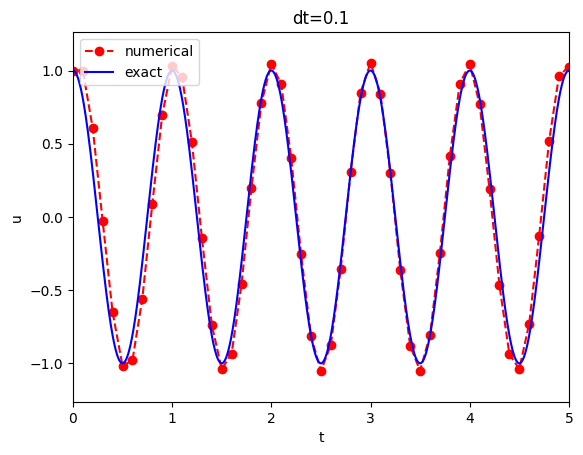

In [36]:
dt = 0.1
u_1, t = solver(I, w, dt, T)
visualize(u_1, t, I, w)

Operator `Kernel` ran in 0.01 s


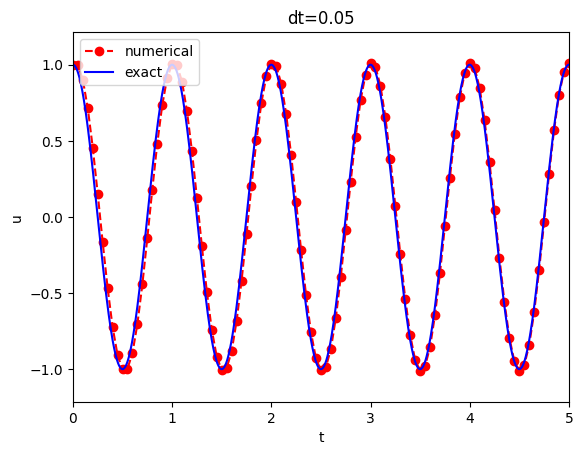

In [37]:
dt = 0.05
u_2, t = solver(I, w, dt, T)
visualize(u_2, t, I, w)


## Using a moving plot window


In vibration problems it is often of interest to investigate the system's
behavior over long time intervals. Errors in the angular frequency accumulate
and become more visible as time grows. We can investigate long
time series by introducing a moving plot window that can move along with
the $p$ most recently computed periods of the solution. The
[SciTools](https://github.com/hplgit/scitools) package contains
a convenient tool for this: `MovingPlotWindow`. Typing
`pydoc scitools.MovingPlotWindow` shows a demo and a description of its use.
The function below utilizes the moving plot window and is in fact
called by the `main` function in the `vib_undamped` module
if the number of periods in the simulation exceeds 10.

In [38]:
# %load -s visualize_front, src-vib/vib_undamped.py
def visualize_front(u, t, I, w, savefig=False, skip_frames=1):
    """
    Visualize u and the exact solution vs t, using a
    moving plot window and continuous drawing of the
    curves as they evolve in time.
    Makes it easy to plot very long time series.
    Plots are saved to files if savefig is True.
    Only each skip_frames-th plot is saved (e.g., if
    skip_frame=10, only each 10th plot is saved to file;
    this is convenient if plot files corresponding to
    different time steps are to be compared).
    """
    import scitools.std as st
    from scitools.MovingPlotWindow import MovingPlotWindow
    from math import pi

    # Remove all old plot files tmp_*.png
    import glob, os
    for filename in glob.glob('tmp_*.png'):
        os.remove(filename)

    P = 2*pi/w  # one period
    umin = 1.2*u.min();  umax = -umin
    dt = t[1] - t[0]
    plot_manager = MovingPlotWindow(
        window_width=8*P,
        dt=dt,
        yaxis=[umin, umax],
        mode='continuous drawing')
    frame_counter = 0
    for n in range(1,len(u)):
        if plot_manager.plot(n):
            s = plot_manager.first_index_in_plot
            st.plot(t[s:n+1], u[s:n+1], 'r-1',
                    t[s:n+1], I*cos(w*t)[s:n+1], 'b-1',
                    title='t=%6.3f' % t[n],
                    axis=plot_manager.axis(),
                    show=not savefig) # drop window if savefig
            if savefig and n % skip_frames == 0:
                filename = 'tmp_%04d.png' % frame_counter
                st.savefig(filename)
                print('making plot file', filename, 'at t=%g' % t[n])
                frame_counter += 1
        plot_manager.update(n)


We run the scaled problem (the default values for the command-line arguments
`--I` and `--w` correspond to the scaled problem) for 40 periods with 20
time steps per period:

        Terminal> python vib_undamped.py --dt 0.05 --num_periods 40


The moving plot window is invoked, and we can follow the numerical and exact
solutions as time progresses. From this demo we see that
the angular frequency error is small in the beginning, and that it becomes more
prominent with time. A new run with $\Delta t=0.1$ (i.e., only 10 time steps per period)
clearly shows that the phase errors become significant even earlier
in the time series, deteriorating the solution further.

## Making animations
<div id="vib:ode1:anim"></div>


### Producing standard video formats

The `visualize_front` function stores all the plots in
files whose names are numbered:
`tmp_0000.png`, `tmp_0001.png`, `tmp_0002.png`,
and so on. From these files we may make a movie. The Flash
format is popular,

        Terminal> ffmpeg -r 25 -i tmp_%04d.png -c:v flv movie.flv


The `-r` option should come first and
describes the number of frames per second in the movie (even if we
would like to have slow movies, keep this number as large as 25,
otherwise files are skipped from the movie). The
`-i` option describes the name of the plot files.
Other formats can be generated by changing the video codec
and equipping the video file with the right extension:

<table border="1">
<thead>
<tr><th align="center">Format</th> <th align="center">    Codec and filename    </th> </tr>
</thead>
<tbody>
<tr><td align="left">   Flash     </td> <td align="left">   <code>-c:v flv movie.flv</code>          </td> </tr>
<tr><td align="left">   MP4       </td> <td align="left">   <code>-c:v libx264 movie.mp4</code>      </td> </tr>
<tr><td align="left">   WebM      </td> <td align="left">   <code>-c:v libvpx movie.webm</code>      </td> </tr>
<tr><td align="left">   Ogg       </td> <td align="left">   <code>-c:v libtheora movie.ogg</code>    </td> </tr>
</tbody>
</table>

The video file can be played by some video player like `vlc`, `mplayer`,
`gxine`, or `totem`, e.g.,

        Terminal> vlc movie.webm


A web page can also be used to play the movie. Today's standard is
to use the HTML5 `video` tag:

        <video autoplay loop controls
               width='640' height='365' preload='none'>
        <source src='movie.webm'  type='video/webm; codecs="vp8, vorbis"'>
        </video>


Modern browsers do not support all of the video formats.
MP4 is needed to successfully play the videos on Apple devices
that use the Safari browser.
WebM is the preferred format for Chrome, Opera, Firefox, and Internet
Explorer v9+. Flash was a popular format, but older browsers that
required Flash can play MP4. All browsers that work with Ogg can also
work with WebM. This means that to have a video work in all browsers,
the video should be available in the MP4 and WebM formats.
The proper HTML code reads

        <video autoplay loop controls
               width='640' height='365' preload='none'>
        <source src='movie.mp4'   type='video/mp4;
         codecs="avc1.42E01E, mp4a.40.2"'>
        <source src='movie.webm'  type='video/webm;
         codecs="vp8, vorbis"'>
        </video>


The MP4 format should appear first to ensure that Apple devices will
load the video correctly.

**Caution: number the plot files correctly.**

To ensure that the individual plot frames are shown in correct order,
it is important to number the files with zero-padded numbers
(0000, 0001, 0002, etc.). The printf format `%04d` specifies an
integer in a field of width 4, padded with zeros from the left.
A simple Unix wildcard file specification like `tmp_*.png`
will then list the frames in the right order. If the numbers in the
filenames were not zero-padded, the frame `tmp_11.png` would appear
before `tmp_2.png` in the movie.



### Playing PNG files in a web browser

The `scitools movie` command can create a movie player for a set
of PNG files such that a web browser can be used to watch the movie.
This interface has the advantage that the speed of the movie can
easily be controlled, a feature that scientists often appreciate.
The command for creating an HTML with a player for a set of
PNG files `tmp_*.png` goes like

        Terminal> scitools movie output_file=vib.html fps=4 tmp_*.png


The `fps` argument controls the speed of the movie ("frames per second").

To watch the movie, load the video file `vib.html` into some browser, e.g.,

        Terminal> google-chrome vib.html  # invoke web page


Click on `Start movie` to see the result. Moving this movie to
some other place requires moving `vib.html` *and all the PNG files*
`tmp_*.png`:

        Terminal> mkdir vib_dt0.1
        Terminal> mv tmp_*.png vib_dt0.1
        Terminal> mv vib.html vib_dt0.1/index.html


### Making animated GIF files

The `convert` program from the ImageMagick software suite can be
used to produce animated GIF files from a set of PNG files:

        Terminal> convert -delay 25 tmp_vib*.png tmp_vib.gif


The `-delay` option needs an argument of the delay between each frame,
measured in 1/100 s, so 4 frames/s here gives 25/100 s delay.
Note, however, that in this particular example
with $\Delta t=0.05$ and 40 periods,
making an animated GIF file out of
the large number of PNG files is a very heavy process and not
considered feasible. Animated GIFs are best suited for animations with
not so many frames and where you want to see each frame and play them
slowly.

[hpl 2: Combine two simulations side by side!]

## Using Bokeh to compare graphs


Instead of a moving plot frame, one can use tools that allow panning
by the mouse. For example, we can show four periods of several signals in
several plots and then scroll with the mouse through the rest of the
simulation *simultaneously* in all the plot windows.
The [Bokeh](http://bokeh.pydata.org/en/latest) plotting library offers such tools, but the plots must be displayed in
a web browser. The documentation of Bokeh is excellent, so here we just
show how the library can be used to compare a set of $u$ curves corresponding
to long time simulations. (By the way, the guidance to correct
pronunciation of Bokeh in
the [documentation](http://bokeh.pydata.org/en/0.10.0/docs/faq.html#how-do-you-pronounce-bokeh) and on [Wikipedia](https://en.wikipedia.org/wiki/Bokeh) is not directly compatible with a [YouTube video](https://www.youtube.com/watch?v=OR8HSHevQTM)...).

Imagine we have performed experiments for a set of $\Delta t$ values.
We want each curve, together with the exact solution, to appear in
a plot, and then arrange all plots in a grid-like fashion:

<!-- dom:FIGURE: [fig-vib/bokeh_gridplot1.png, width=800 frac=1] -->
<!-- begin figure -->

<p></p>
<img src="fig-vib/bokeh_gridplot1.png" width=800>

<!-- end figure -->


Furthermore, we want the axes to couple such that if we move into
the future in one plot, all the other plots follows (note the
displaced $t$ axes!):

<!-- dom:FIGURE: [fig-vib/bokeh_gridplot2.png, width=800 frac=1] -->
<!-- begin figure -->

<p></p>
<img src="fig-vib/bokeh_gridplot2.png" width=800>

<!-- end figure -->



A function for creating a Bokeh plot, given a list of `u` arrays
and corresponding `t` arrays, is implemented below.
The code combines data from different simulations, described
compactly in a list of strings `legends`.

A particular example using the `bokeh_plot` function appears below.

In [39]:
# %load -s bokeh_plot, src-vib/vib_undamped.py
def bokeh_plot(u, t, legends, I, w, t_range, filename):
    """
    Make plots for u vs t using the Bokeh library.
    u and t are lists (several experiments can be compared).
    legens contain legend strings for the various u,t pairs.
    """
    if not isinstance(u, (list,tuple)):
        u = [u]  # wrap in list
    if not isinstance(t, (list,tuple)):
        t = [t]  # wrap in list
    if not isinstance(legends, (list,tuple)):
        legends = [legends]  # wrap in list

    import bokeh.plotting as plt
    plt.output_file(filename, mode='cdn', title='Comparison')
    # Assume that all t arrays have the same range
    t_fine = np.linspace(0, t[0][-1], 1001)  # fine mesh for u_e
    tools = 'pan,wheel_zoom,box_zoom,reset,'\
            'save,box_select,lasso_select'
    u_range = [-1.2*I, 1.2*I]
    font_size = '8pt'
    p = []  # list of plot objects
    # Make the first figure
    p_ = plt.figure(
        width=300, height=250, title=legends[0],
        x_axis_label='t', y_axis_label='u',
        x_range=t_range, y_range=u_range, tools=tools)
    p_.xaxis.axis_label_text_font_size=font_size
    p_.yaxis.axis_label_text_font_size=font_size
    p_.line(t[0], u[0], line_color='blue')
    # Add exact solution
    u_e = u_exact(t_fine, I, w)
    p_.line(t_fine, u_e, line_color='red', line_dash='4 4')
    p.append(p_)
    # Make the rest of the figures and attach their axes to
    # the first figure's axes
    for i in range(1, len(t)):
        p_ = plt.figure(
            width=300, height=250, title=legends[i],
            x_axis_label='t', y_axis_label='u',
            x_range=p[0].x_range, y_range=p[0].y_range, tools=tools)
        p_.xaxis.axis_label_text_font_size = font_size
        p_.yaxis.axis_label_text_font_size = font_size
        p_.line(t[i], u[i], line_color='blue')
        p_.line(t_fine, u_e, line_color='red', line_dash='4 4')
        p.append(p_)

    # Arrange all plots in a grid with 3 plots per row
    grid = [[]]
    for i, p_ in enumerate(p):
        grid[-1].append(p_)
        if (i+1) % 3 == 0:
            # New row
            grid.append([])
    plot = plt.gridplot(grid, toolbar_location='left')
    plt.save(plot)
    plt.show(plot)


In [40]:
# %load -s demo_bokeh, src-vib/vib_undamped.py
def demo_bokeh():
    """Solve a scaled ODE u'' + u = 0."""
    from math import pi
    w = 1.0        # Scaled problem (frequency)
    P = 2*np.pi/w  # Period
    num_steps_per_period = [5, 10, 20, 40, 80]
    T = 40*P       # Simulation time: 40 periods
    u = []         # List of numerical solutions
    t = []         # List of corresponding meshes
    legends = []
    for n in num_steps_per_period:
        dt = P/n
        u_, t_ = solver(I=1, w=w, dt=dt, T=T)
        u.append(u_)
        t.append(t_)
        legends.append('# time steps per period: %d' % n)
    bokeh_plot(u, t, legends, I=1, w=w, t_range=[0, 4*P],
               filename='tmp.html')


We can run this below, which should open a window with the Bokeh plots where you can experiment with the graphs yourself:

In [41]:
# NBVAL_IGNORE_OUTPUT
demo_bokeh()

Operator `Kernel` ran in 0.01 s
Operator `Kernel` ran in 0.01 s
Operator `Kernel` ran in 0.01 s
Operator `Kernel` ran in 0.01 s
Operator `Kernel` ran in 0.01 s


## Using a line-by-line ascii plotter

Plotting functions vertically, line by line, in the terminal window
using ascii characters only is a simple, fast, and convenient
visualization technique for long time series. Note that the time
axis then is positive downwards on the screen, so we can let the
solution be visualized "forever".
The tool
`scitools.avplotter.Plotter` makes it easy to create such plots:

In [42]:
# %load -s visualize_front_ascii, src-vib/vib_undamped.py
def visualize_front_ascii(u, t, I, w, fps=10):
    """
    Plot u and the exact solution vs t line by line in a
    terminal window (only using ascii characters).
    Makes it easy to plot very long time series.
    """
    from scitools.avplotter import Plotter
    import time
    from math import pi
    P = 2*pi/w
    umin = 1.2*u.min();  umax = -umin

    p = Plotter(ymin=umin, ymax=umax, width=60, symbols='+o')
    for n in range(len(u)):
        print(p.plot(t[n], u[n], I*np.cos(w*t[n])), '%.1f' % (t[n]/P))
        time.sleep(1/float(fps))


The call `p.plot` returns a line of text, with the $t$ axis marked and
a symbol `+` for the first function (`u`) and `o` for the second
function (the exact solution). Here we append to this text
a time counter reflecting how many periods the current time point
corresponds to.

The function can be run as follows:

In [43]:
visualize_front_ascii(u, t, I, w)

                              |                        o      0.0
                              |                       o+      0.1
                              |                   o +         0.1
                              |              o  +             0.2
                              |       o  +                    0.2
                              |   +                           0.2
                      o   +   |                               0.3
               o  +           |                               0.4
          o +                 |                               0.4
      o +                     |                               0.5
     o                        |                               0.5
     +o                       |                               0.6
        + o                   |                               0.6
             + o              |                               0.7
                   +  o       |                               0.7
          

## Empirical analysis of the solution
<div id="vib:ode1:empirical"></div>


For oscillating functions like those in [Figure](#vib:ode1:2dt) we may
compute the amplitude and frequency (or period) empirically.
That is, we run through the discrete solution points $(t_n, u_n)$ and
find all maxima and minima points. The distance between two consecutive
maxima (or minima) points can be used as estimate of the local period,
while half the difference between the $u$ value at a maximum and a nearby
minimum gives an estimate of the local amplitude.

The local maxima are the points where

<!-- Equation labels as ordinary links -->
<div id="_auto4"></div>

$$
\begin{equation}
u^{n-1} < u^n > u^{n+1},\quad n=1,\ldots,N_t-1,
% \label{_auto4}
\tag{14}
\end{equation}
$$

and the local minima are recognized by

<!-- Equation labels as ordinary links -->
<div id="_auto5"></div>

$$
\begin{equation}
u^{n-1} > u^n < u^{n+1},\quad n=1,\ldots,N_t-1
\thinspace .
\label{_auto5} \tag{15}
\end{equation}
$$

In computer code this becomes

In [44]:
# %load -s minmax, src-vib/vib_empirical_analysis.py
def minmax(t, u):
    """
    Compute all local minima and maxima of the function u(t),
    represented by discrete points in the arrays u and t.
    Return lists minima and maxima of (t[i],u[i]) extreme points.
    """
    minima = []; maxima = []
    for n in range(1, len(u)-1, 1):
        if u[n-1] > u[n] < u[n+1]:
            minima.append((t[n], u[n]))
        if u[n-1] < u[n] > u[n+1]:
            maxima.append((t[n], u[n]))
    return minima, maxima


Note that the two returned objects are lists of tuples.

Let $(t_i, e_i)$, $i=0,\ldots,M-1$, be the sequence of all
the $M$ maxima points, where $t_i$
is the time value and $e_i$ the corresponding $u$ value.
The local period can be defined as $p_i=t_{i+1}-t_i$.
With Python syntax this reads

In [45]:
# %load -s periods, src-vib/vib_empirical_analysis.py
def periods(extrema):
    """
    Given a list of (t,u) points of the maxima or minima,
    return an array of the corresponding local periods.
    """
    p = [extrema[n][0] - extrema[n-1][0]
         for n in range(1, len(extrema))]
    return np.array(p)


The list `p` created by a list comprehension is converted to an array
since we probably want to compute with it, e.g., find the corresponding
frequencies `2*pi/p`.

Having the minima and the maxima, the local amplitude can be
calculated as the difference between two neighboring minimum and
maximum points:

In [46]:
# %load -s amplitudes, src-vib/vib_empirical_analysis.py
def amplitudes(minima, maxima):
    """
    Given a list of (t,u) points of the minima and maxima of
    u, return an array of the corresponding local amplitudes.
    """
    # Compare first maxima with first minima and so on
    a = [(abs(maxima[n][1] - minima[n][1]))/2.0
         for n in range(min(len(minima),len(maxima)))]
    return np.array(a)


The code segments are found in the file [`vib_empirical_analysis.py`](https://github.com/devitocodes/devito_book/blob/master/fdm-devito-notebooks/01_vib/src-vib/vib_empirical_analysis.py).

Since `a[i]` and `p[i]` correspond to
the $i$-th amplitude estimate and the $i$-th period estimate, respectively,
it is most convenient to visualize the `a` and `p` values with the
index `i` on the horizontal axis.
(There is no unique time point associated with either of these estimate
since values at two different time points were used in the
computations.)

In the analysis of very long time series, it is advantageous to
compute and plot `p` and `a` instead of $u$ to get an impression of
the development of the oscillations. Let us do this for the scaled
problem and $\Delta t=0.1, 0.05, 0.01$.
A ready-made function

```python
plot_empirical_freq_and_amplitude(u, t, I, w)
```

computes the empirical amplitudes and periods, and creates a plot
where the amplitudes and angular frequencies
are visualized together with the exact amplitude `I`
and the exact angular frequency `w`. 

In [47]:
# %load -s plot_empirical_freq_and_amplitude, src-vib/vib_undamped.py
def plot_empirical_freq_and_amplitude(u, t, I, w):
    """
    Find the empirical angular frequency and amplitude of
    simulations in u and t. u and t can be arrays or (in
    the case of multiple simulations) multiple arrays.
    One plot is made for the amplitude and one for the angular
    frequency (just called frequency in the legends).
    """
    from math import pi
    if not isinstance(u, (list,tuple)):
        u = [u]
        t = [t]
    legends1 = []
    legends2 = []
    for i in range(len(u)):
        minima, maxima = minmax(t[i], u[i])
        p = periods(maxima)
        a = amplitudes(minima, maxima)
        plt.figure(1)
        plt.plot(range(len(p)), 2*pi/p)
        legends1.append('frequency, case%d' % (i+1))
        plt.figure(2)
        plt.plot(range(len(a)), a)
        legends2.append('amplitude, case%d' % (i+1))
    plt.figure(1)
    plt.plot(range(len(p)), [w]*len(p), 'k--')
    legends1.append('exact frequency')
    plt.legend(legends1, loc='lower left')
    plt.axis([0, len(a)-1, 0.8*w, 1.2*w])
    plt.savefig('tmp1.png');  plt.savefig('tmp1.pdf')
    plt.figure(2)
    plt.plot(range(len(a)), [I]*len(a), 'k--')
    legends2.append('exact amplitude')
    plt.legend(legends2, loc='lower left')
    plt.axis([0, len(a)-1, 0.8*I, 1.2*I])
    plt.savefig('tmp2.png');  plt.savefig('tmp2.pdf')
    plt.show()


We can make a little program
for creating the plot:

Operator `Kernel` ran in 0.01 s
Operator `Kernel` ran in 0.01 s
Operator `Kernel` ran in 0.01 s


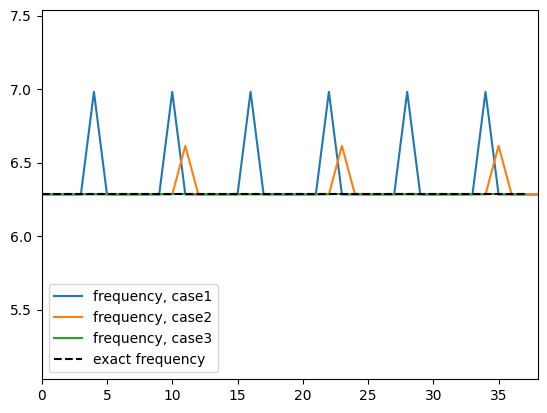

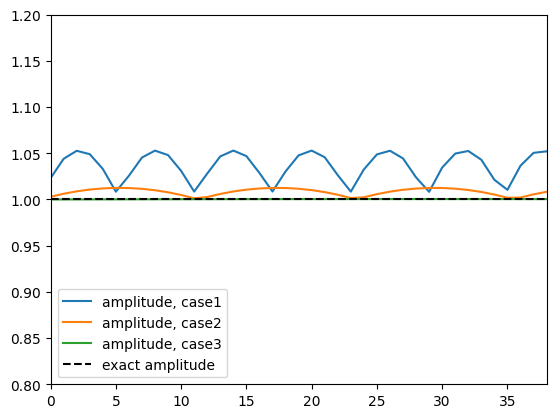

In [48]:
# NBVAL_IGNORE_OUTPUT
from math import pi
dt_values = [0.1, 0.05, 0.01]
u_cases = []
t_cases = []
for dt in dt_values:
    # Simulate scaled problem for 40 periods
    u, t = solver(I=1, w=2*pi, dt=dt, T=40)
    u_cases.append(u)
    t_cases.append(t)
plot_empirical_freq_and_amplitude(u_cases, t_cases, I=1, w=2*pi)


Empirical angular frequency (top) and amplitude (bottom) for three different time steps.

We can clearly see that
lowering $\Delta t$ improves the angular frequency significantly, while the
amplitude seems to be more accurate.
The lines with
$\Delta t=0.01$, corresponding to 100 steps per period, can hardly be
distinguished from the exact values. The next section shows how we
can get mathematical insight into why amplitudes are good while frequencies
are more inaccurate.

# Analysis of the numerical scheme
<div id="vib:ode1:analysis"></div>

## Deriving a solution of the numerical scheme
<div id="vib:ode1:analysis:solderiv"></div>

After having seen the phase error grow with time in the previous
section, we shall now quantify this error through mathematical
analysis.  The key tool in the analysis will be to establish an exact
solution of the discrete equations.  The difference equation
([7](#vib:ode1:step4)) has constant coefficients and is
homogeneous. Such equations are known to have solutions on the form
$u^n=CA^n$, where $A$ is some number
to be determined from the difference equation and $C$ is found as the
initial condition ($C=I$).  Recall that $n$ in $u^n$ is a
superscript labeling the time level, while $n$ in $A^n$ is an
exponent.

With oscillating functions as solutions, the algebra will
be considerably simplified if we seek an $A$ on the form

$$
A=e^{i\tilde\omega \Delta t},
$$

and solve for the numerical frequency $\tilde\omega$ rather than
$A$. Note that $i=\sqrt{-1}$ is the imaginary unit. (Using a
complex exponential function gives simpler arithmetics than working
with a sine or cosine function.)
We have

$$
A^n = e^{i\tilde\omega \Delta t\, n}=e^{i\tilde\omega t_n} =
\cos (\tilde\omega t_n) + i\sin(\tilde \omega t_n)
\thinspace .
$$

The physically relevant numerical solution can
be taken as the real part of this complex expression.

The calculations go as

$$
\begin{align*}
[D_tD_t u]^n &= \frac{u^{n+1} - 2u^n + u^{n-1}}{\Delta t^2}\\ 
&= I\frac{A^{n+1} - 2A^n + A^{n-1}}{\Delta t^2}\\ 
&= \frac{I}{\Delta t^{2}}(e^{i\tilde\omega(t_n+\Delta t)} - 2e^{i\tilde\omega t_n} + e^{i\tilde\omega(t_n-\Delta t)})\\ 
&= Ie^{i\tilde\omega t_n}\frac{1}{\Delta t^2}\left(e^{i\tilde\omega\Delta t} + e^{i\tilde\omega(-\Delta t)} - 2\right)\\ 
&= Ie^{i\tilde\omega t_n}\frac{2}{\Delta t^2}\left(\cosh(i\tilde\omega\Delta t) -1 \right)\\ 
&= Ie^{i\tilde\omega t_n}\frac{2}{\Delta t^2}\left(\cos(\tilde\omega\Delta t) -1 \right)\\ 
&= -Ie^{i\tilde\omega t_n}\frac{4}{\Delta t^2}\sin^2(\frac{\tilde\omega\Delta t}{2})
\end{align*}
$$

The last line follows from the relation
$\cos x - 1 = -2\sin^2(x/2)$ (try `cos(x)-1` on
[wolframalpha.com](http://www.wolframalpha.com) to see the formula).

The scheme ([7](#vib:ode1:step4))
with $u^n=Ie^{i\tilde\omega\Delta t\, n}$ inserted now gives

<!-- Equation labels as ordinary links -->
<div id="_auto6"></div>

$$
\begin{equation}
-Ie^{i\tilde\omega t_n}
\frac{4}{\Delta t^2}\sin^2(\frac{\tilde\omega\Delta t}{2})
+ \omega^2 Ie^{i\tilde\omega t_n} = 0,
\label{_auto6} \tag{16}
\end{equation}
$$

which after dividing by $Ie^{i\tilde\omega t_n}$ results in

<!-- Equation labels as ordinary links -->
<div id="_auto7"></div>

$$
\begin{equation}
\frac{4}{\Delta t^2}\sin^2(\frac{\tilde\omega\Delta t}{2}) = \omega^2
\thinspace .
\label{_auto7} \tag{17}
\end{equation}
$$

The first step in solving for the unknown $\tilde\omega$ is

$$
\sin^2(\frac{\tilde\omega\Delta t}{2}) = \left(\frac{\omega\Delta t}{2}\right)^2
\thinspace .
$$

Then, taking the square root, applying the inverse sine function, and
multiplying by $2/\Delta t$, results in

<!-- Equation labels as ordinary links -->
<div id="vib:ode1:tildeomega"></div>

$$
\begin{equation}
\tilde\omega = \pm \frac{2}{\Delta t}\sin^{-1}\left(\frac{\omega\Delta t}{2}\right)
\thinspace .
\label{vib:ode1:tildeomega} \tag{18}
\end{equation}
$$

## The error in the numerical frequency
<div id="vib:ode1:analysis:numfreq"></div>


The first observation following ([18](#vib:ode1:tildeomega)) tells that there
is a phase error since the numerical frequency $\tilde\omega$ never
equals the exact frequency $\omega$. But how good is the approximation
([18](#vib:ode1:tildeomega))? That is, what is the error $\omega -
\tilde\omega$ or $\tilde\omega/\omega$?  Taylor series expansion for
small $\Delta t$ may give an expression that is easier to understand
than the complicated function in ([18](#vib:ode1:tildeomega)):

In [49]:
from sympy import *
dt, w = symbols('dt w')
w_tilde_e = 2/dt*asin(w*dt/2)
w_tilde_series = w_tilde_e.series(dt, 0, 4)
print(w_tilde_series)

w + dt**2*w**3/24 + O(dt**4)


This means that

<!-- See vib_symbolic.py for computations with sympy -->

<!-- Equation labels as ordinary links -->
<div id="vib:ode1:tildeomega:series"></div>

$$
\begin{equation}
\tilde\omega = \omega\left( 1 + \frac{1}{24}\omega^2\Delta t^2\right)
+ \mathcal{O}({\Delta t^4})
\thinspace .
\label{vib:ode1:tildeomega:series} \tag{19}
\end{equation}
$$

The error in the numerical frequency is of second-order in $\Delta t$,
and the error vanishes as $\Delta t\rightarrow 0$.  We see that
$\tilde\omega > \omega$ since the term $\omega^3\Delta t^2/24 >0$ and
this is by far the biggest term in the series expansion for small
$\omega\Delta t$. A numerical frequency that is too large gives an
oscillating curve that oscillates too fast and therefore "lags
behind" the exact oscillations, a feature that can be seen in the
left plot in [Figure](#vib:ode1:2dt).

[Figure](#vib:ode1:tildeomega:plot) plots the discrete frequency
([18](#vib:ode1:tildeomega)) and its approximation
([19](#vib:ode1:tildeomega:series)) for $\omega =1$ (based on the
program [`vib_plot_freq.py`](https://github.com/devitocodes/devito_book/blob/master/fdm-devito-notebooks/01_vib/src-vib/vib_plot_freq.py)).
Although $\tilde\omega$ is a function of $\Delta t$ in
([19](#vib:ode1:tildeomega:series)), it is misleading to think of
$\Delta t$ as the important discretization parameter. It is the
product $\omega\Delta t$ that is the key discretization
parameter. This quantity reflects the *number of time steps per
period* of the oscillations.  To see this, we set $P=N_P\Delta t$,
where $P$ is the length of a period, and $N_P$ is the number of time
steps during a period.  Since $P$ and $\omega$ are related by
$P=2\pi/\omega$, we get that $\omega\Delta t = 2\pi/N_P$, which shows
that $\omega\Delta t$ is directly related to $N_P$.

The plot shows that at least $N_P\sim 25-30$ points per period are
necessary for reasonable accuracy, but this depends on the length of
the simulation ($T$) as the total phase error due to the frequency
error grows linearly with time (see [Exercise 2: Show linear growth of the phase with time](#vib:exer:phase:err:growth)).

<!-- dom:FIGURE: [fig-vib/discrete_freq.png, width=400] Exact discrete frequency and its second-order series expansion. <div id="vib:ode1:tildeomega:plot"></div> -->
<!-- begin figure -->
<div id="vib:ode1:tildeomega:plot"></div>

<p>Exact discrete frequency and its second-order series expansion.</p>
<img src="fig-vib/discrete_freq.png" width=400>

<!-- end figure -->



## Empirical convergence rates and adjusted $\omega$

The expression ([19](#vib:ode1:tildeomega:series)) suggests that
adjusting omega to

$$
\omega\left( 1 - \frac{1}{24}\omega^2\Delta t^2\right),
$$

could have effect on the *convergence rate* of the global error in $u$
(cf. the section [Verification](#vib:ode1:verify)). With the `convergence_rates` function
in `vib_undamped.py` we can easily check this. A special solver, with
adjusted $w$, is available as the function `solver_adjust_w`. A
call to `convergence_rates` with this solver reveals that the rate is
4.0! With the original, physical $\omega$ the rate is 2.0  - as expected
from using second-order finite difference approximations,
as expected from the forthcoming derivation of the global error,
and as expected from truncation error analysis as explained in the [truncation error analysis](../B_trunc/trunc.ipynb#trunc:vib:undamped) section.

Adjusting $\omega$ is an ideal trick for this simple problem, but when
adding damping and nonlinear terms, we have no simple formula for the
impact on $\omega$, and therefore we cannot use the trick.

## Exact discrete solution
<div id="vib:ode1:analysis:sol"></div>


Perhaps more important than the $\tilde\omega = \omega + {\cal O}(\Delta t^2)$
result found above is the fact that we have an exact discrete solution of
the problem:

<!-- Equation labels as ordinary links -->
<div id="vib:ode1:un:exact"></div>

$$
\begin{equation}
u^n = I\cos\left(\tilde\omega n\Delta t\right),\quad
\tilde\omega = \frac{2}{\Delta t}\sin^{-1}\left(\frac{\omega\Delta t}{2}\right)
\thinspace .
\label{vib:ode1:un:exact} \tag{20}
\end{equation}
$$

We can then compute the error mesh function

<!-- Equation labels as ordinary links -->
<div id="vib:ode1:en"></div>

$$
\begin{equation}
e^n = u(t_n) - u^n =
I\cos\left(\omega n\Delta t\right) - I\cos\left(\tilde\omega n\Delta t\right)\thinspace .
\label{vib:ode1:en} \tag{21}
\end{equation}
$$

From the formula $\cos 2x - \cos 2y = -2\sin(x-y)\sin(x+y)$ we can
rewrite $e^n$ so the expression is easier to interpret:

<!-- Equation labels as ordinary links -->
<div id="vib:ode1:en2"></div>

$$
\begin{equation}
e^n = -2I\sin\left(t\frac{1}{2}\left( \omega - \tilde\omega\right)\right)
\sin\left(t\frac{1}{2}\left( \omega + \tilde\omega\right)\right)\thinspace .
\label{vib:ode1:en2} \tag{22}
\end{equation}
$$

The error mesh function is ideal for verification purposes and you are
strongly encouraged to make a test based on ([20](#vib:ode1:un:exact))
by doing [Exercise 11: Use an exact discrete solution for verification](#vib:exer:discrete:omega).


## Convergence
<div id="vib:ode1:analysis:conv"></div>


We can use ([19](#vib:ode1:tildeomega:series)) and ([21](#vib:ode1:en)), or
([22](#vib:ode1:en2)), to show *convergence* of the numerical scheme,
i.e., $e^n\rightarrow 0$ as $\Delta t\rightarrow 0$, which implies
that the numerical solution approaches the exact solution as $\Delta
t$ approaches to zero.  We have that

$$
\lim_{\Delta t\rightarrow 0}
\tilde\omega = \lim_{\Delta t\rightarrow 0}
\frac{2}{\Delta t}\sin^{-1}\left(\frac{\omega\Delta t}{2}\right)
= \omega,
$$

by L'Hopital's rule. This result could also been computed [WolframAlpha](http://www.wolframalpha.com/input/?i=%282%2Fx%29*asin%28w*x%2F2%29+as+x-%3E0), or
we could use the limit functionality in `sympy`:

In [50]:
import sympy as sym
dt, w = sym.symbols('x w')
sym.limit((2/dt)*sym.asin(w*dt/2), dt, 0, dir='+')

w

Also ([19](#vib:ode1:tildeomega:series)) can be used to establish
that $\tilde\omega\rightarrow\omega$ when $\Delta t\rightarrow 0$.
mathcal{I}_t then follows from the expression(s) for $e^n$ that $e^n\rightarrow 0$.

## The global error


To achieve more analytical insight into the nature of the global
error, we can Taylor expand the error mesh function
([21](#vib:ode1:en)).  Since $\tilde\omega$ in
([18](#vib:ode1:tildeomega)) contains $\Delta t$ in the denominator we
use the series expansion for $\tilde\omega$ inside the cosine
function. A relevant `sympy` session is

In [51]:
from sympy import *
dt, w, t = symbols('dt w t')
w_tilde_e = 2/dt*asin(w*dt/2)
w_tilde_series = w_tilde_e.series(dt, 0, 4)
w_tilde_series

w + dt**2*w**3/24 + O(dt**4)

Series expansions in `sympy` have the inconvenient `O()` term that
prevents further calculations with the series. We can use the
`removeO()` command to get rid of the `O()` term:

In [52]:
w_tilde_series = w_tilde_series.removeO()
w_tilde_series

dt**2*w**3/24 + w

Using this `w_tilde_series` expression for $\tilde w$ in
([21](#vib:ode1:en)), dropping $I$ (which is a common factor), and
performing a series expansion of the error yields

In [53]:
error = cos(w*t) - cos(w_tilde_series*t)
error.series(dt, 0, 6)

dt**2*t*w**3*sin(t*w)/24 + dt**4*t**2*w**6*cos(t*w)/1152 + O(dt**6)

Since we are mainly interested in the leading-order term in
such expansions (the term with lowest power in $\Delta t$, which
goes most slowly to zero), we use the `.as_leading_term(dt)`
construction to pick out this term:

In [54]:
error.series(dt, 0, 6).as_leading_term(dt)

dt**2*t*w**3*sin(t*w)/24

The last result
means that the leading order global (true) error at a point $t$
is proportional to $\omega^3t\Delta t^2$. Considering only the
discrete $t_n$ values for $t$, $t_n$ is related
to $\Delta t$ through $t_n=n\Delta t$. The factor
$\sin(\omega t)$ can at most be 1, so we use this value to
bound the leading-order expression to its maximum value

$$
e^n = \frac{1}{24}n\omega^3\Delta t^3\thinspace .
$$

This is the dominating term of the error *at a point*.

We are interested in the accumulated global error, which can be taken
as the $\ell^2$ norm of $e^n$.  The norm is simply computed by summing
contributions from all mesh points:

$$
||e^n||_{\ell^2}^2 = \Delta t\sum_{n=0}^{N_t} \frac{1}{24^2}n^2\omega^6\Delta t^6
=\frac{1}{24^2}\omega^6\Delta t^7 \sum_{n=0}^{N_t} n^2\thinspace .
$$

The sum $\sum_{n=0}^{N_t} n^2$ is approximately equal to
$\frac{1}{3}N_t^3$. Replacing $N_t$ by $T/\Delta t$ and taking
the square root gives the expression

$$
||e^n||_{\ell^2} = \frac{1}{24}\sqrt{\frac{T^3}{3}}\omega^3\Delta t^2\thinspace .
$$

This is our expression for the global (or integrated) error.
A primary result from this expression is that the global error
is proportional to $\Delta t^2$.


## Stability

Looking at ([20](#vib:ode1:un:exact)), it appears that the numerical
solution has constant and correct amplitude, but an error in the
angular frequency. A constant amplitude is not necessarily the case,
however! To see this, note that if only $\Delta t$ is large enough,
the magnitude of the argument to $\sin^{-1}$ in
([18](#vib:ode1:tildeomega)) may be larger than 1, i.e., $\omega\Delta
t/2 > 1$. In this case, $\sin^{-1}(\omega\Delta t/2)$ has a complex
value and therefore $\tilde\omega$ becomes complex.  Type, for
example, `asin(x)` in [wolframalpha.com](http://www.wolframalpha.com) to see basic properties of $\sin^{-1}
(x)$).

A complex $\tilde\omega$ can be written $\tilde\omega = \tilde\omega_r
+ i\tilde\omega_i$. Since $\sin^{-1}(x)$ has a *negative* imaginary
part for $x>1$, $\tilde\omega_i < 0$, which means that
$e^{i\tilde\omega t}=e^{-\tilde\omega_i t}e^{i\tilde\omega_r t}$ will
lead to exponential growth in time because $e^{-\tilde\omega_i t}$
with $\tilde\omega_i <0$ has a positive exponent.


**Stability criterion.**

We do not tolerate growth in the amplitude since such growth is not
present in the exact solution. Therefore, we
must impose a *stability criterion* so that
the argument in the inverse sine function leads
to real and not complex values of $\tilde\omega$. The stability
criterion reads

<!-- Equation labels as ordinary links -->
<div id="_auto8"></div>

$$
\begin{equation}
\frac{\omega\Delta t}{2} \leq 1\quad\Rightarrow\quad
\Delta t \leq \frac{2}{\omega}
\thinspace .
\label{_auto8} \tag{23}
\end{equation}
$$

With $\omega =2\pi$, $\Delta t > \pi^{-1} = 0.3183098861837907$ will give
growing solutions. [Figure](#vib:ode1:dt:unstable)
displays what happens when $\Delta t =0.3184$,
which is slightly above the critical value: $\Delta t =\pi^{-1} + 9.01\cdot
10^{-5}$.

<!-- dom:FIGURE: [fig-vib/vib_unstable.png, width=400] Growing, unstable solution because of a time step slightly beyond the stability limit. <div id="vib:ode1:dt:unstable"></div> -->
<!-- begin figure -->
<div id="vib:ode1:dt:unstable"></div>

<p>Growing, unstable solution because of a time step slightly beyond the stability limit.</p>
<img src="fig-vib/vib_unstable.png" width=400>

<!-- end figure -->


## About the accuracy at the stability limit

An interesting question is whether the stability condition $\Delta t <
2/\omega$ is unfortunate, or more precisely: would it be meaningful to
take larger time steps to speed up computations?  The answer is a
clear no. At the stability limit, we have that $\sin^{-1}\omega\Delta
t/2 = \sin^{-1} 1 = \pi/2$, and therefore $\tilde\omega = \pi/\Delta
t$. (Note that the approximate formula
([19](#vib:ode1:tildeomega:series)) is very inaccurate for this value of
$\Delta t$ as it predicts $\tilde\omega = 2.34/pi$, which is a 25
percent reduction.) The corresponding period of the numerical solution
is $\tilde P=2\pi/\tilde\omega = 2\Delta t$, which means that there is
just one time step $\Delta t$ between a peak (maximum) and a
[through](https://simple.wikipedia.org/wiki/Wave_(physics))
(minimum) in the numerical solution. This is the shortest possible
wave that can be represented in the mesh! In other words, it is not
meaningful to use a larger time step than the stability limit.

Also, the error in angular frequency when $\Delta t = 2/\omega$ is
severe: [Figure](#vib:ode1:dt:stablimit) shows a comparison of the
numerical and analytical solution with $\omega = 2\pi$ and $\Delta t =
2/\omega = \pi^{-1}$. Already after one period, the numerical solution
has a through while the exact solution has a peak (!).  The error in
frequency when $\Delta t$ is at the stability limit becomes $\omega -
\tilde\omega = \omega(1-\pi/2)\approx -0.57\omega$.  The corresponding
error in the period is $P - \tilde P \approx 0.36P$.  The error after
$m$ periods is then $0.36mP$. This error has reached half a period
when $m=1/(2\cdot 0.36)\approx 1.38$, which theoretically confirms the
observations in [Figure](#vib:ode1:dt:stablimit) that the numerical
solution is a through ahead of a peak already after one and a half
period. Consequently, $\Delta t$ should be chosen much less than the
stability limit to achieve meaningful numerical computations.

<!-- dom:FIGURE: [fig-vib/vib_stability_limit.png, width=400] Numerical solution with $\Delta t$ exactly at the stability limit. <div id="vib:ode1:dt:stablimit"></div> -->
<!-- begin figure -->
<div id="vib:ode1:dt:stablimit"></div>

<p>Numerical solution with $\Delta t$ exactly at the stability limit.</p>
<img src="fig-vib/vib_stability_limit.png" width=400>

<!-- end figure -->



**Summary.**

From the accuracy and stability
analysis we can draw three important conclusions:

1. The key parameter in the formulas is $p=\omega\Delta t$.
   The period of oscillations is $P=2\pi/\omega$, and the
   number of time steps per period is $N_P=P/\Delta t$.
   Therefore, $p=\omega\Delta t = 2\pi/N_P$, showing that the
   critical parameter is the number of time steps per period.
   The smallest possible $N_P$ is 2, showing that $p\in (0,\pi]$.

2. Provided $p\leq 2$, the amplitude of the numerical solution is
   constant.

3. The ratio of the numerical angular frequency and the exact
   one is
   $\tilde\omega/\omega \approx 1 + \frac{1}{24}p^2$.
   The error $\frac{1}{24}p^2$ leads to wrongly displaced peaks of the numerical
   solution, and the error in peak location grows linearly with time
   (see [Exercise 2: Show linear growth of the phase with time](#vib:exer:phase:err:growth)).




# Alternative schemes based on 1st-order equations
<div id="vib:model2x2"></div>


A standard technique for solving second-order ODEs is to rewrite them
as a system of first-order ODEs and then choose a solution strategy
from the vast collection of methods for first-order ODE systems.
Given the second-order ODE problem

$$
u^{\prime\prime} + \omega^2 u = 0,\quad u(0)=I,\ u^{\prime}(0)=0,
$$

we introduce the auxiliary variable $v=u^{\prime}$ and express the ODE problem
in terms of first-order derivatives of $u$ and $v$:

<!-- Equation labels as ordinary links -->
<div id="vib:model2x2:ueq"></div>

$$
\begin{equation}
u^{\prime} = v,
\label{vib:model2x2:ueq} \tag{24}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="vib:model2x2:veq"></div>

$$
\begin{equation}  
v^{\prime} = -\omega^2 u
\label{vib:model2x2:veq} \tag{25}
\thinspace .
\end{equation}
$$

The initial conditions become $u(0)=I$ and $v(0)=0$.



## The Forward Euler scheme

A Forward Euler approximation to our $2\times 2$ system of ODEs
([24](#vib:model2x2:ueq))-([25](#vib:model2x2:veq)) becomes

<!-- Equation labels as ordinary links -->
<div id="_auto9"></div>

$$
\begin{equation}
\lbrack D_t^+ u = v\rbrack^n,
\label{_auto9} \tag{26}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto10"></div>

$$
\begin{equation}  
\lbrack D_t^+ v = -\omega^2 u\rbrack^n,
\label{_auto10} \tag{27}
\end{equation}
$$

or written out,

<!-- Equation labels as ordinary links -->
<div id="vib:undamped:FE1"></div>

$$
\begin{equation}
u^{n+1} = u^n + \Delta t v^n,
\label{vib:undamped:FE1} \tag{28}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="vib:undamped:FE2"></div>

$$
\begin{equation}  
v^{n+1} = v^n -\Delta t \omega^2 u^n
\label{vib:undamped:FE2} \tag{29}
\thinspace .
\end{equation}
$$

Let us briefly compare this Forward Euler method with the centered
difference scheme for the second-order differential equation. We have
from ([28](#vib:undamped:FE1)) and ([29](#vib:undamped:FE2)) applied at
levels $n$ and $n-1$ that

$$
u^{n+1} = u^n + \Delta t v^n = u^n + \Delta t (v^{n-1} -\Delta t \omega^2 u^{n-1})\thinspace .
$$

Since from ([28](#vib:undamped:FE1))

$$
v^{n-1} = \frac{1}{\Delta t}(u^{n}-u^{n-1}),
$$

it follows that

$$
u^{n+1} = 2u^n - u^{n-1} -\Delta t^2\omega^2 u^{n-1},
$$

which is very close to the centered difference scheme, but the last
term is evaluated at $t_{n-1}$ instead of $t_n$.  Rewriting, so that
$\Delta t^2\omega^2u^{n-1}$ appears alone on the right-hand side, and
then dividing by $\Delta t^2$, the new left-hand side is an
approximation to $u^{\prime\prime}$ at $t_n$, while the right-hand
side is sampled at $t_{n-1}$.  All terms should be sampled at the same
mesh point, so using $\omega^2 u^{n-1}$ instead of $\omega^2 u^n$
points to a kind of mathematical error in the derivation of the
scheme. This error turns out to be rather crucial for the accuracy of
the Forward Euler method applied to vibration problems (the section [Comparison of schemes](#vib:model2x2:compare) has examples).

The reasoning above does not imply that the Forward Euler scheme is not
correct, but more that it is almost equivalent to a second-order accurate
scheme for the second-order ODE formulation, and that the error
committed has to do with a wrong sampling point.

## The Backward Euler scheme

A Backward Euler approximation to the ODE system is equally easy to
write up in the operator notation:

<!-- Equation labels as ordinary links -->
<div id="_auto11"></div>

$$
\begin{equation}
\lbrack D_t^- u = v\rbrack^{n+1},
\label{_auto11} \tag{30}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto12"></div>

$$
\begin{equation}  
\lbrack D_t^- v = -\omega u\rbrack^{n+1} \thinspace .
\label{_auto12} \tag{31}
\end{equation}
$$

This becomes a coupled system for $u^{n+1}$ and $v^{n+1}$:

<!-- Equation labels as ordinary links -->
<div id="vib:undamped:BE1"></div>

$$
\begin{equation}
u^{n+1} - \Delta t v^{n+1} = u^{n},
\label{vib:undamped:BE1} \tag{32}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="vib:undamped:BE2"></div>

$$
\begin{equation}  
v^{n+1} + \Delta t \omega^2 u^{n+1} = v^{n}
\label{vib:undamped:BE2} \tag{33}
\thinspace .
\end{equation}
$$

We can compare ([32](#vib:undamped:BE1))-([33](#vib:undamped:BE2)) with
the centered scheme ([7](#vib:ode1:step4)) for the second-order
differential equation.  To this end, we eliminate $v^{n+1}$ in
([32](#vib:undamped:BE1)) using ([33](#vib:undamped:BE2)) solved with
respect to $v^{n+1}$.  Thereafter, we eliminate $v^n$ using
([32](#vib:undamped:BE1)) solved with respect to $v^{n+1}$ and also
replacing $n+1$ by $n$ and $n$ by $n-1$.  The resulting equation
involving only $u^{n+1}$, $u^n$, and $u^{n-1}$ can be ordered as

$$
\frac{u^{n+1}-2u^n+u^{n-1}}{\Delta t^2} = -\omega^2 u^{n+1},
$$

which has almost the same form as the centered scheme for the
second-order differential equation, but the right-hand side is
evaluated at $u^{n+1}$ and not $u^n$. This inconsistent sampling
of terms has a dramatic effect on the numerical solution, as we
demonstrate in the section [Comparison of schemes](#vib:model2x2:compare).

## The Crank-Nicolson scheme
<div id="vib:undamped:CN"></div>

The Crank-Nicolson scheme takes this form in the operator notation:

<!-- Equation labels as ordinary links -->
<div id="_auto13"></div>

$$
\begin{equation}
\lbrack D_t u = \overline{v}^t\rbrack^{n+\frac{1}{2}},
\label{_auto13} \tag{34}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto14"></div>

$$
\begin{equation}  
\lbrack D_t v = -\omega^2 \overline{u}^t\rbrack^{n+\frac{1}{2}}
\thinspace .
\label{_auto14} \tag{35}
\end{equation}
$$

Writing the equations out and rearranging terms,
shows that this is also a coupled system of two linear equations
at each time level:

<!-- Equation labels as ordinary links -->
<div id="_auto15"></div>

$$
\begin{equation}
u^{n+1} - \frac{1}{2}\Delta t v^{n+1} = u^{n} + \frac{1}{2}\Delta t v^{n},
\label{_auto15} \tag{36}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto16"></div>

$$
\begin{equation}  
v^{n+1} + \frac{1}{2}\Delta t \omega^2 u^{n+1} = v^{n}
- \frac{1}{2}\Delta t \omega^2 u^{n}
\thinspace .
\label{_auto16} \tag{37}
\end{equation}
$$

We may compare also this scheme to the centered discretization of
the second-order ODE. It turns out that the Crank-Nicolson scheme is
equivalent to the discretization

<!-- Equation labels as ordinary links -->
<div id="vib:undamped:CN:equiv_utt"></div>

$$
\begin{equation}
\frac{u^{n+1} - 2u^n + u^{n-1}}{\Delta t^2} = - \omega^2
\frac{1}{4}(u^{n+1} + 2u^n + u^{n-1}) = -\omega^2 u^{n} +
\mathcal{O}{\Delta t^2}\thinspace .
\label{vib:undamped:CN:equiv_utt} \tag{38}
\end{equation}
$$

That is, the Crank-Nicolson is equivalent to ([7](#vib:ode1:step4))
for the second-order ODE, apart from an extra term of size
$\Delta t^2$, but this is an error of the same order as in
the finite difference approximation on the left-hand side of the
equation anyway. The fact that the Crank-Nicolson scheme is so
close to ([7](#vib:ode1:step4)) makes it a much better method than
the Forward or Backward Euler methods for vibration problems,
as will be illustrated in the section [Comparison of schemes](#vib:model2x2:compare).

Deriving ([38](#vib:undamped:CN:equiv_utt)) is a bit tricky.
We start with rewriting the Crank-Nicolson equations as follows

<!-- Equation labels as ordinary links -->
<div id="vib:undamped:CN3a"></div>

$$
\begin{equation}
u^{n+1} - u^n = \frac{1}{2}\Delta t(v^{n+1} + v^n),
\label{vib:undamped:CN3a} \tag{39}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="vib:undamped:CN4a"></div>

$$
\begin{equation}  
v^{n+1}  = v^n -\frac{1}{2}\Delta t\omega^2 (u^{n+1} + u^n),
\label{vib:undamped:CN4a} \tag{40}
\end{equation}
$$

and add the latter at the previous time level as well:

<!-- Equation labels as ordinary links -->
<div id="vib:undamped:CN4b1"></div>

$$
\begin{equation}
v^{n}  = v^{n-1} -\frac{1}{2}\Delta t\omega^2(u^{n} + u^{n-1})
\label{vib:undamped:CN4b1} \tag{41}
\end{equation}
$$

We can also rewrite ([39](#vib:undamped:CN3a)) at the previous time level
as

<!-- Equation labels as ordinary links -->
<div id="vib:undamped:CN4b"></div>

$$
\begin{equation}
v^{n} + v^{n-1} = \frac{2}{\Delta t}(u^{n} - u^{n-1})\thinspace .
\label{vib:undamped:CN4b} \tag{42}
\end{equation}
$$

Inserting ([40](#vib:undamped:CN4a)) for $v^{n+1}$ in
([39](#vib:undamped:CN3a)) and
([41](#vib:undamped:CN4b1)) for $v^{n}$ in
([39](#vib:undamped:CN3a)) yields after some reordering:

$$
u^{n+1} - u^n = \frac{1}{2}(-\frac{1}{2}\Delta t\omega^2
(u^{n+1} + 2u^n + u^{n-1}) + v^n + v^{n-1})\thinspace .
$$

Now, $v^n + v^{n-1}$ can be eliminated by means of
([42](#vib:undamped:CN4b)). The result becomes

<!-- Equation labels as ordinary links -->
<div id="vib:undamped:CN5"></div>

$$
\begin{equation}
u^{n+1} - 2u^n + u^{n-1} = -\Delta t^2\omega^2
\frac{1}{4}(u^{n+1} + 2u^n + u^{n-1})\thinspace .
\label{vib:undamped:CN5} \tag{43}
\end{equation}
$$

It can be shown that

$$
\frac{1}{4}(u^{n+1} + 2u^n + u^{n-1}) \approx u^n + \mathcal{O}{\Delta t^2},
$$

meaning that ([43](#vib:undamped:CN5)) is an approximation to
the centered scheme ([7](#vib:ode1:step4)) for the second-order ODE where
the sampling error in the term $\Delta t^2\omega^2 u^n$ is of the same
order as the approximation errors in the finite differences, i.e.,
$\mathcal{O}{\Delta t^2}$. The Crank-Nicolson scheme written as
([43](#vib:undamped:CN5)) therefore has consistent sampling of all
terms at the same time point $t_n$.


## Comparison of schemes
<div id="vib:model2x2:compare"></div>


We can easily compare methods like the ones above (and many more!)
with the aid of the
[Odespy](https://github.com/hplgit/odespy) package. Below is
a sketch of the code.

```python
import odespy
import numpy as np

def f(u, t, w=1):
    # v, u numbering for EulerCromer to work well
    v, u = u  # u is array of length 2 holding our [v, u]
    return [-w**2*u, v]

def run_solvers_and_plot(solvers, timesteps_per_period=20,
                         num_periods=1, I=1, w=2*np.pi):
    P = 2*np.pi/w  # duration of one period
    dt = P/timesteps_per_period
    Nt = num_periods*timesteps_per_period
    T = Nt*dt
    t_mesh = np.linspace(0, T, Nt+1)

    legends = []
    for solver in solvers:
        solver.set(f_kwargs={'w': w})
        solver.set_initial_condition([0, I])
        u, t = solver.solve(t_mesh)
```

There is quite some more code dealing with plots also, and we refer
to the source file [`vib_undamped_odespy.py`](https://github.com/devitocodes/devito_book/blob/master/fdm-devito-notebooks/01_vib/src-vib/vib_undamped_odespy.py)
for details. Observe that keyword arguments in `f(u,t,w=1)` can
be supplied through a solver parameter `f_kwargs` (dictionary of
additional keyword arguments to `f`).

Specification of the Forward Euler, Backward Euler, and
Crank-Nicolson schemes is done like this:

```python
solvers = [
    odespy.ForwardEuler(f),
    # Implicit methods must use Newton solver to converge
    odespy.BackwardEuler(f, nonlinear_solver='Newton'),
    odespy.CrankNicolson(f, nonlinear_solver='Newton'),
    ]
```

The `vib_undamped_odespy.py` program makes two plots of the computed
solutions with the various methods in the `solvers` list: one plot
with $u(t)$ versus $t$, and one *phase plane plot* where $v$ is
plotted against $u$.  That is, the phase plane plot is the curve
$(u(t),v(t))$ parameterized by $t$. Analytically, $u=I\cos(\omega t)$
and $v=u^{\prime}=-\omega I\sin(\omega t)$.  The exact curve
$(u(t),v(t))$ is therefore an ellipse, which often looks like a circle
in a plot if the axes are automatically scaled. The important feature,
however, is that the exact curve $(u(t),v(t))$ is closed and repeats
itself for every period. Not all numerical schemes are capable of
doing that, meaning that the amplitude instead shrinks or grows with
time.

[Figure](#vib:ode1:1st:odespy:theta:phaseplane) show the
results. Note that Odespy applies the label MidpointImplicit for what
we have specified as `CrankNicolson` in the code (`CrankNicolson` is
just a synonym for class `MidpointImplicit` in the Odespy code).  The
Forward Euler scheme in [Figure](#vib:ode1:1st:odespy:theta:phaseplane) has a pronounced spiral
curve, pointing to the fact that the amplitude steadily grows, which
is also evident in [Figure](#vib:ode1:1st:odespy:theta).  The
Backward Euler scheme has a similar feature, except that the spriral
goes inward and the amplitude is significantly damped.  The changing
amplitude and the spiral form decreases with decreasing time step.
The Crank-Nicolson scheme looks much more accurate.  In fact, these
plots tell that the Forward and Backward Euler schemes are not
suitable for solving our ODEs with oscillating solutions.

<!-- dom:FIGURE: [fig-vib/vib_theta_1_pp.png, width=800 frac=1.0] Comparison of classical schemes in the phase plane for two time step values. <div id="vib:ode1:1st:odespy:theta:phaseplane"></div> -->
<!-- begin figure -->
<div id="vib:ode1:1st:odespy:theta:phaseplane"></div>

<p>Comparison of classical schemes in the phase plane for two time step values.</p>
<img src="fig-vib/vib_theta_1_pp.png" width=800>

<!-- end figure -->


<!-- dom:FIGURE: [fig-vib/vib_theta_1_u.png, width=800 frac=1.0] Comparison of solution curves for classical schemes. <div id="vib:ode1:1st:odespy:theta"></div> -->
<!-- begin figure -->
<div id="vib:ode1:1st:odespy:theta"></div>

<p>Comparison of solution curves for classical schemes.</p>
<img src="fig-vib/vib_theta_1_u.png" width=800>

<!-- end figure -->



## Runge-Kutta methods

We may run two other popular standard methods for first-order ODEs,
the 2nd- and 4th-order Runge-Kutta methods, to see how they
perform. The figures below show the solutions with larger $\Delta t$
values than what was used in the previous two plots.

<!-- dom:FIGURE: [fig-vib/vib_RK_1_pp.png, width=800 frac=1.0] Comparison of Runge-Kutta schemes in the phase plane. <div id="vib:ode1:1st:odespy:RK:phaseplane"></div> -->
<!-- begin figure -->
<div id="vib:ode1:1st:odespy:RK:phaseplane"></div>

<p>Comparison of Runge-Kutta schemes in the phase plane.</p>
<img src="fig-vib/vib_RK_1_pp.png" width=800>

<!-- end figure -->


<!-- dom:FIGURE: [fig-vib/vib_RK_1_u.png, width=800 frac=1.0] Comparison of Runge-Kutta schemes. <div id="vib:ode1:1st:odespy:RK"></div> -->
<!-- begin figure -->
<div id="vib:ode1:1st:odespy:RK"></div>

<p>Comparison of Runge-Kutta schemes.</p>
<img src="fig-vib/vib_RK_1_u.png" width=800>

<!-- end figure -->




The visual impression is that the 4th-order Runge-Kutta method is very
accurate, under all circumstances in these tests, while the 2nd-order
scheme suffers from amplitude errors unless the time step is very
small.


The corresponding results for the Crank-Nicolson scheme are shown in
[Figure](#vib:ode1:1st:odespy:CN:long:phaseplane).  It is clear that
the Crank-Nicolson scheme outhinspace .erforms the 2nd-order Runge-Kutta
method. Both schemes have the same order of accuracy $\mathcal{O}{\Delta
t^2}$, but their differences in the accuracy that matters in a real
physical application is very clearly pronounced in this example.
[Exercise 13: Investigate the amplitude errors of many solvers](#vib:exer:undamped:odespy) invites you to investigate how
the amplitude is computed by a series of famous methods for
first-order ODEs.

<!-- dom:FIGURE: [fig-vib/vib_CN_10_pp.png, width=800 frac=1.0] Long-time behavior of the Crank-Nicolson scheme in the phase plane. <div id="vib:ode1:1st:odespy:CN:long:phaseplane"></div> -->
<!-- begin figure -->
<div id="vib:ode1:1st:odespy:CN:long:phaseplane"></div>

<p>Long-time behavior of the Crank-Nicolson scheme in the phase plane.</p>
<img src="fig-vib/vib_CN_10_pp.png" width=800>

<!-- end figure -->




## Analysis of the Forward Euler scheme

We may try to find exact solutions of the discrete equations
([28](#vib:undamped:FE1))-([29](#vib:undamped:FE2)) in the Forward Euler
method to better understand why this otherwise useful method has so
bad performance for vibration ODEs. An "ansatz" for the solution of
the discrete equations is

$$
\begin{align*}
u^n &= IA^n,\\ 
v^n &= qIA^n,
\end{align*}
$$

where $q$ and $A$ are scalars to be determined. We could have used a complex
exponential form $e^{i\tilde\omega n\Delta t}$ since we get
oscillatory solutions, but the oscillations grow in the Forward Euler
method, so the numerical frequency $\tilde\omega$ will be complex
anyway (producing an exponentially growing amplitude). Therefore, it is
easier to just work with potentially complex $A$ and $q$ as introduced
above.

The Forward Euler scheme leads to

$$
\begin{align*}
A &= 1 + \Delta t q,\\ 
A &= 1 - \Delta t\omega^2 q^{-1}\thinspace .
\end{align*}
$$

We can easily eliminate $A$, get $q^2 + \omega^2=0$, and solve for

$$
q = \pm i\omega,
$$

which gives

$$
A = 1 \pm \Delta t i\omega\thinspace .
$$

We shall take the real part of $A^n$ as the solution. The two values
of $A$ are complex conjugates, and the real part of $A^n$ will be the
same for both roots. This is easy to realize if we rewrite the complex
numbers in polar form, which is also convenient for further analysis
and understanding.  The polar form $re^{i\theta}$ of a complex number
$x+iy$ has $r=\sqrt{x^2+y^2}$ and $\theta = \tan^{-1}(y/x)$.  Hence,
the polar form of the two values for $A$ becomes

$$
1 \pm \Delta t i\omega = \sqrt{1+\omega^2\Delta t^2}e^{\pm i\tan^{-1}(\omega\Delta t)}\thinspace .
$$

Now it is very easy to compute $A^n$:

$$
(1 \pm \Delta t i\omega)^n = (1+\omega^2\Delta t^2)^{n/2}e^{\pm ni\tan^{-1}(\omega\Delta t)}\thinspace .
$$

Since $\cos (\theta n) = \cos (-\theta n)$, the real parts of the two
numbers become the same. We therefore continue with the solution that has
the plus sign.

The general solution is $u^n = CA^n$, where $C$ is a constant
determined from the initial condition: $u^0=C=I$. We have $u^n=IA^n$
and $v^n=qIA^n$. The final solutions are just the real part of the
expressions in polar form:

<!-- Equation labels as ordinary links -->
<div id="_auto17"></div>

$$
\begin{equation}
u^n  =
I(1+\omega^2\Delta t^2)^{n/2}\cos (n\tan^{-1}(\omega\Delta t)),
\label{_auto17} \tag{44}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto18"></div>

$$
\begin{equation}  
v^n =- \omega
I(1+\omega^2\Delta t^2)^{n/2}\sin (n\tan^{-1}(\omega\Delta t))\thinspace .
\label{_auto18} \tag{45}
\end{equation}
$$

The expression $(1+\omega^2\Delta t^2)^{n/2}$ causes growth of
the amplitude, since a number greater than one is raised to a positive
exponent $n/2$. We can develop a series expression to better understand
the formula for the amplitude. Introducing $p=\omega\Delta t$ as the
key variable and using `sympy` gives

In [55]:
from sympy import *
p = symbols('p', real=True)
n = symbols('n', integer=True, positive=True)
amplitude = (1 + p**2)**(n/2)
amplitude.series(p, 0, 4)

1 + n*p**2/2 + O(p**4)

The amplitude goes like $1 + \frac{1}{2} n\omega^2\Delta t^2$, clearly growing
linearly in time (with $n$).

We can also investigate the error in the angular frequency by a
series expansion:

In [56]:
n*atan(p).series(p, 0, 4)

n*(p - p**3/3 + O(p**4))

This means that the solution for $u^n$ can be written as

$$
u^n = (1 + \frac{1}{2} n\omega^2\Delta t^2 + \mathcal{O}{\Delta t^4})
\cos\left(\omega t - \frac{1}{3}\omega t\Delta t^2 + \mathcal{O}{\Delta t^4}\right)
\thinspace .
$$

The error in the angular frequency is of the same order as in the
scheme ([7](#vib:ode1:step4)) for the second-order ODE, but the error
in the amplitude is severe.


# Energy considerations
<div id="vib:model1:energy"></div>


The observations of various methods in the previous section can be
better interpreted if we compute a quantity reflecting
the total *energy of the system*. mathcal{I}_t turns out that this quantity,

$$
E(t) = \frac{1}{2}(u^{\prime})^2 + \frac{1}{2}\omega^2u^2,
$$

is *constant* for all $t$. Checking that $E(t)$ really remains constant
brings evidence that the numerical computations are sound.
mathcal{I}_t turns out that $E$ is proportional to the mechanical energy
in the system. Conservation of energy is
much used to check numerical simulations, so it is well invested time to
dive into this subject.

## Derivation of the energy expression
<div id="vib:model1:energy:expr"></div>


We start out with multiplying

$$
u^{\prime\prime} + \omega^2 u = 0,
$$

by $u^{\prime}$ and integrating from $0$ to $T$:

$$
\int_0^T u^{\prime\prime}u^{\prime} dt + \int_0^T\omega^2 u u^{\prime} dt = 0\thinspace .
$$

Observing that

$$
u^{\prime\prime}u^{\prime} = \frac{d}{dt}\frac{1}{2}(u^{\prime})^2,\quad uu^{\prime} = \frac{d}{dt} {\frac{1}{2}}u^2,
$$

we get

$$
\int_0^T (\frac{d}{dt}\frac{1}{2}(u^{\prime})^2 + \frac{d}{dt} \frac{1}{2}\omega^2u^2)dt = E(T) - E(0)=0,
$$

where we have introduced

<!-- Equation labels as ordinary links -->
<div id="vib:model1:energy:balance1"></div>

$$
\begin{equation}
E(t) = \frac{1}{2}(u^{\prime})^2 + \frac{1}{2}\omega^2u^2\thinspace .
\label{vib:model1:energy:balance1} \tag{46}
\end{equation}
$$

The important result from this derivation is that the total energy
is constant:

$$
E(t) = E(0)\thinspace .
$$

**$E(t)$ is closely related to the system's energy.**

The quantity $E(t)$ derived above is physically not the mechanical energy of a
vibrating mechanical system, but the energy per unit mass. To see this,
we start with Newton's second law $F=ma$ ($F$ is the sum of forces, $m$
is the mass of the system, and $a$ is the acceleration).
The displacement $u$ is related to $a$ through
$a=u^{\prime\prime}$. With a spring force as the only force we have $F=-ku$, where
$k$ is a spring constant measuring the stiffness of the spring.
Newton's second law then implies the differential equation

$$
-ku = mu^{\prime\prime}\quad\Rightarrow mu^{\prime\prime} + ku = 0\thinspace .
$$

This equation of motion can be turned into an energy balance equation
by finding the work done by each term during a time interval $[0,T]$.
To this end, we multiply the equation by $du=u^{\prime}dt$ and integrate:

$$
\int_0^T muu^{\prime}dt + \int_0^T kuu^{\prime}dt = 0\thinspace .
$$

The result is

$$
\tilde E(t) = E_k(t) + E_p(t) = 0,
$$

where

<!-- Equation labels as ordinary links -->
<div id="vib:model1:energy:kinetic"></div>

$$
\begin{equation}
E_k(t) = \frac{1}{2}mv^2,\quad v=u^{\prime},
\label{vib:model1:energy:kinetic} \tag{47}
\end{equation}
$$

is the *kinetic energy* of the system, and

<!-- Equation labels as ordinary links -->
<div id="vib:model1:energy:potential"></div>

$$
\begin{equation}
E_p(t) = {\frac{1}{2}}ku^2
\label{vib:model1:energy:potential} \tag{48}
\end{equation}
$$

is the *potential energy*. The sum $\tilde E(t)$ is the total mechanical energy.
The derivation demonstrates the famous energy principle that, under
the right physical circumstances, any
change in the kinetic energy is due to a change in potential energy
and vice versa. (This principle breaks down when we introduce damping
in the system, as we do in the section [Generalization: damping, nonlinearities, and
excitation](vib_gen.ipynb#vib:model2).)

The equation $mu^{\prime\prime}+ku=0$ can be divided by $m$ and written as
$u^{\prime\prime} + \omega^2u=0$ for $\omega=\sqrt{k/m}$. The energy expression
$E(t)=\frac{1}{2}(u^{\prime})^2 + \frac{1}{2}\omega^2u^2$ derived earlier is then
$\tilde E(t)/m$, i.e., mechanical energy per unit mass.



### Energy of the exact solution

Analytically, we have $u(t)=I\cos\omega t$, if $u(0)=I$ and $u^{\prime}(0)=0$,
so we can easily check the energy evolution and confirm that $E(t)$
is constant:

$$
E(t) = {\frac{1}{2}}I^2 (-\omega\sin\omega t)^2
+ \frac{1}{2}\omega^2 I^2 \cos^2\omega t
= \frac{1}{2}\omega^2 (\sin^2\omega t + \cos^2\omega t) = \frac{1}{2}\omega^2
\thinspace .
$$

### Growth of energy in the Forward Euler scheme

mathcal{I}_t is easy to show that the energy in the Forward Euler scheme increases
when stepping from time level $n$ to $n+1$.

$$
\begin{align*}
E^{n+1} &= \frac{1}{2}(v^{n+1})^2 + \frac{1}{2}\omega^2 (u^{n+1})^2\\ 
&= \frac{1}{2}(v^n - \omega^2\Delta t u^n)^2 + \frac{1}{2}\omega^2(u^n + \Delta t v^n)^2\\ 
&= (1 + \Delta t^2\omega^2)E^n\thinspace .
\end{align*}
$$

## An error measure based on energy
<div id="vib:model1:energy:measure"></div>


The constant energy is well expressed by its initial value $E(0)$, so that
the error in mechanical energy can be computed as a mesh function by

<!-- Equation labels as ordinary links -->
<div id="_auto19"></div>

$$
\begin{equation}
e_E^n = \frac{1}{2}\left(\frac{u^{n+1}-u^{n-1}}{2\Delta t}\right)^2
+ \frac{1}{2}\omega^2 (u^n)^2 - E(0),
\quad n=1,\ldots,N_t-1,
\label{_auto19} \tag{49}
\end{equation}
$$

where

$$
E(0) = {\frac{1}{2}}V^2 + \frac{1}{2}\omega^2I^2,
$$

if $u(0)=I$ and $u^{\prime}(0)=V$. Note that we have used a centered
approximation to $u^{\prime}$: $u^{\prime}(t_n)\approx [D_{2t}u]^n$.

A useful norm of the mesh function $e_E^n$ for the discrete mechanical
energy can be the maximum absolute value of $e_E^n$:

$$
||e_E^n||_{\ell^\infty} = \max_{1\leq n <N_t} |e_E^n|\thinspace .
$$

Alternatively, we can compute other norms involving integration over
all mesh points, but we are often interested in worst case deviation
of the energy, and then the maximum value is of particular relevance.

A vectorized Python implementation of $e_E^n$ takes the form

```python
# import numpy as np and compute u, t
dt = t[1]-t[0]
E = 0.5*((u[2:] - u[:-2])/(2*dt))**2 + 0.5*w**2*u[1:-1]**2
E0 = 0.5*V**2 + 0.5**w**2*I**2
e_E = E - E0
e_E_norm = np.abs(e_E).max()
```

The convergence rates of the quantity `e_E_norm` can be used for
verification.  The value of `e_E_norm` is also useful for comparing
schemes through their ability to preserve energy. Below is a table
demonstrating the relative error in total energy for various schemes
(computed by the [`vib_undamped_odespy.py`](https://github.com/devitocodes/devito_book/blob/master/fdm-devito-notebooks/01_vib/src-vib/vib_undamped_odespy.py) program). The test problem is
$u^{\prime\prime} + 4\pi^2 u =0$ with $u(0)=1$ and $u'(0)=0$, so the
period is 1 and $E(t)\approx 4.93$. We clearly see that the
Crank-Nicolson and the Runge-Kutta schemes are superior to the Forward
and Backward Euler schemes already after one period.

<table border="1">
<thead>
<tr><th align="center">        Method       </th> <th align="center">$T$</th> <th align="center">$\Delta t$</th> <th align="center">$\max \left\vert e_E^n\right\vert/e_E^0$</th> </tr>
</thead>
<tbody>
<tr><td align="left">   Forward Euler            </td> <td align="left">   $1$    </td> <td align="left">   $0.025$       </td> <td align="left">   $1.678\cdot 10^{0}$                         </td> </tr>
<tr><td align="left">   Backward Euler           </td> <td align="left">   $1$    </td> <td align="left">   $0.025$       </td> <td align="left">   $6.235\cdot 10^{-1}$                        </td> </tr>
<tr><td align="left">   Crank-Nicolson           </td> <td align="left">   $1$    </td> <td align="left">   $0.025$       </td> <td align="left">   $1.221\cdot 10^{-2}$                        </td> </tr>
<tr><td align="left">   Runge-Kutta 2nd-order    </td> <td align="left">   $1$    </td> <td align="left">   $0.025$       </td> <td align="left">   $6.076\cdot 10^{-3}$                        </td> </tr>
<tr><td align="left">   Runge-Kutta 4th-order    </td> <td align="left">   $1$    </td> <td align="left">   $0.025$       </td> <td align="left">   $8.214\cdot 10^{-3}$                        </td> </tr>
</tbody>
</table>
However, after 10 periods, the picture is much more dramatic:

<table border="1">
<thead>
<tr><th align="center">        Method       </th> <th align="center">$T$ </th> <th align="center">$\Delta t$</th> <th align="center">$\max \left\vert e_E^n\right\vert/e_E^0$</th> </tr>
</thead>
<tbody>
<tr><td align="left">   Forward Euler            </td> <td align="left">   $10$    </td> <td align="left">   $0.025$       </td> <td align="left">   $1.788\cdot 10^{4}$                         </td> </tr>
<tr><td align="left">   Backward Euler           </td> <td align="left">   $10$    </td> <td align="left">   $0.025$       </td> <td align="left">   $1.000\cdot 10^{0}$                         </td> </tr>
<tr><td align="left">   Crank-Nicolson           </td> <td align="left">   $10$    </td> <td align="left">   $0.025$       </td> <td align="left">   $1.221\cdot 10^{-2}$                        </td> </tr>
<tr><td align="left">   Runge-Kutta 2nd-order    </td> <td align="left">   $10$    </td> <td align="left">   $0.025$       </td> <td align="left">   $6.250\cdot 10^{-2}$                        </td> </tr>
<tr><td align="left">   Runge-Kutta 4th-order    </td> <td align="left">   $10$    </td> <td align="left">   $0.025$       </td> <td align="left">   $8.288\cdot 10^{-3}$                        </td> </tr>
</tbody>
</table>
The Runge-Kutta and Crank-Nicolson methods hardly change their energy
error with $T$, while the error in the Forward Euler method grows to
huge levels and a relative error of 1 in the Backward Euler method
points to $E(t)\rightarrow 0$ as $t$ grows large.

Running multiple values of $\Delta t$, we can get some insight into
the convergence of the energy error:

<table border="1">
<thead>
<tr><th align="center">        Method       </th> <th align="center">$T$ </th> <th align="center">$\Delta t$</th> <th align="center">$\max \left\vert e_E^n\right\vert/e_E^0$</th> </tr>
</thead>
<tbody>
<tr><td align="left">   Forward Euler            </td> <td align="left">   $10$    </td> <td align="left">   $0.05$        </td> <td align="left">   $1.120\cdot 10^{8}$                         </td> </tr>
<tr><td align="left">   Forward Euler            </td> <td align="left">   $10$    </td> <td align="left">   $0.025$       </td> <td align="left">   $1.788\cdot 10^{4}$                         </td> </tr>
<tr><td align="left">   Forward Euler            </td> <td align="left">   $10$    </td> <td align="left">   $0.0125$      </td> <td align="left">   $1.374\cdot 10^{2}$                         </td> </tr>
<tr><td align="left">   Backward Euler           </td> <td align="left">   $10$    </td> <td align="left">   $0.05$        </td> <td align="left">   $1.000\cdot 10^{0}$                         </td> </tr>
<tr><td align="left">   Backward Euler           </td> <td align="left">   $10$    </td> <td align="left">   $0.025$       </td> <td align="left">   $1.000\cdot 10^{0}$                         </td> </tr>
<tr><td align="left">   Backward Euler           </td> <td align="left">   $10$    </td> <td align="left">   $0.0125$      </td> <td align="left">   $9.928\cdot 10^{-1}$                        </td> </tr>
<tr><td align="left">   Crank-Nicolson           </td> <td align="left">   $10$    </td> <td align="left">   $0.05$        </td> <td align="left">   $4.756\cdot 10^{-2}$                        </td> </tr>
<tr><td align="left">   Crank-Nicolson           </td> <td align="left">   $10$    </td> <td align="left">   $0.025$       </td> <td align="left">   $1.221\cdot 10^{-2}$                        </td> </tr>
<tr><td align="left">   Crank-Nicolson           </td> <td align="left">   $10$    </td> <td align="left">   $0.0125$      </td> <td align="left">   $3.125\cdot 10^{-3}$                        </td> </tr>
<tr><td align="left">   Runge-Kutta 2nd-order    </td> <td align="left">   $10$    </td> <td align="left">   $0.05$        </td> <td align="left">   $6.152\cdot 10^{-1}$                        </td> </tr>
<tr><td align="left">   Runge-Kutta 2nd-order    </td> <td align="left">   $10$    </td> <td align="left">   $0.025$       </td> <td align="left">   $6.250\cdot 10^{-2}$                        </td> </tr>
<tr><td align="left">   Runge-Kutta 2nd-order    </td> <td align="left">   $10$    </td> <td align="left">   $0.0125$      </td> <td align="left">   $7.631\cdot 10^{-3}$                        </td> </tr>
<tr><td align="left">   Runge-Kutta 4th-order    </td> <td align="left">   $10$    </td> <td align="left">   $0.05$        </td> <td align="left">   $3.510\cdot 10^{-2}$                        </td> </tr>
<tr><td align="left">   Runge-Kutta 4th-order    </td> <td align="left">   $10$    </td> <td align="left">   $0.025$       </td> <td align="left">   $8.288\cdot 10^{-3}$                        </td> </tr>
<tr><td align="left">   Runge-Kutta 4th-order    </td> <td align="left">   $10$    </td> <td align="left">   $0.0125$      </td> <td align="left">   $2.058\cdot 10^{-3}$                        </td> </tr>
</tbody>
</table>
A striking fact from this table is that the error of the Forward Euler
method is reduced by the same factor as $\Delta t$ is reduced by,
while the error in the Crank-Nicolson method has a reduction
proportional to $\Delta t^2$ (we cannot say anything for the Backward
Euler method). However, for the RK2 method, halving $\Delta t$ reduces
the error by almost a factor of 10 (!), and for the RK4 method the
reduction seems proportional to $\Delta t^2$ only (and the trend is
confirmed by running smaller time steps, so for $\Delta t = 3.9\cdot
10^{-4}$ the relative error of RK2 is a factor 10 smaller than that of
RK4!).


<!-- Should build a verification test on the energy error. -->

<!-- Link phase plane plot to energy -->
<!-- A phase plane plot shows the curve $(u(t), u^{\prime}(t))$. -->


# The Euler-Cromer method
<div id="vib:model2x2:EulerCromer"></div>

While the Runge-Kutta methods and the Crank-Nicolson scheme work well
for the vibration equation modeled as a first-order ODE system, both
were inferior to the straightforward centered difference scheme for
the second-order equation $u^{\prime\prime}+\omega^2u=0$. However,
there is a similarly successful scheme available for the first-order
system $u^{\prime}=v$, $v^{\prime}=-\omega^2u$, to be presented below.
The ideas of the scheme and their further developments have become
very popular in particle and rigid body dynamics and hence are widely
used by physicists.



## Forward-backward discretization

The idea is to apply a Forward Euler discretization to the first
equation and a Backward Euler discretization to the second. In
operator notation this is stated as

<!-- Equation labels as ordinary links -->
<div id="_auto20"></div>

$$
\begin{equation}
\lbrack D_t^+u = v\rbrack^n,
\label{_auto20} \tag{50}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto21"></div>

$$
\begin{equation}  
\lbrack D_t^-v = -\omega^2 u\rbrack^{n+1}
\thinspace .
\label{_auto21} \tag{51}
\end{equation}
$$

We can write out the formulas and collect the unknowns on the left-hand side:

<!-- Equation labels as ordinary links -->
<div id="vib:model2x2:EulerCromer:ueq1"></div>

$$
\begin{equation}
u^{n+1} = u^n + \Delta t v^n,
\label{vib:model2x2:EulerCromer:ueq1} \tag{52}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="vib:model2x2:EulerCromer:veq1"></div>

$$
\begin{equation}  
v^{n+1} = v^n -\Delta t \omega^2u^{n+1}
\label{vib:model2x2:EulerCromer:veq1} \tag{53}
\thinspace .
\end{equation}
$$

We realize that after $u^{n+1}$ has been computed from
([52](#vib:model2x2:EulerCromer:ueq1)), it may be used directly
in
([53](#vib:model2x2:EulerCromer:veq1)) to compute $v^{n+1}$.

In physics, it is more common to update the $v$ equation first, with a
forward difference, and thereafter the $u$ equation, with a backward
difference that applies the most recently computed $v$ value:

<!-- Equation labels as ordinary links -->
<div id="vib:model2x2:EulerCromer:veq1b"></div>

$$
\begin{equation}
v^{n+1} = v^n -\Delta t \omega^2u^{n},
\label{vib:model2x2:EulerCromer:veq1b} \tag{54}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="vib:model2x2:EulerCromer:ueq1b"></div>

$$
\begin{equation}  
u^{n+1} = u^n + \Delta t v^{n+1}\thinspace .
\label{vib:model2x2:EulerCromer:ueq1b} \tag{55}
\end{equation}
$$

The advantage of ordering the ODEs as in
([54](#vib:model2x2:EulerCromer:veq1b))-([55](#vib:model2x2:EulerCromer:ueq1b))
becomes evident when considering complicated models. Such models are
included if we write our vibration ODE more generally as

$$
u^{\prime\prime} + g(u, u^{\prime}, t)=0\thinspace .
$$

We can rewrite this second-order ODE as two first-order ODEs,

$$
\begin{align*}
v^{\prime} &= -g(u,v,t),\\ 
u^{\prime} &= v\thinspace .
\end{align*}
$$

This rewrite allows the following scheme to be used:

$$
\begin{align*}
v^{n+1} &= v^n -\Delta t\, g(u^n,v^n,t),\\ 
u^{n+1} &= u^n + \Delta t\, v^{n+1}\thinspace .
\end{align*}
$$

We realize that the first update works well with any $g$ since old
values $u^n$ and $v^n$ are used. Switching the equations would
demand $u^{n+1}$ and $v^{n+1}$ values in $g$ and result in nonlinear
algebraic equations to be solved at each time level.



<!-- Despite using a backward difference, there is no need to solve a coupled -->
<!-- system for $u^{n+1}$ and $v^{n+1}$ because the structure of the ODEs -->
<!-- allows ([52](#vib:model2x2:EulerCromer:ueq1)) -->


The scheme
([54](#vib:model2x2:EulerCromer:veq1b))-([55](#vib:model2x2:EulerCromer:ueq1b))
goes under several names: forward-backward scheme, [semi-implicit
Euler method](http://en.wikipedia.org/wiki/Semi-implicit_Euler_method),
semi-explicit Euler, symplectic Euler,
Newton-Stoermer-Verlet,
and Euler-Cromer.  We shall stick to the latter name.

How does the Euler-Cromer method preserve the total energy?
We may run the example from the section [An error measure based on energy](#vib:model1:energy:measure):

<table border="1">
<thead>
<tr><th align="center">   Method   </th> <th align="center">$T$ </th> <th align="center">$\Delta t$</th> <th align="center">$\max \left\vert e_E^n\right\vert/e_E^0$</th> </tr>
</thead>
<tbody>
<tr><td align="left">   Euler-Cromer    </td> <td align="left">   $10$    </td> <td align="left">   $0.05$        </td> <td align="left">   $2.530\cdot 10^{-2}$                        </td> </tr>
<tr><td align="left">   Euler-Cromer    </td> <td align="left">   $10$    </td> <td align="left">   $0.025$       </td> <td align="left">   $6.206\cdot 10^{-3}$                        </td> </tr>
<tr><td align="left">   Euler-Cromer    </td> <td align="left">   $10$    </td> <td align="left">   $0.0125$      </td> <td align="left">   $1.544\cdot 10^{-3}$                        </td> </tr>
</tbody>
</table>
The relative error in the total energy decreases as $\Delta t^2$,
and the error level is slightly lower than for the Crank-Nicolson and
Runge-Kutta methods.


## Equivalence with the scheme for the second-order ODE
<div id="vib:model2x2:EulerCromer:equiv"></div>

We shall now show that the Euler-Cromer scheme for the system of
first-order equations is equivalent to the centered finite difference
method for the second-order vibration ODE (!).

We may eliminate the $v^n$ variable from
([52](#vib:model2x2:EulerCromer:ueq1))-([53](#vib:model2x2:EulerCromer:veq1))
or
([54](#vib:model2x2:EulerCromer:veq1b))-([55](#vib:model2x2:EulerCromer:ueq1b)).
The $v^{n+1}$ term in ([54](#vib:model2x2:EulerCromer:veq1b)) can
be eliminated from ([55](#vib:model2x2:EulerCromer:ueq1b)):

<!-- Equation labels as ordinary links -->
<div id="vib:model2x2:EulerCromer:elim1"></div>

$$
\begin{equation}
u^{n+1} = u^n + \Delta t (v^n - \omega^2\Delta t u^n)\thinspace .
\label{vib:model2x2:EulerCromer:elim1} \tag{56}
\end{equation}
$$

The $v^{n}$ quantity can be expressed by $u^n$ and $u^{n-1}$
using ([55](#vib:model2x2:EulerCromer:ueq1b)):

$$
v^{n} = \frac{u^n - u^{n-1}}{\Delta t},
$$

and when this is inserted in ([56](#vib:model2x2:EulerCromer:elim1)) we get

<!-- Equation labels as ordinary links -->
<div id="_auto22"></div>

$$
\begin{equation}
u^{n+1} = 2u^n - u^{n-1} - \Delta t^2 \omega^2u^{n},
\label{_auto22} \tag{57}
\end{equation}
$$

which is nothing but the centered scheme ([7](#vib:ode1:step4))!  The
two seemingly different numerical methods are mathematically
equivalent. Consequently, the previous analysis of
([7](#vib:ode1:step4)) also applies to the Euler-Cromer method. In
particular, the amplitude is constant, given that the stability
criterion is fulfilled, but there is always an angular frequency error
([19](#vib:ode1:tildeomega:series)). [Exercise 18: Analysis of the Euler-Cromer scheme](#vib:exer:EulerCromer:analysis) gives guidance on how to derive the
exact discrete solution of the two equations in the Euler-Cromer
method.

Although the Euler-Cromer scheme and the method ([7](#vib:ode1:step4))
are equivalent, there could be differences in the way they handle the
initial conditions. Let us look into this topic.  The initial
condition $u^{\prime}=0$ means $u^{\prime}=v=0$.  From
([54](#vib:model2x2:EulerCromer:veq1b)) we get

$$
v^1=v^0-\Delta t\omega^2 u^0
=\Delta t\omega^2 u^0,
$$

and from ([55](#vib:model2x2:EulerCromer:ueq1b))
it follows that

$$
u^1=u^0 + \Delta t v^1 = u^0 - \omega^2\Delta t^2 u^0\thinspace .
$$

When we previously used a centered approximation of $u^{\prime}(0)=0$
combined with the discretization ([7](#vib:ode1:step4)) of the
second-order ODE, we got a slightly different result: $u^1=u^0 -
\frac{1}{2}\omega^2\Delta t^2 u^0$. The difference is
$\frac{1}{2}\omega^2\Delta t^2 u^0$, which is of second order in
$\Delta t$, seemingly consistent with the overall error in the scheme
for the differential equation model.

A different view can also be taken.  If we approximate
$u^{\prime}(0)=0$ by a backward difference, $(u^0-u^{-1})/\Delta t
=0$, we get $u^{-1}=u^0$, and when combined with
([7](#vib:ode1:step4)), it results in $u^1=u^0 - \omega^2\Delta t^2
u^0$. This means that the Euler-Cromer method based on
([55](#vib:model2x2:EulerCromer:ueq1b))-([54](#vib:model2x2:EulerCromer:veq1b))
corresponds to using only a first-order approximation to the initial
condition in the method from the section [A centered finite difference scheme](#vib:ode1:fdm).

Correspondingly, using the formulation
([52](#vib:model2x2:EulerCromer:ueq1))-([53](#vib:model2x2:EulerCromer:veq1))
with $v^n=0$ leads to $u^1=u^0$, which can be interpreted as using a
forward difference approximation for the initial condition
$u^{\prime}(0)=0$.  Both Euler-Cromer formulations lead to slightly
different values for $u^1$ compared to the method in the section [A centered finite difference scheme](#vib:ode1:fdm).  The error is $\frac{1}{2}\omega^2\Delta t^2 u^0$.

## Implementation
<div id="vib:model2x2:EulerCromer:impl"></div>

### Solver function

The function below, found in [`vib_undamped_EulerCromer.py`](https://github.com/devitocodes/devito_book/blob/master/fdm-devito-notebooks/01_vib/src-vib/vib_undamped_EulerCromer.py), implements the Euler-Cromer scheme
([54](#vib:model2x2:EulerCromer:veq1b))-([55](#vib:model2x2:EulerCromer:ueq1b)):

In [57]:
import numpy as np
from devito import Dimension, TimeFunction, Eq, solve, Operator, Constant

In [58]:
# %load -s solver, src-vib/vib_undamped_EulerCromer.py
def solver(I, w, dt, T):
    """
    Solve u'=v, v' = - w**2*u for t in (0,T], u(0)=I and v(0)=0,
    by an Euler-Cromer method.
    """
    dt = float(dt)
    Nt = int(round(T/dt))
    
    t = Dimension('t', spacing=Constant('h_t'))
    v = TimeFunction(name='v', dimensions=(t,), shape=(Nt+1,), space_order=2)
    u = TimeFunction(name='u', dimensions=(t,), shape=(Nt+1,), space_order=2)

    v.data[:] = 0    
    u.data[:] = I

    eq_v = Eq(v.dt, -(w**2)*u)
    eq_u = Eq(u.dt, v.forward)
    
    stencil_v = solve(eq_v.evaluate, v.forward)
    stencil_u = solve(eq_u.evaluate, u.forward)
    
    update_v = Eq(v.forward, stencil_v)
    update_u = Eq(u.forward, stencil_u)
    

    op = Operator([update_v, update_u])
    op.apply(h_t=dt, t_M=Nt-1)

    return u.data, v.data, np.linspace(0, Nt*dt, Nt+1)


We can now compare the output from this function with the exact solution to the original second-order vibration ODE using our `visualize` function from before:

Operator `Kernel` ran in 0.01 s


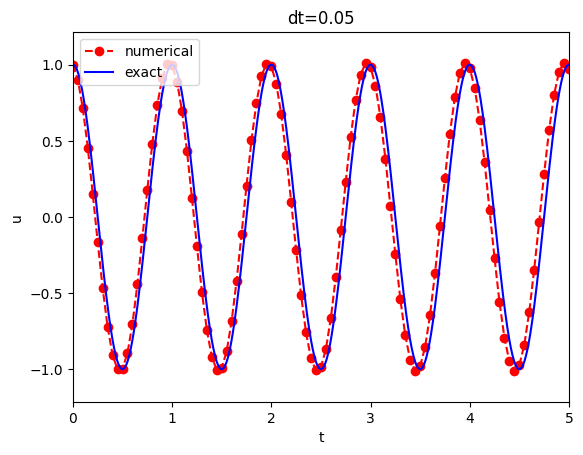

In [59]:
I = 1
w = 2*np.pi
dt = 0.05
num_periods = 5
P = 2*np.pi/w    #  one period
T = P*num_periods
u, v, t = solver(I, w, dt, T)

visualize(u, t, I, w)

### Verification

Since the Euler-Cromer scheme is equivalent to the finite difference
method for the second-order ODE $u^{\prime\prime}+\omega^2u=0$ (see the section [Equivalence with the scheme for the second-order ODE](#vib:model2x2:EulerCromer:equiv)), the performance of the above
`solver` function is the same as for the `solver` function in the section [Implementation](#vib:impl1). The only difference is the formula for the first time
step, as discussed above.  This deviation in the Euler-Cromer scheme
means that the discrete solution listed in the section [Exact discrete solution](#vib:ode1:analysis:sol) is not a solution of the Euler-Cromer
scheme!

To verify the implementation of the Euler-Cromer method we can adjust
`v[1]` so that the computer-generated values can be compared with the
formula ([20](#vib:ode1:un:exact)) from in the section [Exact discrete solution](#vib:ode1:analysis:sol). This adjustment is done in an alternative
solver function, `solver_ic_fix` in [`vib_undamped_EulerCromer.py`](https://github.com/devitocodes/devito_book/blob/master/fdm-devito-notebooks/01_vib/src-vib/vib_undamped_EulerCromer.py). Since we now
have an exact solution of the discrete equations available, we can
write a test function `test_solver` for checking the equality of
computed values with the formula ([20](#vib:ode1:un:exact)):

In [60]:
# %load -s test_solver, src-vib/vib_undamped_EulerCromer.py
def test_solver():
    """
    Test solver with fixed initial condition against
    equivalent scheme for the 2nd-order ODE u'' + u = 0.
    """
    I = 1.2; w = 2.0; T = 5
    dt = 2/w  # longest possible time step
    u, v, t = solver_ic_fix(I, w, dt, T)
    from vib_undamped import solver as solver2  # 2nd-order ODE
    u2, t2 = solver2(I, w, dt, T)
    error = np.abs(u - u2).max()
    tol = 1E-14
    assert error < tol


Another function, `demo`, visualizes the difference between the
Euler-Cromer scheme and the scheme ([7](#vib:ode1:step4)) for the
second-oder ODE, arising from the mismatch in the first time level.


### Convergence rates

We may use the `convergence_rates` function in the file
[`vib_undamped.py`](https://github.com/devitocodes/devito_book/blob/master/fdm-devito-notebooks/01_vib/src-vib/vib_undamped.py) to investigate the convergence rate of the
Euler-Cromer method, see the `convergence_rate` function in the file
[`vib_undamped_EulerCromer.py`](https://github.com/devitocodes/devito_book/blob/master/fdm-devito-notebooks/01_vib/src-vib/vib_undamped_EulerCromer.py).  Since we could eliminate $v$ to get a
scheme for $u$ that is equivalent to the finite difference method for
the second-order equation in $u$, we would expect the convergence
rates to be the same, i.e., $r = 2$. However,
measuring the convergence rate of $u$ in the Euler-Cromer scheme shows
that $r = 1$ only!  Adjusting the initial condition
does not change the rate. Adjusting $\omega$, as outlined in the section [The error in the numerical frequency](#vib:ode1:analysis:numfreq), gives a 4th-order method there, while
there is no increase in the measured rate in the Euler-Cromer
scheme. It is obvious that the Euler-Cromer scheme is dramatically
much better than the two other first-order methods, Forward Euler and
Backward Euler, but this is not reflected in the convergence rate of
$u$.


<!-- is anything really gained? is v of higher order compared -->
<!-- with differentiating u in the 2nd order ODE? most likely, -->
<!-- v is 2nd order, v from 2nd-order ODE is 1st order -->

## The Stoermer-Verlet algorithm
<div id="vib:model2x2:StormerVerlet"></div>

<!-- See velverlet_EulerCromer_....pdf for discussion and relation to EC -->


Another very popular algorithm for vibration problems, especially
for long time simulations, is the
Stoermer-Verlet
algorithm. It has become *the* method among physicists
for molecular simulations as well as particle and rigid body dynamics.

The method can be derived by applying the Euler-Cromer idea
twice, in a symmetric fashion, during the interval $[t_n,t_{n+1}]$:

1. solve $v^{\prime}=-\omega u$ by a Forward Euler step in $[t_n,t_{n+\frac{1}{2}}]$

2. solve $u^{\prime}=v$ by a Backward Euler step in $[t_n,t_{n+\frac{1}{2}}]$

3. solve $u^{\prime}=v$ by a Forward Euler step in $[t_{n+\frac{1}{2}}, t_{n+1}]$

4. solve $v^{\prime}=-\omega u$ by a Backward Euler step in $[t_{n+\frac{1}{2}}, t_{n+1}]$

With mathematics,

$$
\begin{align*}
\frac{v^{n+\frac{1}{2}}-v^n}{\frac{1}{2}\Delta t} &= -\omega^2 u^n,\\ 
\frac{u^{n+\frac{1}{2}}-u^n}{\frac{1}{2}\Delta t} &= v^{n+\frac{1}{2}},\\ 
\frac{u^{n+1}-u^{n+\frac{1}{2}}}{\frac{1}{2}\Delta t} &= v^{n+\frac{1}{2}},\\ 
\frac{v^{n+1}-v^{n+\frac{1}{2}}}{\frac{1}{2}\Delta t} &= -\omega^2 u^{n+1}\thinspace .
\end{align*}
$$

The two steps in the middle can be combined to

$$
\frac{u^{n+1}-u^{n}}{\Delta t} = v^{n+\frac{1}{2}},
$$

and consequently

<!-- Equation labels as ordinary links -->
<div id="_auto23"></div>

$$
\begin{equation}
v^{n+\frac{1}{2}} = v^n - \frac{1}{2}\Delta t \omega^2 u^n,
\label{_auto23} \tag{58}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto24"></div>

$$
\begin{equation}  
u^{n+1} = u^{n} + \Delta t v^{n+\frac{1}{2}},
\label{_auto24} \tag{59}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto25"></div>

$$
\begin{equation}  
v^{n+1} = v^{n+\frac{1}{2}} - \frac{1}{2}\Delta t \omega^2 u^{n+1}\thinspace .
\label{_auto25} \tag{60}
\end{equation}
$$

Writing the last equation as $v^n = v^{n-\frac{1}{2}} - \frac{1}{2}\Delta
t\omega^2 u^n$ and using this $v^n$ in the first equation gives
$v^{n+\frac{1}{2}} = v^{n-\frac{1}{2}} - \Delta t\omega^2 u^n$, and the scheme can
be written as two steps:

<!-- Equation labels as ordinary links -->
<div id="vib:model2x2:StormerVerlet:eqv"></div>

$$
\begin{equation}
v^{n+\frac{1}{2}} = v^{n-\frac{1}{2}} - \Delta t \omega^2 u^n,
\label{vib:model2x2:StormerVerlet:eqv} \tag{61}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="vib:model2x2:StormerVerlet:equ"></div>

$$
\begin{equation}  
u^{n+1} = u^{n} + \Delta t v^{n+\frac{1}{2}},
\label{vib:model2x2:StormerVerlet:equ} \tag{62}
\end{equation}
$$

which is nothing but straightforward centered differences for the
$2\times 2$ ODE system on a *staggered mesh*, see
the section [The Euler-Cromer scheme on a staggered mesh](#vib:model2x2:staggered). We have thus seen that
four different reasonings (discretizing $u^{\prime\prime}+\omega^2 u$
directly, using Euler-Cromer, using
Stoermer-Verlet,
and using centered differences for the $2\times 2$ system on a staggered
mesh) all end up with the same equations! The main difference is that
the traditional Euler-Cromer displays first-order convergence in $\Delta t$
(due to less symmetry in the way $u$ and $v$ are treated)
while the others are $\mathcal{O}{\Delta t^2}$ schemes.


The most numerically stable scheme, with respect to accumulation of
rounding errors, is
([61](#vib:model2x2:StormerVerlet:eqv))-([62](#vib:model2x2:StormerVerlet:equ)).
It has, according to [[Hairer_Wanner_Norsett_bookI]](#Hairer_Wanner_Norsett_bookI), better
properties in this regard than the direct scheme for the second-order
ODE.



# Staggered mesh

A more intuitive discretization than the Euler-Cromer method, yet
equivalent, employs solely centered differences in a natural way
for the $2\times 2$ first-order ODE system.
The scheme is in fact fully equivalent to the second-order scheme for
$u''+\omega u=0$, also for the first time step.
Such a scheme needs to operate on a *staggered mesh* in time.
Staggered meshes are very popular in many physical application, maybe foremost
fluid dynamics and electromagnetics, so the topic is important to learn.


## The Euler-Cromer scheme on a staggered mesh
<div id="vib:model2x2:staggered"></div>


In a staggered mesh, the unknowns are sought at different points in
the mesh. Specifically, $u$ is sought at
integer time points $t_n$ and $v$ is sought at $t_{n+1/2}$
*between* two $u$ points.
The unknowns are then $u^1, v^{3/2}, u^2, v^{5/2}$, and so on.
We typically use the notation
$u^n$ and $v^{n+\frac{1}{2}}$ for the two unknown mesh functions.
[Figure](#staggered:EC:fig1) presents a graphical sketch of two
mesh functions $u$ and $v$ on a staggered mesh.

<!-- dom:FIGURE: [fig-vib/staggered_time.png, width=500 frac=0.8] Examples on mesh functions on a staggered mesh in time. <div id="staggered:EC:fig1"></div> -->
<!-- begin figure -->
<div id="staggered:EC:fig1"></div>

<p>Examples on mesh functions on a staggered mesh in time.</p>
<img src="fig-vib/staggered_time.png" width=500>

<!-- end figure -->



On a staggered mesh it is natural to
use centered difference approximations, expressed
in operator notation as

<!-- Equation labels as ordinary links -->
<div id="_auto26"></div>

$$
\begin{equation}
\lbrack D_t u = v\rbrack^{n+\frac{1}{2}},
\label{_auto26} \tag{63}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto27"></div>

$$
\begin{equation}  
\lbrack D_t v = -\omega^2 u\rbrack^{n+1}
\thinspace .
\label{_auto27} \tag{64}
\end{equation}
$$

or if we switch the sequence of the equations:

<!-- Equation labels as ordinary links -->
<div id="_auto28"></div>

$$
\begin{equation}
\lbrack D_t v = -\omega^2 u\rbrack^{n},
\label{_auto28} \tag{65}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto29"></div>

$$
\begin{equation}  
\lbrack D_t u = v\rbrack^{n+\frac{1}{2}}
\thinspace .
\label{_auto29} \tag{66}
\end{equation}
$$

Writing out the formulas gives

<!-- Equation labels as ordinary links -->
<div id="vib:model2x2:EulerCromer:veq1s2"></div>

$$
\begin{equation}
v^{n+\frac{1}{2}} = v^{n-\frac{1}{2}} -\Delta t \omega^2u^{n}
\label{vib:model2x2:EulerCromer:veq1s2} \tag{67},
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="vib:model2x2:EulerCromer:ueq1s2"></div>

$$
\begin{equation}  
u^{n+1} = u^{n} + \Delta t v^{n+\frac{1}{2}}
\label{vib:model2x2:EulerCromer:ueq1s2} \tag{68}
\thinspace .
\end{equation}
$$

<!-- We shall use the names -->
<!-- *forward-backward Euler-Cromer* and *staggered Euler-Cromer* -->
<!-- to distinguish the two schemes. -->

We can eliminate the $v$
values and get back the centered scheme based on the second-order
differential equation $u^{\prime\prime} +\omega^2 u = 0$,
so all these three schemes are equivalent.
However, they differ somewhat in the treatment of the initial
conditions.

Suppose we have $u(0)=I$ and $u'(0)=v(0)=0$ as mathematical
initial conditions. This means $u^0=I$ and

$$
v(0)\approx \frac{1}{2}(v^{-\frac{1}{2}} + v^{\frac{1}{2}}) = 0,
\quad\Rightarrow\quad v^{-\frac{1}{2}} =- v^\frac{1}{2}\thinspace .
$$

Using the discretized equation ([67](#vib:model2x2:EulerCromer:veq1s2)) for
$n=0$ yields

$$
v^\frac{1}{2} = v^{-\frac{1}{2}} -\Delta t\omega^2 I,
$$

and eliminating $v^{-\frac{1}{2}} =- v^{\frac{1}{2}}$
results in

$$
v^\frac{1}{2} = -\frac{1}{2}\Delta t\omega^2I,
$$

and

$$
u^1 = u^0 - \frac{1}{2}\Delta t^2\omega^2 I,
$$

which is exactly the same equation for $u^1$ as we had in the
centered scheme based on the second-order differential equation
(and hence corresponds to a centered difference approximation of
the initial condition for $u'(0)$).
The conclusion is that a staggered mesh is fully equivalent with
that scheme, while the forward-backward version gives a slight
deviation in the computation of $u^1$.

We can redo the derivation of the initial conditions when $u'(0)=V$:

$$
v(0)\approx \frac{1}{2}(v^{-\frac{1}{2}} + v^{\frac{1}{2}}) = V,
\quad\Rightarrow\quad v^{-\frac{1}{2}} = 2V - v^\frac{1}{2}\thinspace .
$$

Using this $v^{-\frac{1}{2}}$ in

$$
v^\frac{1}{2} = v^{-\frac{1}{2}} -\Delta t\omega^2 I,
$$

then gives $v^\frac{1}{2} = V - \frac{1}{2}\Delta t\omega^2 I$.
The general initial conditions are therefore

<!-- Equation labels as ordinary links -->
<div id="vib:ode2:staggered:u0"></div>

$$
\begin{equation}
u^0 = I,
\label{vib:ode2:staggered:u0} \tag{69}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="vib:ode2:staggered:v0"></div>

$$
\begin{equation}  
v^\frac{1}{2} = V - \frac{1}{2}\Delta t\omega^2I
\label{vib:ode2:staggered:v0} \tag{70}\thinspace .
\end{equation}
$$

## Implementation of the scheme on a staggered mesh

The algorithm goes like this:

1. Set the initial values ([69](#vib:ode2:staggered:u0)) and
   ([70](#vib:ode2:staggered:v0)).

2. For $n=1,2,\ldots$:

a. Compute $u^{n}$ from ([68](#vib:model2x2:EulerCromer:ueq1s2)).

b. Compute $v^{n+\frac{1}{2}}$ from ([67](#vib:model2x2:EulerCromer:veq1s2)).


### Implementation with integer indices

Translating the schemes ([68](#vib:model2x2:EulerCromer:ueq1s2))
and ([67](#vib:model2x2:EulerCromer:veq1s2)) to computer code
faces the problem of how to store and access $v^{n+\frac{1}{2}}$,
since arrays only allow integer indices with base 0.
We must then introduce a convention: $v^{1+\frac{1}{2}}$ is stored
in `v[n]` while $v^{1-\frac{1}{2}}$ is stored in `v[n-1]`.
We can then write the algorithm in Python as

In [64]:
# %load -s solver_v1, src-vib/vib_undamped_staggered.py
def solver_v1(I, w, dt, T):
    """
    Solve u'=v, v' = - w**2*u for t in (0,T], u(0)=I and v(0)=0,
    by a central finite difference method with time step dt.
    """
    dt = float(dt)
    Nt = int(round(T/dt))
    
    t = Dimension('t', spacing=Constant('h_t'))
    u = TimeFunction(name='u', dimensions=(t,), shape=(Nt+1,), space_order=2)
    v = TimeFunction(name='v', dimensions=(t,), shape=(Nt+1,), space_order=2)

    u.data[:] = I
    v.data[:] = 0 - 0.5*dt*w**2*u.data[:]
    
    eq_u = Eq(u.dt, v)
    eq_v = Eq(v.dt, -(w**2)*u.forward)
    
    stencil_u = solve(eq_u.evaluate, u.forward)
    stencil_v = solve(eq_v.evaluate, v.forward)
    
    update_u = Eq(u.forward, stencil_u)
    update_v = Eq(v.forward, stencil_v)
    
    op = Operator([update_u, update_v])
    op.apply(h_t=dt, t_M=Nt-1)

    t_mesh = np.linspace(0, Nt*dt, Nt+1)    # mesh for u
    t_v_mesh = (t_mesh + dt/2)[:-1]         # mesh for v

    return u.data, t_mesh, v.data, t_v_mesh


Note that $u$ and $v$ are returned together with the mesh points such
that the complete mesh function for $u$ is described by `u` and `t_mesh`,
while `v` and `t_v_mesh` represent the mesh function for $v$.

Once again, we can compare with the exact solution using the `visualize` function:

Operator `Kernel` ran in 0.01 s


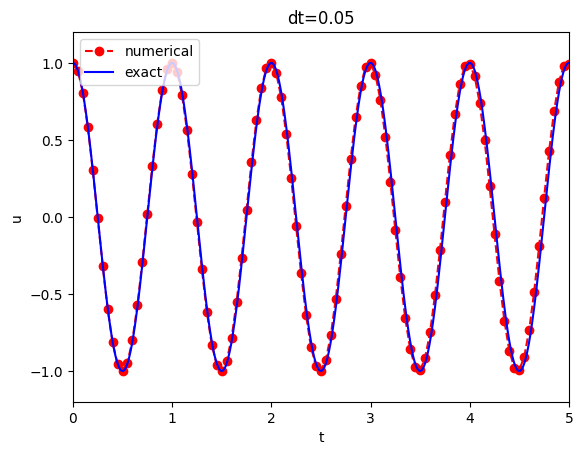

In [65]:
I = 1
w = 2*np.pi
dt = 0.05
num_periods = 5
P = 2*np.pi/w    #  one period
T = P*num_periods
u, t, v, t_v = solver_v1(I, w, dt, T)

visualize(u, t, I, w)

Verification of this code is easy as we can just compare the computed
`u` with the `u` produced by the `solver` function in
`vib_undamped.py` (which solves $u''+\omega^2u=0$ directly).  The
values should coincide to machine precision since the two numerical
methods are mathematically equivalent.  We refer to the file
[`vib_undamped_staggered.py`](https://github.com/devitocodes/devito_book/blob/master/fdm-devito-notebooks/01_vib/src-vib/vib_undamped_staggered.py)
for the details of a unit test (`test_staggered`) that checks this property.

# Exercises and Problems




<!-- --- begin exercise --- -->

## Problem 1: Use linear/quadratic functions for verification
<div id="vib:exer:undamped:verify:linquad"></div>

Consider the ODE problem

$$
u^{\prime\prime} + \omega^2u=f(t), \quad u(0)=I,\ u^{\prime}(0)=V,\ t\in(0,T]\thinspace .
$$

**a)**
Discretize this equation according to $[D_tD_t u + \omega^2 u = f]^n$ and
derive the equation for the first time step ($u^1$).


<!-- --- begin solution of exercise --- -->
**Solution.**
For the requested discretization, we get

$$
\frac{u^{n+1} - 2u^n + u^{n-1}}{\Delta t^2} + \omega^2u^n = f^n\thinspace .
$$

To derive the equation for $u^1$, we first find the expression for $u^{n+1}$ from the
discretized form of the equation. Isolating $u^{n+1}$, we get

$$
u^{n+1} = \left(2 - (\Delta t\omega)^2\right)u^n - u^{n-1} + \Delta t^2 f^n\thinspace .
$$

With $n = 0$, this expression gives

$$
u^1 = \left(2 - (\Delta t\omega)^2\right)u^0 - u^{-1} + \Delta t^2 f^n\thinspace .
$$

Here, however, we get a problem with $u^{-1}$, which appears on the right hand side.
To get around that problem, we realize that the initial condition $u^{\prime} = V$ might
be approximated by use of a centered difference approximation as

$$
\frac{u^1 - u^{-1}}{2\Delta t} = V,
$$

which means that

$$
u^{-1} = u^1 - 2\Delta t V\thinspace .
$$

Inserting this expression for $u^{-1}$ into the expression for $u^1$, we get

$$
u^1 = \left(2 - (\Delta t\omega)^2\right)u^0 - (u^1 - 2\Delta t V) + \Delta t^2 f^n\thinspace .
$$

Finally, after isolating $u^1$ on the left hand side, we arrive at
\[ u^1 = \left(1 - \frac{1}{2}(\Delta t\omega)^2\right)u^0 + \Delta t V + \frac{1}{2}\Delta t^2 f^n\thinspace .\]

<!-- --- end solution of exercise --- -->

**b)**
For verification purposes, we use the method of manufactured solutions (MMS) with the
choice of $\uex(t)= ct+d$. Find restrictions on $c$ and $d$ from
the initial conditions. Compute the corresponding source term $f$.
Show that $[D_tD_t t]^n=0$ and use the fact
that the $D_tD_t$ operator is linear,
$[D_tD_t (ct+d)]^n = c[D_tD_t t]^n + [D_tD_t d]^n = 0$, to show that
$\uex$ is also a perfect solution of the discrete equations.


<!-- --- begin solution of exercise --- -->
**Solution.**
The initial conditions $u(0)=I$ and $u^{\prime}(0)=V$ give demands
$\uex(0)=I$ and $\uex^{\prime}(0)=V$, which imply that
$d = I$ and {c = V}.

To compute the source term $f$, we insert the chosen solution $\uex$ into
the ODE. This gives

$$
0 + \omega^2(ct+d)=f(t),
$$

which implies that

$$
f(t)=\omega^2(Vt+I)\thinspace .
$$

To show that $[D_tD_t t]^n=0$, we proceed as

$$
[D_tD_t t]^n = \frac{t^{n+1} - 2t^n + t^{n-1}}{\Delta t^2}, \nonumber
$$

$$
= \frac{(n+1)\Delta t - 2n\Delta t + (n-1)\Delta t}{\Delta t^2}, \nonumber
$$

$$
= \frac{n\Delta t + \Delta t - 2n\Delta t + n\Delta t - \Delta t}{\Delta t^2}, \nonumber
$$

$$
= 0\thinspace . \nonumber
$$

Finally, we show that the chosen $\uex$ is also a perfect solution of the discrete equations.
If we start by inserting $\uex$ into

$$
[D_tD_t u + \omega^2u = f]^n,
$$

as well as the expression found for $f$.
We get

$$
[D_tD_t (Vt+I) + \omega^2(Vt+I) = \omega^2(Vt+I)]^n,
$$

which can be rewritten as

$$
[D_tD_t (Vt+I)]^n + [\omega^2(Vt+I)]^n = [\omega^2(Vt+I)]^n\thinspace .
$$

Now, since the first term here is zero, we see that the discrete equation is
fulfilled exactly for the chosen $\uex$ function.

<!-- --- end solution of exercise --- -->

**c)**
Use `sympy` to do the symbolic calculations above. Here is a
sketch of the program `vib_undamped_verify_mms.py`:

In [63]:
# NBVAL_SKIP
import sympy as sym
V, t, I, w, dt = sym.symbols('V t I w dt')  # global symbols
f = None  # global variable for the source term in the ODE

def ode_source_term(u):
    """Return the terms in the ODE that the source term
    must balance, here u'' + w**2*u.
    u is symbolic Python function of t."""
    return sym.diff(u(t), t, t) + w**2*u(t)

def residual_discrete_eq(u):
    """Return the residual of the discrete eq. with u inserted."""
    R = ...
    return sym.simplify(R)

def residual_discrete_eq_step1(u):
    """Return the residual of the discrete eq. at the first
    step with u inserted."""
    R = ...
    return sym.simplify(R)

def DtDt(u, dt):
    """Return 2nd-order finite difference for u_tt.
    u is a symbolic Python function of t.
    """
    return ...

def main(u):
    """
    Given some chosen solution u (as a function of t, implemented
    as a Python function), use the method of manufactured solutions
    to compute the source term f, and check if u also solves
    the discrete equations.
    """
    print '=== Testing exact solution: %s ===' % u
    print "Initial conditions u(0)=%s, u'(0)=%s:" % \
          (u(t).subs(t, 0), sym.diff(u(t), t).subs(t, 0))

    # Method of manufactured solution requires fitting f
    global f  # source term in the ODE
    f = sym.simplify(ode_lhs(u))

    # Residual in discrete equations (should be 0)
    print 'residual step1:', residual_discrete_eq_step1(u)
    print 'residual:', residual_discrete_eq(u)

def linear():
    main(lambda t: V*t + I)

if __name__ == '__main__':
    linear()

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)? (2487501958.py, line 36)

Fill in the various functions such that the calls in the `main`
function works.


<!-- --- begin solution of exercise --- -->
**Solution.**
This part of the code goes as follows:

In [ ]:
# NBVAL_SKIP
import sympy as sym
import numpy as np

V, t, I, w, dt = sym.symbols('V t I w dt')  # global symbols
f = None  # global variable for the source term in the ODE

def ode_source_term(u):
    """Return the terms in the ODE that the source term
    must balance, here u'' + w**2*u.
    u is symbolic Python function of t."""
    return sym.diff(u(t), t, t) + w**2*u(t)

def residual_discrete_eq(u):
    """Return the residual of the discrete eq. with u inserted."""
    R = DtDt(u, dt) + w**2*u(t) - f
    return sym.simplify(R)

def residual_discrete_eq_step1(u):
    """Return the residual of the discrete eq. at the first
    step with u inserted."""
    half = sym.Rational(1,2)
    R = u(t+dt) - I - dt*V - \
        half*dt**2*f.subs(t, 0) + half*dt**2*w**2*I
    R = R.subs(t, 0)  # t=0 in the rhs of the first step eq.
    return sym.simplify(R)

def DtDt(u, dt):
    """Return 2nd-order finite difference for u_tt.
    u is a symbolic Python function of t.
    """
    return (u(t+dt) - 2*u(t) + u(t-dt))/dt**2

# def main(u):
#     """
#     Given some chosen solution u (as a function of t, implemented
#     as a Python function), use the method of manufactured solutions
#     to compute the source term f, and check if u also solves
#     the discrete equations.
#     """
#     print '=== Testing exact solution: %s ===' % u(t)
#     print "Initial conditions u(0)=%s, u'(0)=%s:" % \
#           (u(t).subs(t, 0), sym.diff(u(t), t).subs(t, 0))

#     # Method of manufactured solution requires fitting f
#     global f  # source term in the ODE
#     f = sym.simplify(ode_source_term(u))

#     # Residual in discrete equations (should be 0)
#     print 'residual step1:', residual_discrete_eq_step1(u)
#     print 'residual:', residual_discrete_eq(u)

<!-- --- end solution of exercise --- -->

**d)**
The purpose now is to choose a quadratic function
$\uex = bt^2 + ct + d$ as exact solution. Extend the `sympy`
code above with a function `quadratic` for fitting `f` and checking
if the discrete equations are fulfilled. (The function is very similar
to `linear`.)

<!-- Check with hand calculations that the `sympy` implementation -->
<!-- is correct. -->


<!-- --- begin solution of exercise --- -->
**Solution.**
Yes, a quadratic function will fulfill the discrete equations exactly.
The implementation becomes

In [ ]:
# NBVAL_SKIP
def quadratic():
    """Test quadratic function q*t**2 + V*t + I."""
    q = sym.Symbol('q')  # arbitrary constant in t**2 term
    u_e = lambda t: q*t**2 + V*t + I
    main(u_e)

Calling `quadratic()` shows that the residual vanishes, and the quadratic
function is an exact solution of the discrete equations.

<!-- --- end solution of exercise --- -->

**e)**
Will a polynomial of degree three fulfill the discrete equations?


<!-- --- begin solution of exercise --- -->
**Solution.**
We can easily make a test:

In [ ]:
# NBVAL_SKIP
def cubic():
    r, q = sym.symbols('r q')
    main(lambda t: r*t**3 + q*t**2 + V*t + I)

When running the final code presented below, the printout shows that the
step1 residual for the cubic function is not zero.

<!-- --- end solution of exercise --- -->

**f)**
Implement a `solver` function for computing the numerical
solution of this problem.


<!-- --- begin solution of exercise --- -->
**Solution.**
The `solver` function may take the form

In [ ]:
# NBVAL_SKIP
def solver(I, V, f, w, dt, T):
    """
    Solve u'' + w**2*u = f for t in (0,T], u(0)=I and u'(0)=V,
    by a central finite difference method with time step dt.
    f(t) is a callable Python function.
    """
    dt = float(dt)
    Nt = int(round(T/dt))
    u = np.zeros(Nt+1)
    t = np.linspace(0, Nt*dt, Nt+1)

    u[0] = I
    u[1] = u[0] - 0.5*dt**2*w**2*u[0] + 0.5*dt**2*f(0) + dt*V
    print(type(u[1]))
    for n in range(1, Nt):
        u[n+1] = 2*u[n] - u[n-1] - dt**2*w**2*u[n] + dt**2*f(t[n])
        print(n)
    return u, t

We can verify the implementation by the following test function:

In [ ]:
# NBVAL_SKIP
def test_quadratic_exact_solution():
    """Verify solver function via quadratic solution."""
    # Transform global symbolic variables to functions and numbers
    # for numerical computations
    global p, V, I, w
    p, V, I, w = 2.3, 0.9, 1.2, 1.5
    global f, t
    u_e = lambda t: p*t**2 + V*t + I # use p, V, I, w as numbers
    f = ode_source_term(u_e)         # fit source term
    f = sym.lambdify(t, f)           # make function numerical

    dt = 2./w
    u, t = solver(I=I, V=V, f=f, w=w, dt=dt, T=3)
    print(u)
    u_e = u_e(t)
    print(u_e)
    error = np.abs(u - u_e).max()
    tol = 1E-12
    assert error < tol
    #print 'Error in computing a quadratic solution:', error

test_quadratic_exact_solution()

<!-- --- end solution of exercise --- -->


**g)**
Write a test function for checking that the quadratic solution
is computed correctly (to machine precision, but the
round-off errors accumulate and increase with $T$) by the `solver`
function.


<!-- --- begin solution of exercise --- -->
**Solution.**
Here is the complete code for this exercise:

In [ ]:
# NBVAL_SKIP
import sympy as sym
import numpy as np

V, t, I, w, dt = sym.symbols('V t I w dt')  # global symbols
f = None  # global variable for the source term in the ODE

def ode_source_term(u):
    """Return the terms in the ODE that the source term
    must balance, here u'' + w**2*u.
    u is symbolic Python function of t."""
    return sym.diff(u(t), t, t) + w**2*u(t)

def residual_discrete_eq(u):
    """Return the residual of the discrete eq. with u inserted."""
    R = DtDt(u, dt) + w**2*u(t) - f
    return sym.simplify(R)

def residual_discrete_eq_step1(u):
    """Return the residual of the discrete eq. at the first
    step with u inserted."""
    half = sym.Rational(1,2)
    R = u(t+dt) - I - dt*V - \
        half*dt**2*f.subs(t, 0) + half*dt**2*w**2*I
    R = R.subs(t, 0)  # t=0 in the rhs of the first step eq.
    return sym.simplify(R)

def DtDt(u, dt):
    """Return 2nd-order finite difference for u_tt.
    u is a symbolic Python function of t.
    """
    return (u(t+dt) - 2*u(t) + u(t-dt))/dt**2

def main(u):
    """
    Given some chosen solution u (as a function of t, implemented
    as a Python function), use the method of manufactured solutions
    to compute the source term f, and check if u also solves
    the discrete equations.
    """
    print '=== Testing exact solution: %s ===' % u(t)
    print "Initial conditions u(0)=%s, u'(0)=%s:" % \
          (u(t).subs(t, 0), sym.diff(u(t), t).subs(t, 0))

    # Method of manufactured solution requires fitting f
    global f  # source term in the ODE
    f = sym.simplify(ode_source_term(u))

    # Residual in discrete equations (should be 0)
    print 'residual step1:', residual_discrete_eq_step1(u)
    print 'residual:', residual_discrete_eq(u)


def linear():
    """Test linear function V*t+I: u(0)=I, u'(0)=V."""
    main(lambda t: V*t + I)

def quadratic():
    """Test quadratic function q*t**2 + V*t + I."""
    q = sym.Symbol('q')  # arbitrary constant in t**2 term
    u_e = lambda t: q*t**2 + V*t + I
    main(u_e)

def cubic():
    r, q = sym.symbols('r q')
    main(lambda t: r*t**3 + q*t**2 + V*t + I)

def solver(I, V, f, w, dt, T):
    """
    Solve u'' + w**2*u = f for t in (0,T], u(0)=I and u'(0)=V,
    by a central finite difference method with time step dt.
    f(t) is a callable Python function.
    """
    dt = float(dt)
    Nt = int(round(T/dt))
    u = np.zeros(Nt+1)
    t = np.linspace(0, Nt*dt, Nt+1)

    u[0] = I
    u[1] = u[0] - 0.5*dt**2*w**2*u[0] + 0.5*dt**2*f(t[0]) + dt*V
    for n in range(1, Nt):
        u[n+1] = 2*u[n] - u[n-1] - dt**2*w**2*u[n] + dt**2*f(t[n])
    return u, t

def test_quadratic_exact_solution():
    """Verify solver function via quadratic solution."""
    # Transform global symbolic variables to functions and numbers
    # for numerical computations
    global p, V, I, w
    p, V, I, w = 2.3, 0.9, 1.2, 1.5
    global f, t
    u_e = lambda t: p*t**2 + V*t + I # use p, V, I, w as numbers
    f = ode_source_term(u_e)         # fit source term
    f = sym.lambdify(t, f)           # make function numerical

    dt = 2./w
    u, t = solver(I=I, V=V, f=f, w=w, dt=dt, T=3)
    u_e = u_e(t)
    error = np.abs(u - u_e).max()
    tol = 1E-12
    assert error < tol
    print 'Error in computing a quadratic solution:', error

if __name__ == '__main__':
    linear()
    quadratic()
    cubic()
    test_quadratic_exact_solution()

<!-- --- end solution of exercise --- -->

Filename: `vib_undamped_verify_mms`.

<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

## Exercise 2: Show linear growth of the phase with time
<div id="vib:exer:phase:err:growth"></div>

Consider an exact solution $I\cos (\omega t)$ and an
approximation $I\cos(\tilde\omega t)$.
Define the phase error as the time lag between the peak $I$
in the exact solution and the corresponding peak in the approximation
after $m$ periods of oscillations. Show that this phase error
is linear in $m$.


<!-- --- begin solution of exercise --- -->
**Solution.**
From ([19](#vib:ode1:tildeomega:series)) we have that

$$
\tilde\omega = \omega\left( 1 + \frac{1}{24}\omega^2\Delta t^2\right)
+ \mathcal{O}{\Delta t^4}
\thinspace .
\nonumber
$$

Dropping the $\mathcal{O}{\Delta t^4}$ term, and since $\omega=\frac{2\pi}{P}$ and $\tilde\omega=\frac{2\pi}{\tilde P}$, we have that

$$
\frac{2\pi}{\tilde P} \approx \frac{2\pi}{P}\left( 1 + \frac{1}{24}\omega^2\Delta t^2\right)
\thinspace .
\nonumber
$$

Now, $2\pi$ cancels and the remaining equation may be rewritten as

$$
P - \tilde P \approx \frac{1}{24}\omega^2\Delta t^2
\thinspace .
\nonumber
$$

This implies that the periods differ by a constant. Since the exact and the numerical
solution start out identically, the phase error $P - \tilde P$ will become
$m\frac{1}{24}\omega^2\Delta t^2$ after $m$ periods, i.e. the phase error is linear in $m$.

<!-- --- end solution of exercise --- -->
Filename: `vib_phase_error_growth`.

<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

## Exercise 3: Improve the accuracy by adjusting the frequency
<div id="vib:exer:w:adjust"></div>

According to ([19](#vib:ode1:tildeomega:series)), the numerical
frequency deviates from the exact frequency by a (dominating) amount
$\omega^3\Delta t^2/24 >0$. Replace the `w` parameter in the algorithm
in the `solver` function in `vib_undamped.py` by `w*(1 -
(1./24)*w**2*dt**2` and test how this adjustment in the numerical
algorithm improves the accuracy (use $\Delta t =0.1$ and simulate
for 80 periods, with and without adjustment of $\omega$).


<!-- --- begin solution of exercise --- -->
**Solution.**
We may take a copy of the `vib_undamped.py` file and edit the `solver`
function to

In [ ]:
# NBVAL_SKIP
from numpy import *
from matplotlib.pyplot import *

def solver(I, w, dt, T, adjust_w=True):
    """
    Solve u'' + w**2*u = 0 for t in (0,T], u(0)=I and u'(0)=0,
    by a central finite difference method with time step dt.
    """
    dt = float(dt)
    Nt = int(round(T/dt))
    u = zeros(Nt+1)
    t = linspace(0, Nt*dt, Nt+1)
    if adjust_w:
        w = w*(1 - 1./24*w**2*dt**2)

    u[0] = I
    u[1] = u[0] - 0.5*dt**2*w**2*u[0]
    for n in range(1, Nt):
        u[n+1] = 2*u[n] - u[n-1] - dt**2*w**2*u[n]
    return u, t

The modified code was run for 80 periods with, and without,
the given adjustment of $\omega$. A substantial difference in accuracy
was observed between the two,
showing that the frequency adjustment improves the situation.

<!-- --- end solution of exercise --- -->
Filename: `vib_adjust_w`.


<!-- How does this go if -->
<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

## Exercise 4: See if adaptive methods improve the phase error
<div id="vib:exer:undamped:adaptive"></div>

Adaptive methods for solving ODEs aim at adjusting $\Delta t$ such
that the error is within a user-prescribed tolerance. Implement the
equation $u^{\prime\prime}+u=0$ in the [Odespy](https://github.com/hplgit/odespy)
software. Use the example from Section 3.2.11 in [[Langtangen_decay]](#Langtangen_decay).  
Run the scheme with a very low
tolerance (say $10^{-14}$) and for a long time, check the number of
time points in the solver's mesh (`len(solver.t_all)`), and compare
the phase error with that produced by the simple finite difference
method from the section [A centered finite difference scheme](#vib:ode1:fdm) with the same number of (equally
spaced) mesh points. The question is whether it pays off to use an
adaptive solver or if equally many points with a simple method gives
about the same accuracy.


<!-- --- begin solution of exercise --- -->
**Solution.**
Here is a code where we define the test problem, solve it by the
Dormand-Prince adaptive method from Odespy, and then call `solver`

```python
import odespy
import numpy as np
import sys
#import matplotlib.pyplot as plt
import scitools.std as plt

def f(s, t):
    u, v = s
    return np.array([v, -u])

def u_exact(t):
    return I*np.cos(w*t)

I = 1; V = 0; u0 = np.array([I, V])
w  = 1; T = 50
tol = float(sys.argv[1])
solver = odespy.DormandPrince(f, atol=tol, rtol=0.1*tol)

Nt = 1 # just one step - let scheme find its intermediate points
t_mesh = np.linspace(0, T, Nt+1)
t_fine = np.linspace(0, T, 10001)

solver.set_initial_condition(u0)
u, t = solver.solve(t_mesh)

# u and t will only consist of [I, u^Nt] and [0,T], i.e. 2 values
# each, while solver.u_all and solver.t_all contain all computed
# points. solver.u_all is a list with arrays, one array (with 2
# values) for each point in time.
u_adaptive = np.array(solver.u_all)

# For comparison, we solve also with simple FDM method
import sys, os
sys.path.insert(0, os.path.join(os.pardir, 'src-vib'))
from vib_undamped import solver as simple_solver
Nt_simple = len(solver.t_all)
dt = float(T)/Nt_simple
u_simple, t_simple = simple_solver(I, w, dt, T)

# Compare in plot: adaptive, constant dt, exact
plt.plot(solver.t_all, u_adaptive[:,0], 'k-')
plt.hold('on')
plt.plot(t_simple, u_simple, 'r--')
plt.plot(t_fine, u_exact(t_fine), 'b-')
plt.legend(['tol=%.0E' % tol, 'u simple', 'exact'])
plt.savefig('tmp_odespy_adaptive.png')
plt.savefig('tmp_odespy_adaptive.pdf')
plt.show()
raw_input()
```

The program may produce the plots seen in
the figure below,
which shows how the adaptive solution clearly outhinspace .erforms the simpler method,
regardless of the accuracy level.

<!-- dom:FIGURE: [fig-vib/vib_undamped_adaptive.png, width=800 frac=1.0] -->
<!-- begin figure -->

<p></p>
<img src="fig-vib/vib_undamped_adaptive.png" width=800>

<!-- end figure -->


<!-- --- end solution of exercise --- -->
Filename: `vib_undamped_adaptive`.

<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

## Exercise 5: Use a Taylor polynomial to compute $u^1$
<div id="vib:exer:step4b:alt"></div>

As an alternative to computing $u^1$ by ([8](#vib:ode1:step4b)),
one can use a Taylor polynomial with three terms:

$$
u(t_1) \approx u(0) + u^{\prime}(0)\Delta t + {\frac{1}{2}}u^{\prime\prime}(0)\Delta t^2
$$

With $u^{\prime\prime}=-\omega^2 u$ and $u^{\prime}(0)=0$, show that this method also leads to
([8](#vib:ode1:step4b)). Generalize the condition on $u^{\prime}(0)$ to
be $u^{\prime}(0)=V$ and compute $u^1$ in this case with both methods.


<!-- --- begin solution of exercise --- -->
**Solution.**
With $u^{\prime\prime}(0)=-\omega^2 u(0)$ and $u^{\prime}(0)=0$, the given Taylor series
becomes

$$
u(t_1) \approx u(0) + {\frac{1}{2}}(-\omega^2 u(0))\Delta t^2
$$

which may be written as

$$
u^1 \approx u^0 - {\frac{1}{2}}\Delta t^2\omega^2 u^0
$$

but this is nothing but ([8](#vib:ode1:step4b)).

Now, consider $u^{\prime}(0)=V$.
With a centered difference approximation, this initial condition becomes

$$
\frac{u^1 - u^{-1}}{2\Delta t} \approx V
$$

which implies that

$$
u^{-1} \approx u^1 - 2\Delta t V
$$

When $n=0$, ([7](#vib:ode1:step4)) reads

$$
u^1 = 2u^0 - u^{-1} - \Delta t^2\omega^2 u^0
$$

Inserting the expression for $u^{-1}$, we get

$$
u^1 = 2u^0 - (u^1 - 2\Delta t V) - \Delta t^2\omega^2 u^0
$$

which implies that

$$
u^1 = u^0 + \Delta t V - \frac{1}{2}\Delta t^2\omega^2 u^0
$$

With the Taylor series approach, we now get

$$
u(t_1) \approx u(0) + V\Delta t + {\frac{1}{2}}(-\omega^2 u(0))\Delta t^2
$$

which also gives

$$
u^1 = u^0 + \Delta t V - \frac{1}{2}\Delta t^2\omega^2 u^0
$$

<!-- --- end solution of exercise --- -->
Filename: `vib_first_step`.

<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

## Problem 6: Derive and investigate the velocity Verlet method

The velocity Verlet method for $u^{\prime\prime} + \omega^2u=0$ is
based on the following ideas:

1. step $u$ forward from $t_n$ to $t_{n+1}$ using a three-term Taylor
   series,

2. replace $u^{\prime\prime}$ by $-\omega^2u$

3. discretize $v^{\prime}=-\omega^2u$ by a Crank-Nicolson method.

Derive the scheme, implement it, and determine empirically the convergence rate.


<!-- --- begin solution of exercise --- -->
**Solution.**
Stepping $u$ forward from $t_n$ to $t_{n+1}$ using a three-term Taylor
series gives

$$
u(t_{n+1}) = u(t_n) + u^{\prime}(t_n)\Delta t + \frac{1}{2}u^{\prime\prime}(t_n)\Delta t^2\thinspace .
$$

Using $u^{\prime}=v$ and $u^{\prime\prime}=-\omega^2u$, we get the updating formula

$$
u^{n+1} = u^n + v^n\Delta t - \frac{1}{2}\Delta t^2\omega^2u^n\thinspace .
$$

Second, the first-order equation for $v$,

$$
v^{\prime}=-\omega^2u,
$$

is discretized by a centered difference in a Crank-Nicolson fashion at
$t_{n+\frac{1}{2}}$:

$$
\frac{v^{n+1}-v^n}{\Delta t} = -\omega^2\frac{1}{2}(u^n + u^{n+1})\thinspace .
$$

To summarize, we have the scheme

<!-- Equation labels as ordinary links -->
<div id="_auto30"></div>

$$
\begin{equation}
u^{n+1} = u^n + v^n\Delta t - \frac{1}{2}\Delta t^2\omega^2u^n,
\label{_auto30} \tag{71}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto31"></div>

$$
\begin{equation}  
v^{n+1} = v^n -\frac{1}{2}\Delta t\omega^2 (u^n + u^{n+1}),
\label{_auto31} \tag{72}
\end{equation}
$$

known as the velocity Verlet algorithm.
Observe that this scheme is explicit since $u^{n+1}$ in the second
equation is already computed by the first equation.

The algorithm can be straightforwardly implemented as shown below:

In [ ]:
# NBVAL_SKIP
from vib_undamped import convergence_rates, main

def solver(I, w, dt, T, return_v=False):
    """
    Solve u'=v, v'=-w**2*u for t in (0,T], u(0)=I and v(0)=0,
    by the velocity Verlet method with time step dt.
    """
    dt = float(dt)
    Nt = int(round(T/dt))
    u = np.zeros(Nt+1)
    v = np.zeros(Nt+1)
    t = np.linspace(0, Nt*dt, Nt+1)

    u[0] = I
    v[0] = 0
    for n in range(Nt):
        u[n+1] = u[n] + v[n]*dt - 0.5*dt**2*w**2*u[n]
        v[n+1] = v[n] - 0.5*dt*w**2*(u[n] + u[n+1])
    if return_v:
        return u, v, t
    else:
        # Return just u and t as in the vib_undamped.py's solver
        return u, t

We provide the option that this `solver` function returns the same data
as the `solver` function from the section [Making a solver function](#vib:impl1:solver) (if `return_v`
is `False`), but alternatively, it may return `v` along with `u` and `t`.

The error in the Taylor series expansion behind the first equation
is $\mathcal{O}{\Delta t^3}$, while the error
in the central difference for $v$ is $\mathcal{O}{\Delta t^2}$.  The overall
error is then no better than $\mathcal{O}{\Delta t^2}$, which can be verified
empirically using the `convergence_rates` function from
the section [Verification](#vib:ode1:verify):

In [ ]:
# NBVAL_SKIP
import vib_undamped_velocity_Verlet as m
m.convergence_rates(4, solver_function=m.solver)

The output confirms that the overall convergence rate is 2.

<!-- --- end solution of exercise --- -->


<!-- How can the scheme be extended to the general case $mu^{\prime\prime} -->
<!-- + f(u^{\prime}) + s(u) =F(t)$? No, that's too complicated because of -->
<!-- the substitution in the Taylor series. -->
<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

## Problem 7: Find the minimal resolution of an oscillatory function
<div id="vib:exer:wdt:limit"></div>

<!-- Short: Find the largest relevant value of $\omega\Delta t$ -->


Sketch the function on a given mesh which has the highest possible
frequency. That is, this oscillatory "cos-like" function has its
maxima and minima at every two grid points.  Find an expression for
the frequency of this function, and use the result to find the largest
relevant value of $\omega\Delta t$ when $\omega$ is the frequency
of an oscillating function and $\Delta t$ is the mesh spacing.


<!-- --- begin solution of exercise --- -->
**Solution.**
The smallest period must be $2\Delta t$. Since the period $P$ is related
to the angular frequency $\omega$ by $P=2\pi/\omega$, it means that
$\omega = \frac{2\pi}{2\Delta t} = \frac{\pi}{\Delta t}$ is the smallest
meaningful angular frequency.
This further means that the largest value for $\omega\Delta t$ is $\pi$.

<!-- --- end solution of exercise --- -->
Filename: `vib_largest_wdt`.

<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

## Exercise 8: Visualize the accuracy of finite differences for a cosine function
<div id="vib:exer:fd:exp:plot"></div>

<!-- Short: Visualize the accuracy of finite differences -->


We introduce the error fraction

$$
E = \frac{[D_tD_t u]^n}{u^{\prime\prime}(t_n)}
$$

to measure the error in the finite difference approximation $D_tD_tu$ to
$u^{\prime\prime}$.
Compute $E$
for the specific choice of a cosine/sine function of the
form $u=\exp{(i\omega t)}$ and show that

$$
E = \left(\frac{2}{\omega\Delta t}\right)^2
\sin^2(\frac{\omega\Delta t}{2})
\thinspace .
$$

Plot $E$ as a function of $p=\omega\Delta t$. The relevant
values of $p$ are $[0,\pi]$ (see [Problem 7: Find the minimal resolution of an oscillatory function](#vib:exer:wdt:limit)
for why $p>\pi$ does not make sense).
The deviation of the curve from unity visualizes the error in the
approximation. Also expand $E$ as a Taylor polynomial in $p$ up to
fourth degree (use, e.g., `sympy`).


<!-- --- begin solution of exercise --- -->
**Solution.**

$$
E = \frac{[D_tD_t u]^n}{u^{\prime\prime}(t_n)}, \nonumber
$$

$$
= \frac{u^{n+1} - 2u^n + u^{n-1}}{u^{\prime\prime}(t_n)\Delta t^2}, \nonumber
$$

Since $u(t)=\exp{(i\omega t)}$, we have that $u^{\prime}(t)=i\omega\exp{(i\omega t)}$
and $u^{\prime\prime}(t)=(i\omega)^2\exp{(i\omega t)}=-\omega^2\exp{(i\omega t)}$, so we may proceed with $E$ as

$$
E = \frac{e^{i\omega(t_n+\Delta t)} - 2e^{i\omega t_n} + e^{i\omega(t_n-\Delta t)}}{-\omega^2e^{i\omega t_n}\Delta t^2}, \nonumber
$$

$$
=\frac{e^{i\omega t_n}e^{i\omega \Delta t} -2e^{i\omega t_n} + e^{i\omega t_n}e^{-i\omega\Delta t}}{-\omega^2e^{i\omega t_n}\Delta t^2}, \nonumber
$$

$$
= \frac{e^{i\omega\Delta t} - 2 + e^{-i\omega\Delta t}}{-\omega^2 \Delta t^2}, \nonumber
$$

$$
= \frac{1}{-\omega^2 \Delta t^2}\frac{4}{4}\left(e^{i\omega\Delta t} - 2 + e^{-i\omega\Delta t}\right), \nonumber
$$

$$
= \left(\frac{2}{\omega\Delta t}\right)^2 \left(-\frac{e^{i\omega\Delta t} - 2 + e^{-i\omega\Delta t}}{4}\right), \nonumber
$$

$$
= \left(\frac{2}{\omega\Delta t}\right)^2 \left(-\frac{1}{2}\left(\frac{1}{2}e^{i\omega\Delta t} + e^{-i\omega\Delta t} - 1\right)\right), \nonumber
$$

$$
= \left(\frac{2}{\omega\Delta t}\right)^2 \left(-\frac{1}{2}\left( \cos(\omega\Delta t) - 1\right)\right). \nonumber
$$

Now, since $\cos(\omega\Delta t)=1-2\sin^2\left(\frac{\omega\Delta t}{2}\right)$, we finally get

$$
E = \left(\frac{2}{\omega\Delta t}\right)^2 \left(-\frac{1}{2}\left( \left(1-2\sin^2\left(\frac{\omega\Delta t}{2}\right)\right) - 1\right)\right), \nonumber
$$

$$
= \left(\frac{2}{\omega\Delta t}\right)^2 \sin^2\left(\frac{\omega\Delta t}{2}\right). \nonumber
$$

In [ ]:
# NBVAL_SKIP
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

def E_fraction(p):
    return (2./p)**2*(np.sin(p/2.))**2

a = 0; b = np.pi
p = np.linspace(a, b, 100)
E_values = np.zeros(len(p))

# create 4th degree Taylor polynomial (also plotted)
p_ = sym.symbols('p_')
E = (2./p_)**2*(sym.sin(p_/2.))**2
E_series = E.series(p_, 0, 4).removeO()
print E_series
E_pyfunc = sym.lambdify([p_], E_series, modules='numpy')

# To avoid division by zero when p is 0, we rather take the limit
E_values[0] = sym.limit(E, p_, 0, dir='+')  # ...when p --> 0, E --> 1
E_values[1:] = E_fraction(p[1:])

plt.plot(p, E_values, 'k-', p, E_pyfunc(p), 'k--')
plt.xlabel('p'); plt.ylabel('Error fraction')
plt.legend(['E', 'E Taylor'])
plt.savefig('tmp_error_fraction.png')
plt.savefig('tmp_error_fraction.pdf')
plt.show()

From the plot seen below, we realize
how the error fraction $E$ deviates from unity as $p$ grows.

<!-- dom:FIGURE: [fig-vib/error_fraction.png, width=600 frac=1.0] -->
<!-- begin figure -->

<p></p>
<img src="fig-vib/error_fraction.png" width=600>

<!-- end figure -->


<!-- --- end solution of exercise --- -->
Filename: `vib_plot_fd_exp_error`.

<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

## Exercise 9: Verify convergence rates of the error in energy
<div id="vib:exer:energy:convrate"></div>

We consider the ODE problem $u^{\prime\prime} + \omega^2u=0$, $u(0)=I$, $u^{\prime}(0)=V$,
for $t\in (0,T]$. The total energy of the solution
$E(t)=\frac{1}{2}(u^{\prime})^2 + \frac{1}{2}\omega^2 u^2$ should stay
constant.
The error in energy can be computed as explained in
the section [Energy considerations](#vib:model1:energy).

Make a test function in a separate file, where code from
`vib_undamped.py` is imported, but the `convergence_rates` and
`test_convergence_rates` functions are copied and modified to also
incorporate computations of the error in energy and the convergence
rate of this error. The expected rate is 2, just as for the solution
itself.


<!-- --- begin solution of exercise --- -->
**Solution.**
The complete code with test functions goes as follows.

In [ ]:
# NBVAL_SKIP
import os, sys
sys.path.insert(0, os.path.join(os.pardir, 'src-vib'))
from vib_undamped import solver, u_exact, visualize
import numpy as np

def convergence_rates(m, solver_function, num_periods=8):
    """
    Return m-1 empirical estimates of the convergence rate
    based on m simulations, where the time step is halved
    for each simulation.
    solver_function(I, w, dt, T) solves each problem, where T
    is based on simulation for num_periods periods.
    """
    from math import pi
    w = 0.35; I = 0.3       # just chosen values
    P = 2*pi/w              # period
    dt = P/30               # 30 time step per period 2*pi/w
    T = P*num_periods
    energy_const = 0.5*I**2*w**2    # initial energy when V = 0

    dt_values = []
    E_u_values = []         # error in u
    E_energy_values = []    # error in energy
    for i in range(m):
        u, t = solver_function(I, w, dt, T)
        u_e = u_exact(t, I, w)
        E_u = np.sqrt(dt*np.sum((u_e-u)**2))
        E_u_values.append(E_u)
        energy = 0.5*((u[2:] - u[:-2])/(2*dt))**2 + \
                                    0.5*w**2*u[1:-1]**2
        E_energy = energy - energy_const
        E_energy_norm = np.abs(E_energy).max()
        E_energy_values.append(E_energy_norm)
        dt_values.append(dt)
        dt = dt/2

    r_u = [np.log(E_u_values[i-1]/E_u_values[i])/
         np.log(dt_values[i-1]/dt_values[i])
         for i in range(1, m, 1)]
    r_E = [np.log(E_energy_values[i-1]/E_energy_values[i])/
         np.log(dt_values[i-1]/dt_values[i])
         for i in range(1, m, 1)]
    return r_u, r_E

def test_convergence_rates():
    r_u, r_E = convergence_rates(
        m=5,
        solver_function=solver,
        num_periods=8)
    # Accept rate to 1 decimal place
    tol = 0.1
    assert abs(r_u[-1] - 2.0) < tol
    assert abs(r_E[-1] - 2.0) < tol

if __name__ == '__main__':
    test_convergence_rates()

<!-- --- end solution of exercise --- -->
Filename: `test_error_conv`.

<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

## Exercise 10: Use linear/quadratic functions for verification
<div id="vib:exer:verify:gen:linear"></div>

This exercise is a generalization of [Problem 1: Use linear/quadratic functions for verification](#vib:exer:undamped:verify:linquad) to the extended model problem
([vib:ode2](#vib:ode2)) where the damping term is either linear or quadratic.
Solve the various subproblems and see how the results and problem
settings change with the generalized ODE in case of linear or
quadratic damping. By modifying the code from [Problem 1: Use linear/quadratic functions for verification](#vib:exer:undamped:verify:linquad), `sympy` will do most
of the work required to analyze the generalized problem.


<!-- --- begin solution of exercise --- -->
**Solution.**
With a linear spring force, i.e. $s(u)=cu$ (for constant $c$),
our model problem becomes

$$
mu^{\prime\prime} + f(u^{\prime}) + cu = F(t),\quad u(0)=I,\ u^{\prime}(0)=V,\ t\in (0,T]
\thinspace .
\nonumber
$$

First we consider linear damping, i.e., when $f(u^{\prime}) =
bu^{\prime}$, and follow the text in the section [vib:ode2:fdm:flin](#vib:ode2:fdm:flin). Discretizing the equation according to

$$
[mD_tD_t u + f(D_{2t}u) + cu = F]^n,
\nonumber
$$

implies that

$$
m\frac{u^{n+1}-2u^n + u^{n-1}}{\Delta t^2}
+ b\frac{u^{n+1}-u^{n-1}}{2\Delta t} + cu^n = F^n.
\nonumber
$$

The explicit formula for $u$ at each
new time level then becomes

$$
u^{n+1} = (2mu^n + (\frac{b}{2}\Delta t - m)u^{n-1} +
\Delta t^2(F^n - cu^n))(m + \frac{b}{2}\Delta t)^{-1}
\nonumber
\thinspace .
$$

For the first time step, we use $n=0$ and a centered difference approximation for the
initial condition on the derivative. This gives

$$
u^1 = u^0 + \Delta t\, V
+ \frac{\Delta t^2}{2m}(-bV - cu^0 + F^0)
\thinspace .
\nonumber
$$

Next, we consider quadratic damping, i.e., when
$f(u^{\prime})=bu^{\prime}|u^{\prime}|$, and follow the
text in the chapter [vib:ode2:fdm:fquad](#vib:ode2:fdm:fquad). Discretizing the
equation according to

$$
[mD_tD_t u + bD_{2t}u|D_{2t}u| + cu = F]^n\thinspace .
\nonumber
$$

gives us

$$
m\frac{u^{n+1}-2u^n + u^{n-1}}{\Delta t^2}
+ b\frac{u^{n+1}-u^n}{\Delta t}\frac{|u^n-u^{n-1}|}{\Delta t}
+ cu^n = F^n.
\nonumber
$$

We solve for $u^{n+1}$ to get the explicit updating formula as

$$
u^{n+1} =  \left( m + b|u^n-u^{n-1}|\right)^{-1}\times \nonumber
$$

$$
\qquad \left(2m u^n - mu^{n-1} + bu^n|u^n-u^{n-1}| + \Delta t^2 (F^n - cu^n)
\right)
\thinspace .
\nonumber
$$

and the equation for the first time step as

$$
u^1 = u^0 + \Delta t V + \frac{\Delta t^2}{2m}\left(-bV|V| - cu^0 + F^0\right)
\thinspace .
\nonumber
$$

Turning to verification with MMS and $u_e(t)=ct+d$, we get $d=I$ and $c=V$ independent
of the damping term, so these parameter values stay as for the undamped case.

Proceeding with linear damping, we get from the chapter [vib:ode2:verify](#vib:ode2:verify) that

$$
F(t) = bV + c(Vt + I)\thinspace .
\nonumber
$$

(Note that there are two different c parameters here, one from $u_e=ct+d$ and one from the spring force $cu$.
The first one disappears, however, as it is switched with $V$.)

To show that $u_e$ is a perfect solution also to the discrete equations, we insert $u_e$ and $F$ into

$$
[mD_tD_t u + bD_{2t}u + cu = F]^n\thinspace .
\nonumber
$$

This gives

$$
[mD_tD_t (Vt+I) + bD_{2t}(Vt+I) + c(Vt+I) = bV + c(Vt + I)]^n,
\nonumber
$$

which may be split up as

$$
m[D_tD_t (Vt+I)]^n + b[D_{2t}(Vt+I)]^n + c[(Vt+I)]^n = b[V]^n + c[(Vt + I)]^n.
\nonumber
$$

Simplifying, we note that the first term is zero and that $c[(Vt+I)]^n$ appears with the
same sign on each side of the equation. Thus, dropping these terms, and cancelling the common
factor $b$, we are left with

$$
[D_{2t}(Vt+I)]^n = [V]^n.
\nonumber
$$

mathcal{I}_t therefore remains to show that $[D_{2t}(Vt+I)]^n$ is equal to $[V]^n = V$. We write out
the left hand side as

$$
[D_{2t}(Vt+I)]^n = \frac{(Vt_{n+1}+I) - (Vt_{n-1}+I)}{2\Delta t} \nonumber
$$

$$
= \frac{V(t_{n+1}-t_{n-1})}{2\Delta t} \nonumber
$$

$$
= \frac{V((t_n + \Delta t) - (t_n - \Delta t))}{2\Delta t} \nonumber
$$

$$
= V, \nonumber
\nonumber
$$

which shows that the two sides of the equation are equal and that the discrete equations
are fulfilled exactly for the given $u_e$ function.

If the damping is rather quadratic, we find from the chapter [vib:ode2:verify](#vib:ode2:verify) that

$$
F(t) = b|V|V + c(Vt + I)\thinspace .
\nonumber
$$

As with linear damping, we show that $u_e$ is a perfect solution also to the discrete equations
by inserting $u_e$ and $F$ into

$$
[mD_tD_t u + bD_{2t}u|D_{2t}u| + cu = F]^n\thinspace .
\nonumber
$$

We then get

$$
[mD_tD_t (Vt+I) + bD_{2t}(Vt+I)|D_{2t}(Vt+I)| + c(Vt+I) = b|V|V + c(Vt+I)]^n,
\nonumber
$$

which simplifies to

$$
[bD_{2t}(Vt+I)|D_{2t}(Vt+I)| = b|V|V]^n
\nonumber
$$

and further to

$$
[D_{2t}(Vt+I)]^n [|D_{2t}(Vt+I)|]^n = |V|V
\nonumber
$$

which simply states that

$$
V|V| = |V|V\thinspace .
\nonumber
$$

Thus, $u_e$ fulfills the discrete equations exactly also when the damping term
is quadratic.

When the exact solution is changed to become quadratic or cubic, the situation is more complicated.

For a quadratic solution $u_e$ combined with (zero damping or) linear damping, the output from the program below shows that the discrete equations are fulfilled exactly. However, this is not the case with nonlinear damping, where only the first step gives zero residual.

For a cubic solution $u_e$, we get a nonzero residual for (zero damping and) linear and nonlinear damping.

In [ ]:
# NBVAL_SKIP
import sympy as sym
import numpy as np

# The code in vib_undamped_verify_mms.py is here generalized
# to treat the model m*u'' + f(u') + c*u = F(t), where the
# damping term f(u') = 0, b*u' or b*V*abs(V).

def ode_source_term(u, damping):
    """Return the terms in the ODE that the source term
    must balance, here m*u'' + f(u') + c*u.
    u is a symbolic Python function of t."""
    if damping == 'zero':
        return m*sym.diff(u(t), t, t) + c*u(t)
    elif damping == 'linear':
        return m*sym.diff(u(t), t, t) + \
               b*sym.diff(u(t), t) + c*u(t)
    else:  # damping is nonlinear
        return m*sym.diff(u(t), t, t) + \
               b*sym.diff(u(t), t)*abs(sym.diff(u(t), t)) + c*u(t)

def residual_discrete_eq(u, damping):
    """Return the residual of the discrete eq. with u inserted."""
    if damping == 'zero':
        R = m*DtDt(u, dt) + c*u(t) - F
    elif damping == 'linear':
        R = m*DtDt(u, dt) + b*D2t(u, dt) + c*u(t) - F
    else:   # damping is nonlinear
        R = m*DtDt(u, dt) + b*Dt_p_half(u, dt)*\
            abs(Dt_m_half(u, dt)) + c*u(t) - F
    return sym.simplify(R)

def residual_discrete_eq_step1(u, damping):
    """Return the residual of the discrete eq. at the first
    step with u inserted."""
    half = sym.Rational(1,2)
    if damping == 'zero':
        R = u(t+dt) - u(t) - dt*V - \
            half*dt**2*(F.subs(t, 0)/m) + half*dt**2*(c/m)*I
    elif damping == 'linear':
        R = u(t+dt) - (I + dt*V + \
            half*(dt**2/m)*(-b*V - c*I + F.subs(t, 0)))
    else:   # damping is nonlinear
        R = u(t+dt) - (I + dt*V + \
            half*(dt**2/m)*(-b*V*abs(V) - c*I + F.subs(t, 0)))
    R = R.subs(t, 0)  # t=0 in the rhs of the first step eq.
    return sym.simplify(R)

def DtDt(u, dt):
    """Return 2nd-order finite difference for u_tt.
    u is a symbolic Python function of t.
    """
    return (u(t+dt) - 2*u(t) + u(t-dt))/dt**2

def D2t(u, dt):
    """Return 2nd-order finite difference for u_t.
    u is a symbolic Python function of t.
    """
    return (u(t+dt) - u(t-dt))/(2.0*dt)

def Dt_p_half(u, dt):
    """Return 2nd-order finite difference for u_t, sampled at n+1/2,
    i.e, n pluss one half... u is a symbolic Python function of t.
    """
    return (u(t+dt) - u(t))/dt

def Dt_m_half(u, dt):
    """Return 2nd-order finite difference for u_t, sampled at n-1/2,
    i.e, n minus one half.... u is a symbolic Python function of t.
    """
    return (u(t) - u(t-dt))/dt

def main(u, damping):
    """
    Given some chosen solution u (as a function of t, implemented
    as a Python function), use the method of manufactured solutions
    to compute the source term f, and check if u also solves
    the discrete equations.
    """
    print ('=== Testing exact solution: %s ===' % u(t))
    print ("Initial conditions u(0)=%s, u'(0)=%s:" % \
          (u(t).subs(t, 0), sym.diff(u(t), t).subs(t, 0)))

    # Method of manufactured solution requires fitting F
    global F  # source term in the ODE
    F = sym.simplify(ode_source_term(u, damping))

    # Residual in discrete equations (should be 0)
    print ('residual step1:', residual_discrete_eq_step1(u, damping))
    print ('residual:', residual_discrete_eq(u, damping))


def linear(damping):
    def u_e(t):
        """Return chosen linear exact solution."""
        # General linear function u_e = c*t + d
        # Initial conditions u(0)=I, u'(0)=V require c=V, d=I
        return V*t + I

    main(u_e, damping)

def quadratic(damping):
    # Extend with quadratic functions
    q = sym.Symbol('q')  # arbitrary constant in quadratic term

    def u_e(t):
        return q*t**2 + V*t + I

    main(u_e, damping)

def cubic(damping):
    r, q = sym.symbols('r q')

    main(lambda t: r*t**3 + q*t**2 + V*t + I, damping)


def solver(I, V, F, b, c, m, dt, T, damping):
    """
    Solve m*u'' + f(u') + c*u = F for t in (0,T], u(0)=I and u'(0)=V,
    by a central finite difference method with time step dt.
    F(t) is a callable Python function.
    """
    dt = float(dt)
    Nt = int(round(T/dt))
    u = np.zeros(Nt+1)
    t = np.linspace(0, Nt*dt, Nt+1)

    if damping == 'zero':
        u[0] = I
        u[1] = u[0] - 0.5*dt**2*(c/m)*u[0] + \
               0.5*dt**2*F(t[0])/m + dt*V
        for n in range(1, Nt):
            u[n+1] = 2*u[n] - u[n-1] - \
                     dt**2*(c/m)*u[n] + dt**2*F(t[n])/m
    elif damping == 'linear':
        u[0] = I
        u[1] = u[0] + dt*V + \
               0.5*(dt**2/m)*(-b*V - c*u[0] + F(t[0]))
        for n in range(1, Nt):
            u[n+1] = (2*m*u[n] + (b*dt/2.-m)*u[n-1] + \
                     dt**2*(F(t[n])-c*u[n]))/(m+b*dt/2.)
    else:    # damping is quadratic
        u[0] = I
        u[1] = u[0] + dt*V + \
               0.5*(dt**2/m)*(-b*V*abs(V) - c*u[0] + F(t[0]))
        for n in range(1, Nt):
            u[n+1] = 1./(m+b*abs(u[n]-u[n-1])) * \
                     (2*m*u[n] - m*u[n-1] + b*u[n]*\
                     abs(u[n]-u[n-1])+dt**2*(F(t[n])-c*u[n]))
    return u, t

def test_quadratic_exact_solution(damping):
    # Transform global symbolic variables to functions and numbers
    # for numerical computations

    global p, V, I, b, c, m
    p, V, I, b, c, m = 2.3, 0.9, 1.2, 2.1, 1.6, 1.3 # i.e., as numbers
    global F, t
    u_e = lambda t: p*t**2 + V*t + I
    F = ode_source_term(u_e, damping) # fit source term
    F = sym.lambdify(t, F)            # ...numerical Python function

    from math import pi, sqrt
    dt = 2*pi/sqrt(c/m)/10   # 10 steps per period 2*pi/w, w=sqrt(c/m)
    u, t = solver(I=I, V=V, F=F, b=b, c=c, m=m, dt=dt,
                  T=(2*pi/sqrt(c/m))*2, damping=damping)
    u_e = u_e(t)
    error = np.abs(u - u_e).max()
    tol = 1E-12
    print(f'Devito u: {u}')
    print(f'Correct u: {u}')
    print(error)
    assert error < tol    
    print ('Error in computing a quadratic solution:', error)

if __name__ == '__main__':
    damping = ['zero', 'linear', 'quadratic']
    for e in damping:
        V, t, I, dt, m, b, c = sym.symbols('V t I dt m b c')  # global
        F = None  # global variable for the source term in the ODE
        print ('---------------------------------------Damping:', e)
        linear(e)  	# linear solution used for MMS
        quadratic(e)   	# quadratic solution for MMS
        cubic(e)       	# ... and cubic
        test_quadratic_exact_solution(e)

<!-- --- end solution of exercise --- -->
Filename: `vib_verify_mms`.

<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

## Exercise 11: Use an exact discrete solution for verification
<div id="vib:exer:discrete:omega"></div>

Write a test function in a separate file
that employs the exact discrete solution
([20](#vib:ode1:un:exact)) to verify the implementation of the
`solver` function in the file `vib_undamped.py`.


<!-- --- begin solution of exercise --- -->
**Solution.**
The code goes like this:

In [ ]:
# NBVAL_SKIP
from vib_undamped import solver
from numpy import arcsin as asin, pi, cos, abs

def test_solver_exact_discrete_solution():
    def tilde_w(w, dt):
        return (2./dt)*asin(w*dt/2.)

    def u_numerical_exact(t):
        return I*cos(tilde_w(w, dt)*t)

    w = 2.5
    I = 1.5

    # Estimate period and time step
    P = 2*pi/w
    num_periods = 4
    T = num_periods*P
    N = 5               # time steps per period
    dt = P/N
    u, t = solver(I, w, dt, T)
    u_e = u_numerical_exact(t)
    error= abs(u_e - u).max()
    # Make a plot in a file, but not on the screen
    from scitools.std import plot
    plot(t, u, 'bo', t, u_e, 'r-',
         legend=('numerical', 'exact'), show=False,
         savefig='tmp.png')

    assert error < 1E-14

if __name__ == '__main__':
    test_solver_exact_discrete_solution()

<!-- --- end solution of exercise --- -->
Filename: `test_vib_undamped_exact_discrete_sol`.

<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

## Exercise 12: Use analytical solution for convergence rate tests
<div id="vib:exer:conv:rate"></div>

The purpose of this exercise is to perform convergence tests of the
problem ([vib:ode2](#vib:ode2)) when $s(u)=cu$, $F(t)=A\sin\phi t$ and there
is no damping.  Find the complete analytical solution to the problem
in this case (most textbooks on mechanics or ordinary differential
equations list the various elements you need to write down the exact
solution, or you can use symbolic tools like `sympy` or `wolframalpha.com`).
Modify the `convergence_rate` function from the
`vib_undamped.py` program to perform experiments with the extended
model.  Verify that the error is of order $\Delta t^2$.


<!-- --- begin solution of exercise --- -->
**Solution.**
The code:

In [ ]:
# NBVAL_SKIP
import numpy as np
import matplotlib.pyplot as plt
from vib_verify_mms import solver

def u_exact(t, I, V, A, f, c, m):
    """Found by solving mu'' + cu = F in Wolfram alpha."""
    k_1 = I
    k_2 = (V - A*2*np.pi*f/(c - 4*np.pi**2*f**2*m))*\
                                        np.sqrt(m/float(c))
    return A*np.sin(2*np.pi*f*t)/(c - 4*np.pi**2*f**2*m) + \
           k_2*np.sin(np.sqrt(c/float(m))*t) + \
           k_1*np.cos(np.sqrt(c/float(m))*t)

def convergence_rates(N, solver_function, num_periods=8):
    """
    Returns N-1 empirical estimates of the convergence rate
    based on N simulations, where the time step is halved
    for each simulation.
    solver_function(I, V, F, c, m, dt, T, damping) solves
    each problem, where T is based on simulation for
    num_periods periods.
    """

    def F(t):
        """External driving force"""
        return A*np.sin(2*np.pi*f*t)

    b, c, m = 0, 1.6, 1.3  # just some chosen values
    I = 0                  # init. cond. u(0)
    V = 0                  # init. cond. u'(0)
    A = 1.0                # amplitude of driving force
    f = 1.0                # chosen frequency of driving force
    damping = 'zero'

    P = 1/f
    dt = P/30              # 30 time step per period 2*pi/w
    T = P*num_periods

    dt_values = []
    E_values = []
    for i in range(N):
        u, t = solver_function(I, V, F, b, c, m, dt, T, damping)
        u_e = u_exact(t, I, V, A, f, c, m)
        E = np.sqrt(dt*np.sum((u_e-u)**2))
        dt_values.append(dt)
        E_values.append(E)
        dt = dt/2

    #plt.plot(t, u, 'b--', t, u_e, 'r-'); plt.grid(); plt.show()

    r = [np.log(E_values[i-1]/E_values[i])/
         np.log(dt_values[i-1]/dt_values[i])
         for i in range(1, N, 1)]
    print r
    return r

def test_convergence_rates():
    r = convergence_rates(
        N=5,
        solver_function=solver,
        num_periods=8)
    # Accept rate to 1 decimal place
    tol = 0.1
    assert abs(r[-1] - 2.0) < tol

if __name__ == '__main__':
    test_convergence_rates()

The output from the program shows that $r$ approaches 2.

<!-- --- end solution of exercise --- -->
Filename: `vib_conv_rate`.

<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

## Exercise 13: Investigate the amplitude errors of many solvers
<div id="vib:exer:undamped:odespy"></div>

Use the program `vib_undamped_odespy.py` from the section [Comparison of schemes](#vib:model2x2:compare) (utilize the function `amplitudes`) to investigate
how well famous methods for 1st-order ODEs can preserve the amplitude of $u$ in undamped
oscillations.  Test, for example, the 3rd- and 4th-order Runge-Kutta
methods (`RK3`, `RK4`), the Crank-Nicolson method (`CrankNicolson`),
the 2nd- and 3rd-order Adams-Bashforth methods (`AdamsBashforth2`,
`AdamsBashforth3`), and a 2nd-order Backwards scheme
(`Backward2Step`).  The relevant governing equations are listed in
the beginning of the section [Alternative schemes based on 1st-order equations](#vib:model2x2).

Running the code, we get the plots seen in [Figure](#vib:exer:fig:ampl_RK34),
[vib:exer:fig:ampl_CNB2](#vib:exer:fig:ampl_CNB2), and [vib:exer:fig:ampl_AB](#vib:exer:fig:ampl_AB). They
show that `RK4` is superior to the others, but that also `CrankNicolson` performs well. In fact, with `RK4` the amplitude changes by less than $0.1$ per cent over the interval.

<!-- dom:FIGURE: [fig-vib/Amplitudes_RK3_RK4.png, width=600 frac=1.0] The amplitude as it changes over 100 periods for RK3 and RK4. <div id="vib:exer:fig:ampl_RK34"></div> -->
<!-- begin figure -->
<div id="vib:exer:fig:ampl_RK34"></div>

<p>The amplitude as it changes over 100 periods for RK3 and RK4.</p>
<img src="fig-vib/Amplitudes_RK3_RK4.png" width=600>

<!-- end figure -->


<!-- dom:FIGURE: [fig-vib/Amplitudes_CrankNicolson_Backward2Step.png, width=600 frac=1.0] The amplitude as it changes over 100 periods for Crank-Nicolson and Backward 2 step. <div id="vib:exer:fig:ampl_CNB2"></div> -->
<!-- begin figure -->
<div id="vib:exer:fig:ampl_CNB2"></div>

<p>The amplitude as it changes over 100 periods for Crank-Nicolson and Backward 2 step.</p>
<img src="fig-vib/Amplitudes_CrankNicolson_Backward2Step.png" width=600>

<!-- end figure -->


<!-- dom:FIGURE: [fig-vib/Amplitudes_AdamsBashforth2_AdamsBashforth3.png, width=600 frac=1.0] The amplitude as it changes over 100 periods for Adams-Bashforth 2 and 3. <div id="vib:exer:fig:ampl_AB"></div> -->
<!-- begin figure -->
<div id="vib:exer:fig:ampl_AB"></div>

<p>The amplitude as it changes over 100 periods for Adams-Bashforth 2 and 3.</p>
<img src="fig-vib/Amplitudes_AdamsBashforth2_AdamsBashforth3.png" width=600>

<!-- end figure -->



<!-- --- begin solution of exercise --- -->
**Solution.**
We modify the proposed code to the following:

In [ ]:
# NBVAL_SKIP
import scitools.std as plt
#import matplotlib.pyplot as plt
from vib_empirical_analysis import minmax, amplitudes
import sys
import odespy
import numpy as np

def f(u, t, w=1):
    # v, u numbering for EulerCromer to work well
    v, u = u  # u is array of length 2 holding our [v, u]
    return [-w**2*u, v]

def run_solvers_and_check_amplitudes(solvers, timesteps_per_period=20,
                                     num_periods=1, I=1, w=2*np.pi):
    P = 2*np.pi/w  # duration of one period
    dt = P/timesteps_per_period
    Nt = num_periods*timesteps_per_period
    T = Nt*dt
    t_mesh = np.linspace(0, T, Nt+1)

    file_name = 'Amplitudes'   # initialize filename for plot
    for solver in solvers:
        solver.set(f_kwargs={'w': w})
        solver.set_initial_condition([0, I])
        u, t = solver.solve(t_mesh)

        solver_name = \
               'CrankNicolson' if solver.__class__.__name__ == \
               'MidpointImplicit' else solver.__class__.__name__
        file_name = file_name + '_' + solver_name

        minima, maxima = minmax(t, u[:,0])
        a = amplitudes(minima, maxima)
        plt.plot(range(len(a)), a, '-', label=solver_name)
        plt.hold('on')

    plt.xlabel('Number of periods')
    plt.ylabel('Amplitude (absolute value)')
    plt.legend(loc='upper left')
    plt.savefig(file_name + '.png')
    plt.savefig(file_name + '.pdf')
    plt.show()


# Define different sets of experiments
solvers_CNB2 = [odespy.CrankNicolson(f, nonlinear_solver='Newton'),
                odespy.Backward2Step(f)]
solvers_RK34 = [odespy.RK3(f), 
                odespy.RK4(f)]
solvers_AB = [odespy.AdamsBashforth2(f), 
              odespy.AdamsBashforth3(f)]

if __name__ == '__main__':
    # Default values
    timesteps_per_period = 30
    solver_collection = 'CNB2'
    num_periods = 100
    # Override from command line
    try:
        # Example: python vib_undamped_odespy.py 30 RK34 50
        timesteps_per_period = int(sys.argv[1])
        solver_collection = sys.argv[2]
        num_periods = int(sys.argv[3])
    except IndexError:
        pass # default values are ok
    solvers = eval('solvers_' + solver_collection)  # list of solvers
    run_solvers_and_check_amplitudes(solvers,
                                     timesteps_per_period,
                                     num_periods)

<!-- --- end solution of exercise --- -->
Filename: `vib_amplitude_errors`.

<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

## Problem 14: Minimize memory usage of a simple vibration solver
<div id="vib:exer:memsave0"></div>

We consider the model problem $u''+\omega^2 u = 0$, $u(0)=I$, $u'(0)=V$,
solved by a second-order finite difference scheme. A standard implementation
typically employs an array `u` for storing all the $u^n$ values. However,
at some time level `n+1` where we want to compute `u[n+1]`, all we need
of previous `u` values are from level `n` and `n-1`. We can therefore avoid
storing the entire array `u`, and instead work with `u[n+1]`, `u[n],`
and `u[n-1]`, named as `u`, `u_n`, `u_nmp1`, for instance. Another
possible naming convention is `u`, `u_n[0]`, `u_n[-1]`.
Store the solution in a file
for later visualization. Make a test function that verifies the implementation
by comparing with the another code for the same problem.


<!-- --- begin solution of exercise --- -->
**Solution.**
The modified solver function needs more manual steps initially, and it needs
shuffling of the `u_n` and `u_nm1` variables at each time  level. Otherwise
it is very similar to the previous `solver` function with an array `u` for
the entire mesh function.

In [ ]:
# NBVAL_SKIP
import numpy as np
import matplotlib.pyplot as plt

def solver_memsave(I, w, dt, T, filename='tmp.dat'):
    """
    As vib_undamped.solver, but store only the last three
    u values in the implementation. The solution is written to
    file `tmp_memsave.dat`.
    Solve u'' + w**2*u = 0 for t in (0,T], u(0)=I and u'(0)=0,
    by a central finite difference method with time step dt.
    """
    dt = float(dt)
    Nt = int(round(T/dt))
    t = np.linspace(0, Nt*dt, Nt+1)
    outfile = open(filename, 'w')

    u_n = I
    outfile.write('%20.12f %20.12f\n' % (0, u_n))
    u = u_n - 0.5*dt**2*w**2*u_n
    outfile.write('%20.12f %20.12f\n' % (dt, u))
    u_nm1 = u_n
    u_n = u
    for n in range(1, Nt):
        u = 2*u_n - u_nm1 - dt**2*w**2*u_n
        outfile.write('%20.12f %20.12f\n' % (t[n], u))
        u_nm1 = u_n
        u_n = u
    return u, t

Verification can be done by comparing with the `solver` function in
the `vib_undamped` module. Note that to compare both time series, we need
to load the data written to file in `solver_memsave` back in memory again.
For this purpose, we can use the `numpy.loadtxt` function, which reads
tabular data and returns them as a table `data`. Our interest is in the
second column of the data (the `u` values).

In [ ]:
# NBVAL_SKIP
def test_solver_memsave():
    from vib_undamped import solver
    _, _ = solver_memsave(I=1, dt=0.1, w=1, T=30)
    u_expected, _ = solver        (I=1, dt=0.1, w=1, T=30)
    data = np.loadtxt('tmp.dat')
    u_computed = data[:,1]
    diff = np.abs(u_expected - u_computed).max()
    assert diff < 5E-13, diff

<!-- --- end solution of exercise --- -->
Filename: `vib_memsave0`.

<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

## Problem 15: Minimize memory usage of a general vibration solver
<div id="vib:exer:memsave"></div>

The program [`vib.py`](https://github.com/devitocodes/devito_book/blob/master/fdm-devito-notebooks/01_vib/src-vib/vib.py) stores the complete
solution $u^0,u^1,\ldots,u^{N_t}$ in memory, which is convenient for
later plotting.  Make a memory minimizing version of this program
where only the last three $u^{n+1}$, $u^n$, and $u^{n-1}$ values are
stored in memory under the names `u`, `u_n`, and `u_nm1` (this is the
naming convention used in this book).
Write each computed $(t_{n+1}, u^{n+1})$ pair to
file.  Visualize the data in the file (a cool solution is to read one
line at a time and plot the $u$ value using the line-by-line plotter
in the `visualize_front_ascii` function - this technique makes it
trivial to visualize very long time simulations).


<!-- --- begin solution of exercise --- -->
**Solution.**
Here is the complete program:

In [ ]:
# NBVAL_SKIP
import numpy as np
import scitools.std as plt

def solve_and_store(filename, I, V, m, b, s,
                    F, dt, T, damping='linear'):
    """
    Solve m*u'' + f(u') + s(u) = F(t) for t in (0,T], u(0)=I and
    u'(0)=V, by a central finite difference method with time step
    dt. If damping is 'linear', f(u')=b*u, while if damping is
    'quadratic', f(u')=b*u'*abs(u'). F(t) and s(u) are Python
    functions. The solution is written to file (filename).
    Naming convention: we use the name u for the new solution
    to be computed, u_n for the solution one time step prior to
    that and u_nm1 for the solution two time steps prior to that.
    Returns min and max u values needed for subsequent plotting.
    """
    dt = float(dt); b = float(b); m = float(m) # avoid integer div.
    Nt = int(round(T/dt))
    outfile = open(filename, 'w')
    outfile.write('Time          Position\n')

    u_nm1 = I
    u_min = u_max = u_nm1
    outfile.write('%6.3f         %7.5f\n' % (0*dt, u_nm1))
    if damping == 'linear':
        u_n = u_nm1 + dt*V + dt**2/(2*m)*(-b*V - s(u_nm1) + F(0*dt))
    elif damping == 'quadratic':
        u_n = u_nm1 + dt*V + \
               dt**2/(2*m)*(-b*V*abs(V) - s(u_nm1) + F(0*dt))
    if u_n < u_nm1:
        u_min = u_n
    else:  # either equal or u_n > u_nm1
        u_max = u_n
    outfile.write('%6.3f         %7.5f\n' % (1*dt, u_n))

    for n in range(1, Nt):
        # compute  solution at next time step
        if damping == 'linear':
            u = (2*m*u_n + (b*dt/2 - m)*u_nm1 +
                dt**2*(F(n*dt) - s(u_n)))/(m + b*dt/2)
        elif damping == 'quadratic':
            u = (2*m*u_n - m*u_nm1 + b*u_n*abs(u_n - u_nm1)
                + dt**2*(F(n*dt) - s(u_n)))/\
                (m + b*abs(u_n - u_nm1))
        if u < u_min:
            u_min = u
        elif u > u_max:
            u_max = u

        # write solution to file
        outfile.write('%6.3f         %7.5f\n' % ((n+1)*dt, u))
        # switch references before next step
        u_nm1, u_n, u = u_n, u, u_nm1

    outfile.close()
    return u_min, u_max

def main():
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument('--I', type=float, default=1.0)
    parser.add_argument('--V', type=float, default=0.0)
    parser.add_argument('--m', type=float, default=1.0)
    parser.add_argument('--b', type=float, default=0.0)
    parser.add_argument('--s', type=str, default='u')
    parser.add_argument('--F', type=str, default='0')
    parser.add_argument('--dt', type=float, default=0.05)
    parser.add_argument('--T', type=float, default=10)
    parser.add_argument('--window_width', type=float, default=30.,
                        help='Number of periods in a window')
    parser.add_argument('--damping', type=str, default='linear')
    parser.add_argument('--savefig', action='store_true')
    # Hack to allow --SCITOOLS options
    # (scitools.std reads this argument at import)
    parser.add_argument('--SCITOOLS_easyviz_backend',
                        default='matplotlib')
    a = parser.parse_args()
    from scitools.std import StringFunction
    s = StringFunction(a.s, independent_variable='u')
    F = StringFunction(a.F, independent_variable='t')
    I, V, m, b, dt, T, window_width, savefig, damping = \
       a.I, a.V, a.m, a.b, a.dt, a.T, a.window_width, a.savefig, \
       a.damping

    filename = 'vibration_sim.dat'
    u_min, u_max = solve_and_store(filename, I, V, m, b, s,
                                   F, dt, T, damping)

    read_and_plot(filename, u_min, u_max)

def read_and_plot(filename, u_min, u_max):
    """
    Read file and plot u vs t line by line in a
    terminal window (only using ascii characters).
    """
    from scitools.avplotter import Plotter
    import time
    umin = 1.2*u_min;  umax = 1.2*u_max
    p = Plotter(ymin=umin, ymax=umax, width=60, symbols='+o')
    fps = 10
    infile = open(filename, 'r')

    # read and treat one line at a time
    infile.readline()   # skip header line
    for line in infile:
        time_and_pos = line.split()  # gives list with 2 elements
        t = float(time_and_pos[0])
        u = float(time_and_pos[1])
        #print 'time: %g   position: %g' % (time, pos)
        print p.plot(t, u), '%.2f' % (t)
        time.sleep(1/float(fps))

if __name__ == '__main__':
    main()

<!-- --- end solution of exercise --- -->
Filename: `vib_memsave`.

<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

## Exercise 16: Implement the Euler-Cromer scheme for the generalized model
<div id="vib:exer:EC_vs_centered"></div>

We consider the generalized model problem

$$
mu'' + f(u') + s(u) = F(t),\quad u(0)=I,\ u'(0)=V\thinspace .
$$

**a)**
Implement the Euler-Cromer method from the section [vib:ode2:EulerCromer](#vib:ode2:EulerCromer).


<!-- --- begin solution of exercise --- -->
**Solution.**
A suitable function is

In [ ]:
# NBVAL_SKIP
import numpy as np
from math import pi

def solver(I, V, m, b, s, F, dt, T, damping='linear'):
    """
    Solve m*u'' + f(u') + s(u) = F(t) for t in (0,T], u(0)=I,
    u'(0)=V by an Euler-Cromer method.
    """
    f = lambda v: b*v if damping == 'linear' else b*abs(v)*v
    dt = float(dt)
    Nt = int(round(T/dt))
    u = np.zeros(Nt+1)
    v = np.zeros(Nt+1)
    t = np.linspace(0, Nt*dt, Nt+1)

    v[0] = V
    u[0] = I
    for n in range(0, Nt):
        v[n+1] = v[n] + dt*(1./m)*(F(t[n]) - s(u[n]) - f(v[n]))
        u[n+1] = u[n] + dt*v[n+1]
        #print 'F=%g, s=%g, f=%g, v_prev=%g' % (F(t[n]), s(u[n]), f(v[n]), v[n])
        #print 'v[%d]=%g u[%d]=%g' % (n+1,v[n+1],n+1,u[n+1])
    return u, v, t

<!-- --- end solution of exercise --- -->

**b)**
We expect the Euler-Cromer method to have first-order convergence rate.
Make a unit test based on this expectation.


<!-- --- begin solution of exercise --- -->
**Solution.**
We may use SymPy to derive a problem based on a manufactured solution
$u=3\cos t$. Then we may run some $\Delta t$ values, compute the error
divided by $\Delta t$, and check that this ratio remains approximately
constant. (An alternative is to compute true convergence rates and check
that they are close to unity.)

In [ ]:
# NBVAL_SKIP
def test_solver():
    """Check 1st order convergence rate."""
    m = 4; b = 0.1
    s = lambda u: 2*u
    f = lambda v: b*v

    import sympy as sym
    def ode(u):
        """Return source F(t) in ODE for given manufactured u."""
        print 'ode:', m*sym.diff(u, t, 2), f(sym.diff(u,t)), s(u)
        return m*sym.diff(u, t, 2) + f(sym.diff(u,t)) + s(u)

    t = sym.symbols('t')
    u = 3*sym.cos(t)
    F = ode(u)
    F = sym.simplify(F)
    print 'F:', F, 'u:', u
    F = sym.lambdify([t], F, modules='numpy')
    u_exact = sym.lambdify([t], u, modules='numpy')
    I = u_exact(0)
    V = sym.diff(u, t).subs(t, 0)
    print 'V:', V, 'I:', I

    # Numerical parameters
    w = np.sqrt(0.5)
    P = 2*pi/w
    dt_values = [P/20, P/40, P/80, P/160, P/320]
    T = 8*P
    error_vs_dt = []
    for n, dt in enumerate(dt_values):
        u, v, t = solver(I, V, m, b, s, F, dt, T, damping='linear')
        error = np.abs(u - u_exact(t)).max()
        if n > 0:
            error_vs_dt.append(error/dt)
    for i in range(len(error_vs_dt)):
        assert abs(error_vs_dt[i]-
                   error_vs_dt[0]) < 0.1

<!-- --- end solution of exercise --- -->

**c)**
Consider a system with $m=4$, $f(v)=b|v|v$, $b=0.2$, $s=2u$, $F=0$.
Compute the solution using the centered difference scheme
from the section [vib:ode2:fdm:flin](#vib:ode2:fdm:flin) and the Euler-Cromer scheme
for the longest possible time step $\Delta t$. We can use the
result from the case without damping, i.e., the largest $\Delta t= 2/\omega$,
$\omega\approx
\sqrt{0.5}$ in this case, but since $b$ will modify the frequency, we
take the longest possible time step as a safety factor 0.9 times $2/\omega$.
Refine $\Delta t$ three times by a factor of two and compare the
two curves.


<!-- --- begin solution of exercise --- -->
**Solution.**
We rely on the module `vib` for the implementation of the method
from the section [vib:ode2:fdm:flin](#vib:ode2:fdm:flin). A suitable function for making
the comparisons is then

In [ ]:
# NBVAL_SKIP
def demo():
    """
    Demonstrate difference between Euler-Cromer and the
    scheme for the corresponding 2nd-order ODE.
    """
    I = 1.2; V = 0.2; m = 4; b = 0.2
    s = lambda u: 2*u
    F = lambda t: 0
    w = np.sqrt(2./4)   # approx freq
    dt = 0.9*2/w  # longest possible time step
    w = 0.5
    P = 2*pi/w
    T = 4*P
    from vib import solver as solver2
    import scitools.std as plt
    for k in range(4):
        u2, t2 = solver2(I, V, m, b, s, F, dt, T, 'quadratic')
        u, v, t = solver(I, V, m, b, s, F, dt, T, 'quadratic')
        plt.figure()
        plt.plot(t, u, 'r-', t2, u2, 'b-')
        plt.legend(['Euler-Cromer', 'centered scheme'])
        plt.title('dt=%.3g' % dt)
        raw_input()
        plt.savefig('tmp_%d' % k + '.png')
        plt.savefig('tmp_%d' % k + '.pdf')
        dt /= 2

<!-- --- end solution of exercise --- -->


Filename: `vib_EulerCromer`.

<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

## Problem 17: Interpret $[D_tD_t u]^n$ as a forward-backward difference
<div id="vib:exer:DtDt:asDthinspace .Dtm"></div>

Show that the difference $[D_t D_tu]^n$ is equal to $[D_t^+D_t^-u]^n$
and $D_t^-D_t^+u]^n$. That is, instead of applying a centered difference
twice one can alternatively apply a mixture of forward and backward
differences.


<!-- --- begin solution of exercise --- -->
**Solution.**

$$
[D_t^+D_t^-u]^n = [D_t^+\left(\frac{u^n - u^{n-1}}{\Delta t}\right)]^n \nonumber
$$

$$
= [\left(\frac{u^{n+1} - u^n}{\Delta t}\right) - \left(\frac{u^n - u^{n-1}}{\Delta t}\right)]^n  \nonumber
$$

$$
= \frac{u^{n+1}-2u^n+u^{n-1}}{\Delta t^2} \nonumber
$$

$$
= [D_t D_tu]^n. \nonumber
$$

Similarly, we get that

$$
[D_t^-D_t^+u]^n = [D_t^-\left(\frac{u^{n+1} - u^n}{\Delta t}\right)]^n \nonumber
$$

$$
= [\left(\frac{u^{n+1} - u^n}{\Delta t}\right) - \left(\frac{u^n - u^{n-1}}{\Delta t}\right)]^n  \nonumber
$$

$$
= \frac{u^{n+1}-2u^n+u^{n-1}}{\Delta t^2} \nonumber
$$

$$
= [D_t D_tu]^n. \nonumber
$$

<!-- --- end solution of exercise --- -->
Filename: `vib_DtDt_fw_bw`.

<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

## Exercise 18: Analysis of the Euler-Cromer scheme
<div id="vib:exer:EulerCromer:analysis"></div>

The Euler-Cromer scheme for the model problem
$u^{\prime\prime} + \omega^2 u =0$, $u(0)=I$, $u^{\prime}(0)=0$, is given in
([55](#vib:model2x2:EulerCromer:ueq1b))-([54](#vib:model2x2:EulerCromer:veq1b)).
Find the exact discrete solutions of this scheme and show that the solution
for $u^n$ coincides with that found in the section [Analysis of the numerical scheme](#vib:ode1:analysis).

<!-- --- begin hint in exercise --- -->

**Hint.**
Use an "ansatz" $u^n=I\exp{(i\tilde\omega\Delta t\,n)}$ and
$v^n=qu^n$, where $\tilde\omega$ and $q$ are unknown parameters. The
following formula is handy:

$$
\e^{i\tilde\omega\Delta t} + e^{i\tilde\omega(-\Delta t)} - 2
= 2\left(\cosh(i\tilde\omega\Delta t) -1 \right)
=-4\sin^2(\frac{\tilde\omega\Delta t}{2})\thinspace .
$$

<!-- --- end hint in exercise --- -->


<!-- --- begin solution of exercise --- -->
**Solution.**
We follow the ideas in the section [Analysis of the numerical scheme](#vib:ode1:analysis). Inserting
$u^n=I\exp{(i\tilde\omega\Delta t\,n)}$ and
$v^n=qu^n$ in
([55](#vib:model2x2:EulerCromer:ueq1b))-([54](#vib:model2x2:EulerCromer:veq1b))
and dividing by $I\exp{(i\tilde\omega\Delta t\,n)}$ gives

<!-- Equation labels as ordinary links -->
<div id="vib:exer:EulerCromer:analysis:equ"></div>

$$
\begin{equation}
q\exp{(i\tilde\omega\Delta t)} = q - \omega^2 \Delta t,
\label{vib:exer:EulerCromer:analysis:equ} \tag{73} 
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="vib:exer:EulerCromer:analysis:eqv"></div>

$$
\begin{equation}  
\exp{(i\tilde\omega\Delta t)} = 1 + \Delta t\, q\exp{(i\tilde\omega\Delta t)}
\label{vib:exer:EulerCromer:analysis:eqv} \tag{74}\thinspace .
\end{equation}
$$

Solving ([74](#vib:exer:EulerCromer:analysis:eqv)) with respect to $q$ gives

$$
q = \frac{1}{\Delta t}\left( 1 - \exp{(i\tilde\omega\Delta t)} \right)\thinspace .
$$

Inserting this expression for $q$ in ([73](#vib:exer:EulerCromer:analysis:equ))
results in

$$
\exp{(i\tilde\omega\Delta t)} + \exp{(-i\tilde\omega\Delta t)} -2
= - \omega^2\Delta t^2\thinspace .
$$

Using the relation
$\exp{(i\tilde\omega(\Delta t))} + \exp{(i\tilde\omega(-\Delta t))} - 2
= -4\sin^2(\frac{\tilde\omega\Delta t}{2})$ gives

$$
-4\sin^2(\frac{\tilde\omega\Delta t}{2}) = - \omega^2\Delta t^2,
$$

or after dividing by 4,

$$
\sin^2(\frac{\tilde\omega\Delta t}{2}) = \left(\frac{1}{2}\omega\Delta t\right)^2,
$$

which is the same equation for $\tilde\omega$ as found in
the section [Analysis of the numerical scheme](#vib:ode1:analysis), such that $\tilde\omega$ is the
same. The accuracy, stability, and formula for the exact discrete solution
are then all the same as derived in the section [Analysis of the numerical scheme](#vib:ode1:analysis).
<!-- This proves that the solution of the Euler-Cromer scheme -->
<!-- coincides -->

<!-- --- end solution of exercise --- -->


<!-- --- end exercise --- -->

In [72]:

# !pytest --nbval -s -vv vib_undamped.ipynb